## Section 1: Define Problem Statement and Perform Exploratory Data Analysis

### Problem Definition

The objective of LoanTap is to determine the creditworthiness of potential borrowers using various attributes to ensure that loans are disbursed to individuals who are most likely to repay them. This is crucial for minimizing Non-Performing Assets (NPAs) and ensuring the financial health of LoanTap.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('/content/logistic_regression.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: logistic_regression.csv not found. Please ensure the file is in the /content directory.")
    exit()

Dataset loaded successfully.


### Observations on Data

Understanding the structure and characteristics of the dataset is the first step. We will check the shape, data types, missing values, and a statistical summary of the data.

In [5]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display data types of all attributes
print("\nData types of attributes:")
display(df.info())

# Convert categorical attributes to 'category' if required
# Identify categorical columns (object or potentially integer columns that are categorical)
# Exclude date columns 'issue_d' and 'earliest_cr_line' from categorical conversion
categorical_cols_to_convert = [col for col in df.select_dtypes(include=['object']).columns if col not in ['issue_d', 'earliest_cr_line']]

# Assuming binary integer columns might also be categorical if they represent classes
# We can refine this based on data understanding later
# For now, let's focus on object type, excluding date columns
for col in categorical_cols_to_convert:
    df[col] = df[col].astype('category')

print("\nData types after converting object types to category (excluding date columns):")
display(df.info())


# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

# Display statistical summary of numerical attributes
print("\nStatistical summary of numerical attributes:")
display(df.describe())

# Display statistical summary of categorical attributes
print("\nStatistical summary of categorical attributes:")
display(df.describe(include='category'))

# Identify numeric versus categorical attributes (re-run after conversion)
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='category').columns

print("\nNumerical columns:", list(numeric_cols))
print("Categorical columns:", list(categorical_cols))

Shape of the dataset: (396030, 27)

Data types of attributes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  obj

None


Data types after converting object types to category (excluding date columns):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  category
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  object  
 12  loan_status           396030 non-null  category
 13  purpose  

None


Missing values per column:


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


Statistical summary of numerical attributes:


loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000


Statistical summary of categorical attributes:


term   grade sub_grade emp_title emp_length home_ownership  \
count       396030  396030    396030    373103     377729         396030   
unique           2       7        35    173105         11              6   
top      36 months       B        B3   Teacher  10+ years       MORTGAGE   
freq        302005  116018     26655      4389     126041         198348   

       verification_status loan_status             purpose  \
count               396030      396030              396030   
unique                   3           2                  14   
top               Verified  Fully Paid  debt_consolidation   
freq                139563      318357              234507   

                     title initial_list_status application_type  \
count               394274              396030           396030   
unique               48816                   2                3   
top     Debt consolidation                   f       INDIVIDUAL   
freq                152472              238066           395319   

                            address  
count                        396030  
unique                       393700  
top     USS Johnson\r\nFPO AE 48052  
freq                              8


Numerical columns: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
Categorical columns: ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'title', 'initial_list_status', 'application_type', 'address']


### Univariate Analysis

Univariate analysis helps in understanding the distribution of individual variables.

Univariate Analysis of Continuous Variables:


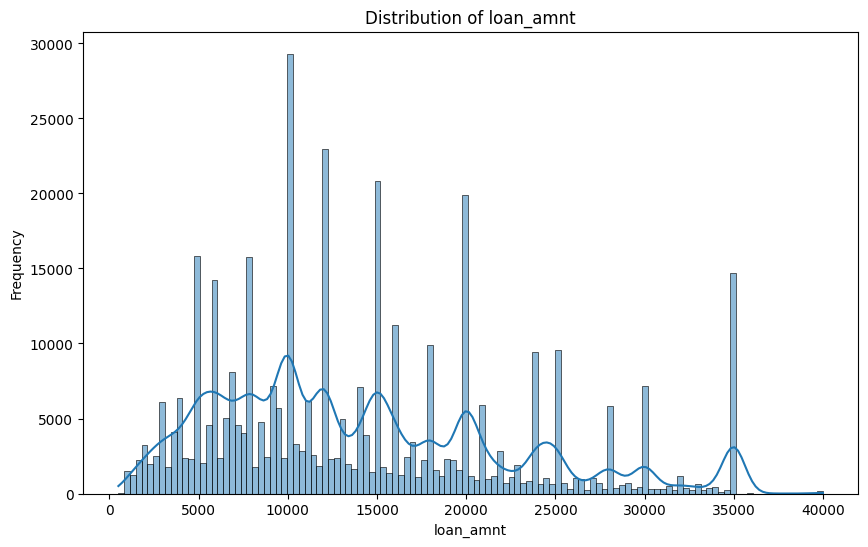

Comments on loan_amnt distribution:
- Skewness: 0.777285467097746
- Range: 500.0 to 40000.0
- Potential outliers (IQR method): 191 (outside -10000.00 to 38000.00)
------------------------------


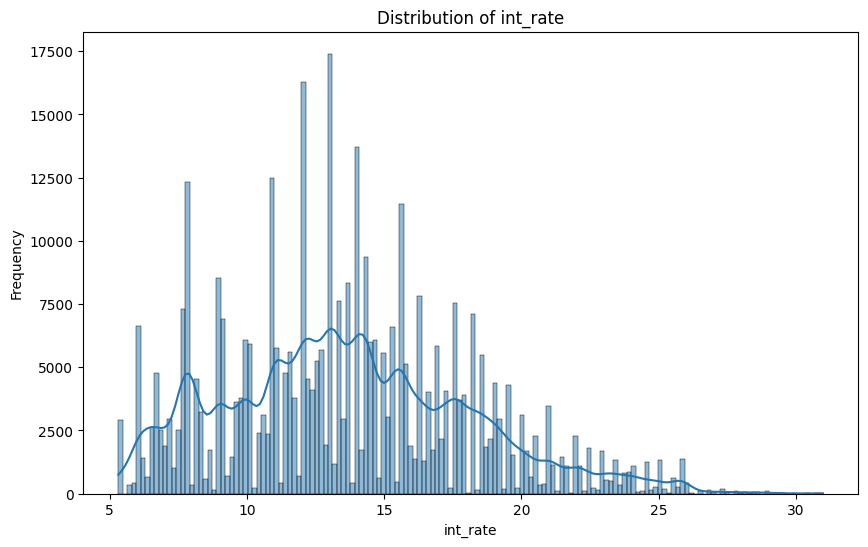

Comments on int_rate distribution:
- Skewness: 0.4206694719582165
- Range: 5.32 to 30.99
- Potential outliers (IQR method): 3777 (outside 1.49 to 25.49)
------------------------------


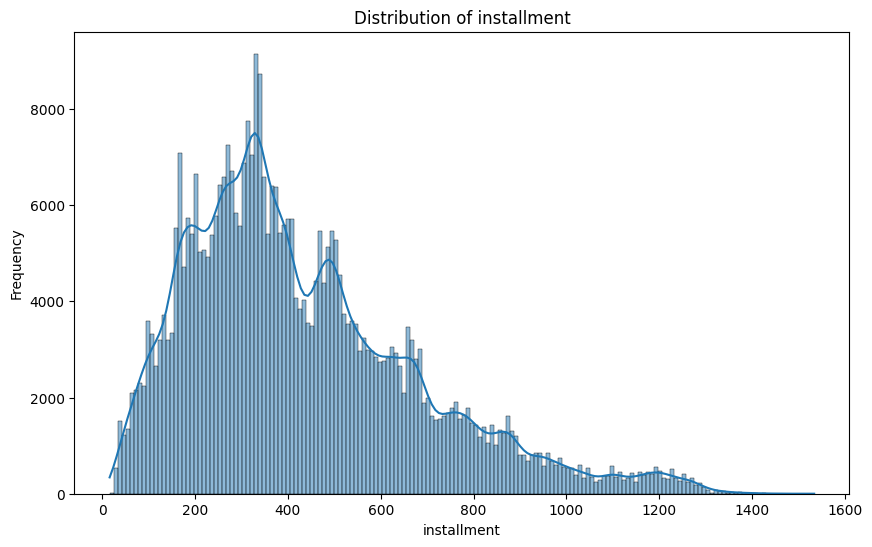

Comments on installment distribution:
- Skewness: 0.983598160890438
- Range: 16.08 to 1533.81
- Potential outliers (IQR method): 11250 (outside -225.12 to 1042.75)
------------------------------


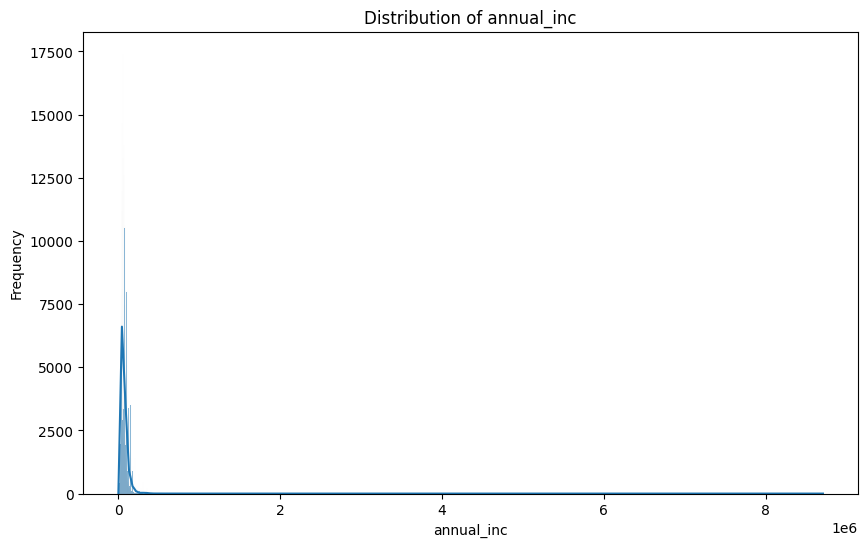

Comments on annual_inc distribution:
- Skewness: 41.042724746560665
- Range: 0.0 to 8706582.0
- Potential outliers (IQR method): 16700 (outside -22500.00 to 157500.00)
------------------------------


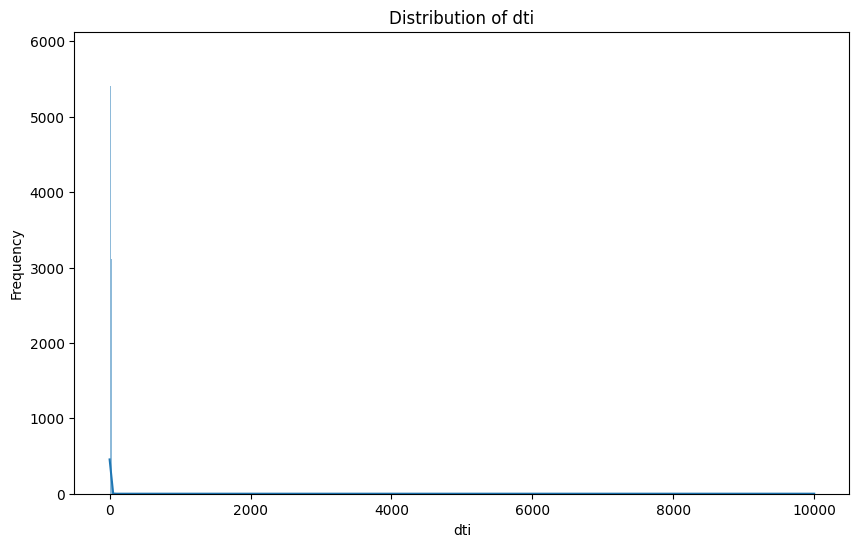

Comments on dti distribution:
- Skewness: 431.05122535490415
- Range: 0.0 to 9999.0
- Potential outliers (IQR method): 275 (outside -6.27 to 40.53)
------------------------------


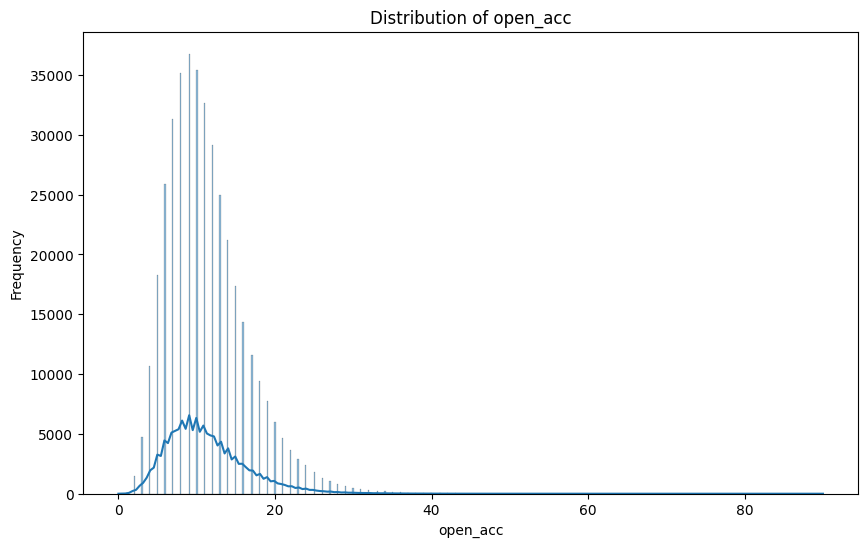

Comments on open_acc distribution:
- Skewness: 1.2130188444585455
- Range: 0.0 to 90.0
- Potential outliers (IQR method): 10307 (outside -1.00 to 23.00)
------------------------------


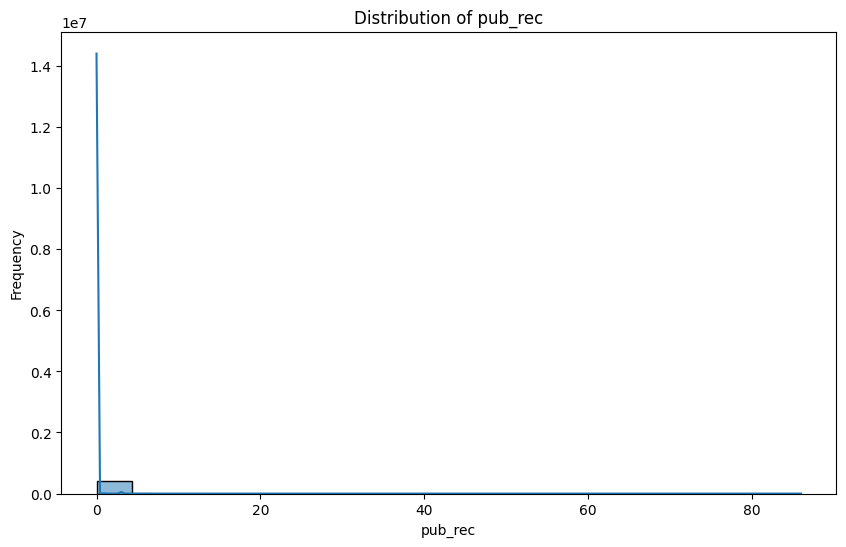

Comments on pub_rec distribution:
- Skewness: 16.576564199464457
- Range: 0.0 to 86.0
- Potential outliers (IQR method): 57758 (outside 0.00 to 0.00)
------------------------------


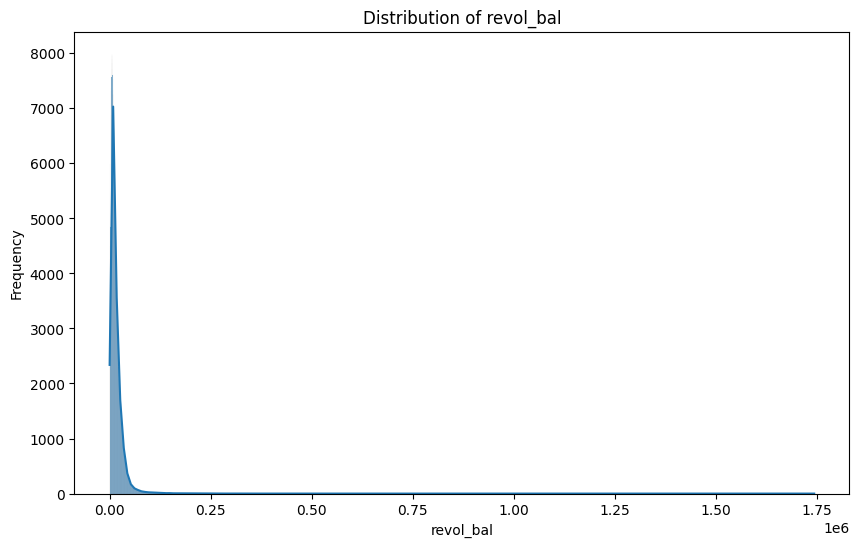

Comments on revol_bal distribution:
- Skewness: 11.727515124126919
- Range: 0.0 to 1743266.0
- Potential outliers (IQR method): 21259 (outside -14367.50 to 40012.50)
------------------------------


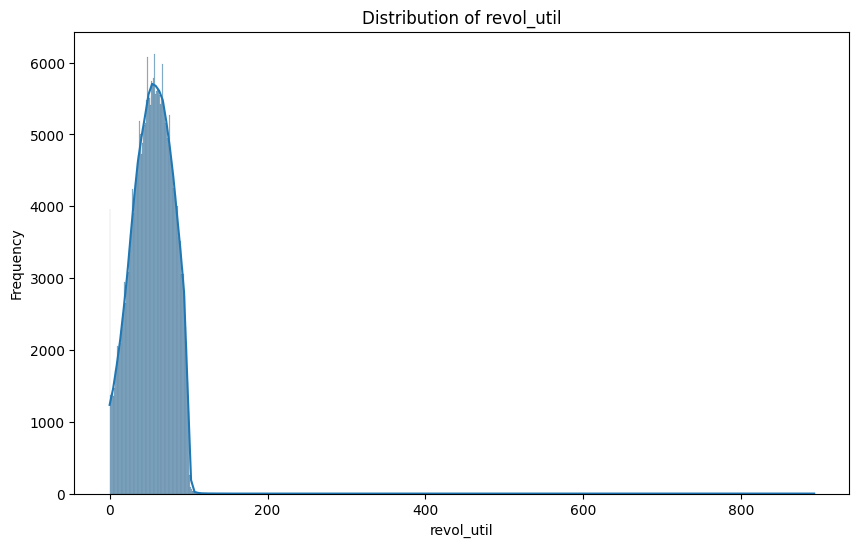

Comments on revol_util distribution:
- Skewness: -0.07177802032853098
- Range: 0.0 to 892.3
- Potential outliers (IQR method): 12 (outside -19.85 to 128.55)
------------------------------


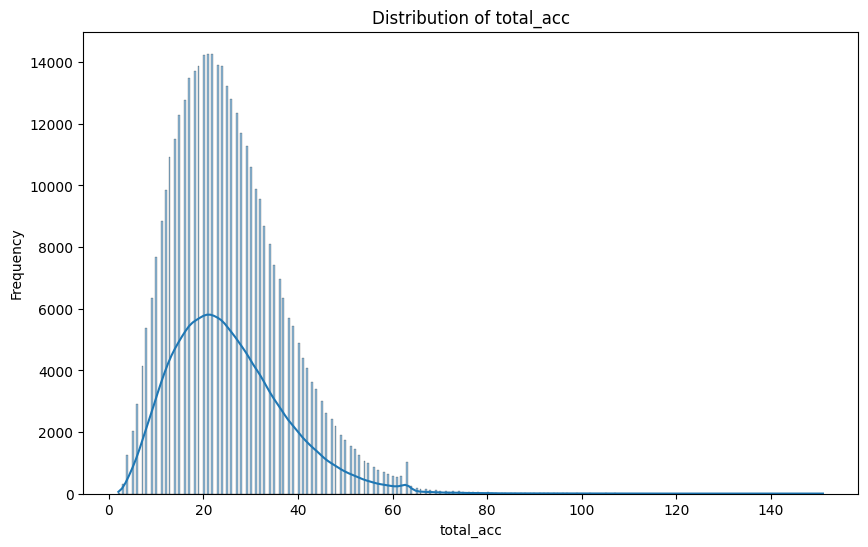

Comments on total_acc distribution:
- Skewness: 0.8643276369429
- Range: 2.0 to 151.0
- Potential outliers (IQR method): 8499 (outside -5.50 to 54.50)
------------------------------


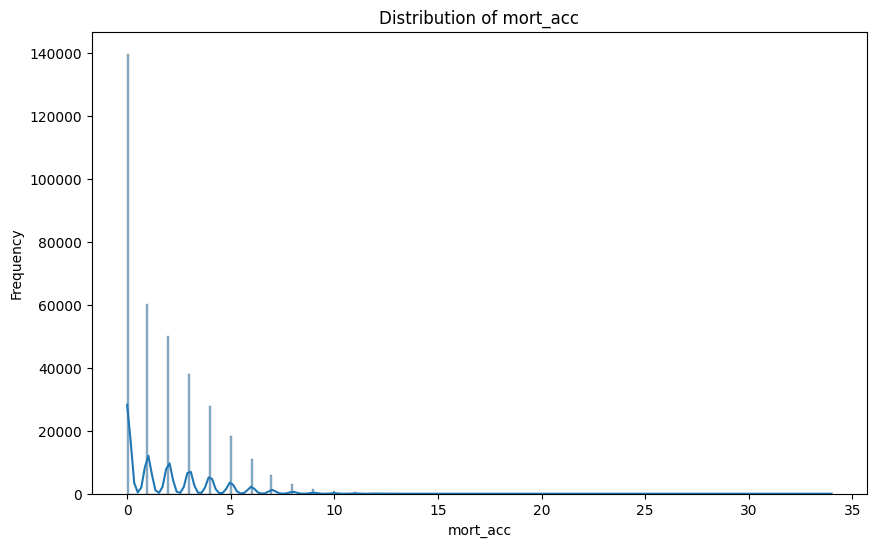

Comments on mort_acc distribution:
- Skewness: 1.6001324380874855
- Range: 0.0 to 34.0
- Potential outliers (IQR method): 6843 (outside -4.50 to 7.50)
------------------------------


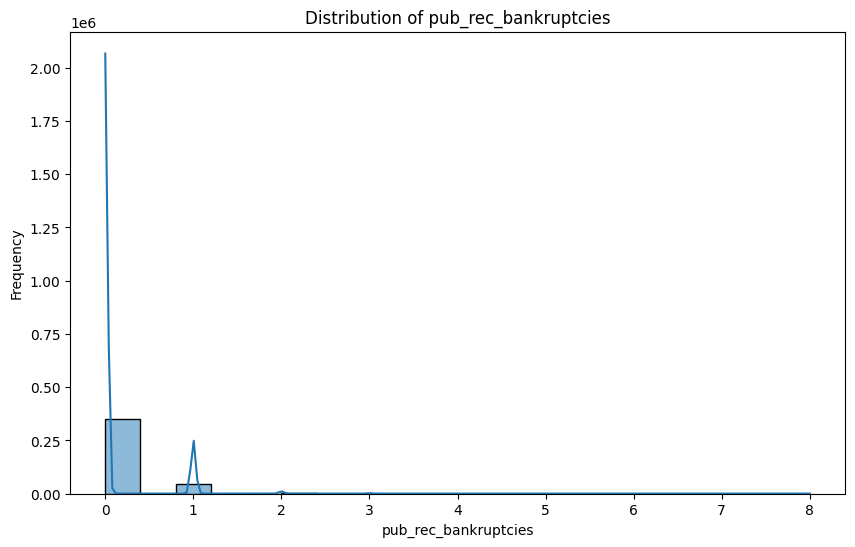

Comments on pub_rec_bankruptcies distribution:
- Skewness: 3.4234403681961583
- Range: 0.0 to 8.0
- Potential outliers (IQR method): 45115 (outside 0.00 to 0.00)
------------------------------

Univariate Analysis of Categorical Variables:


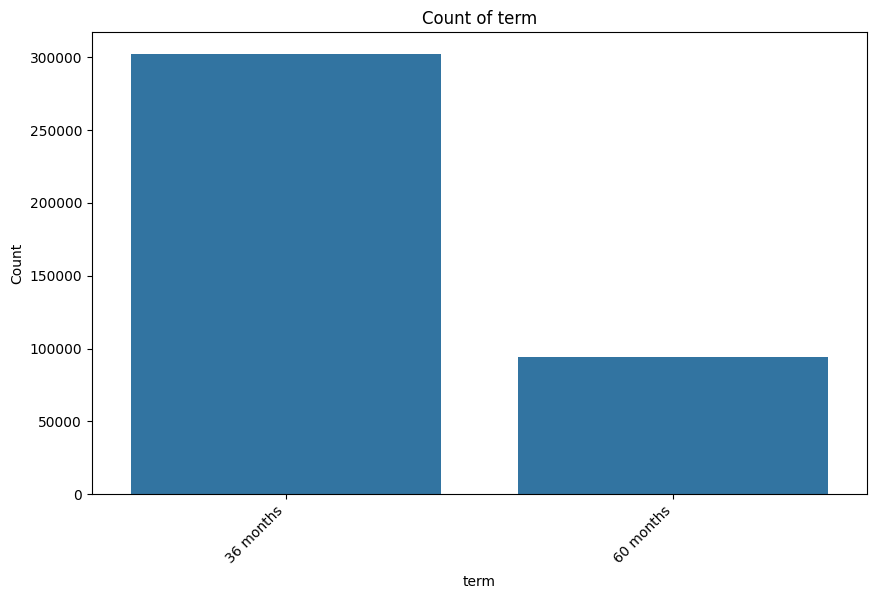

Comments on term distribution:
- Value counts:
term
36 months    302005
60 months     94025
Name: count, dtype: int64
------------------------------


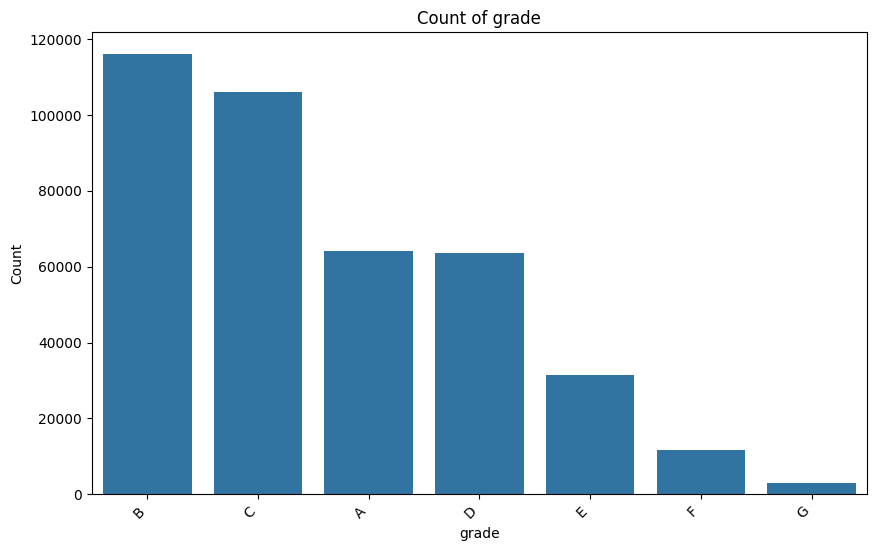

Comments on grade distribution:
- Value counts:
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
------------------------------


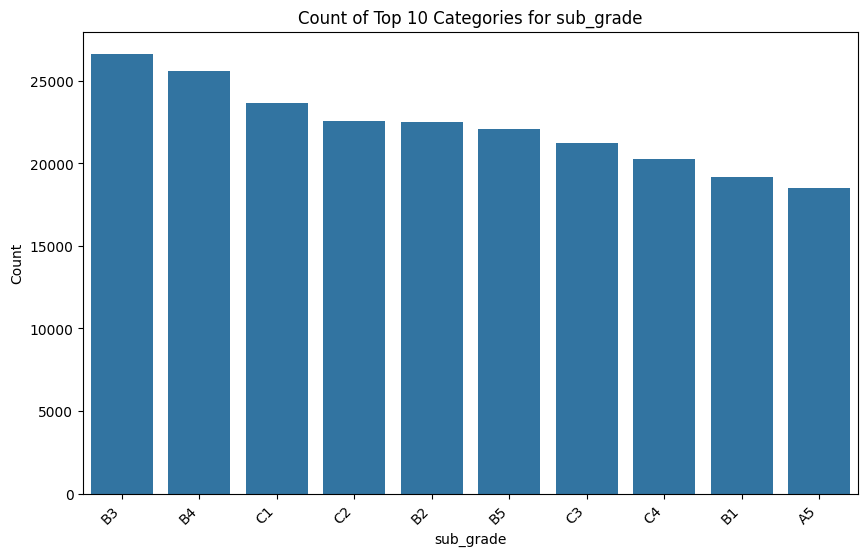

Comments on sub_grade distribution:
- Value counts:
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
------------------------------


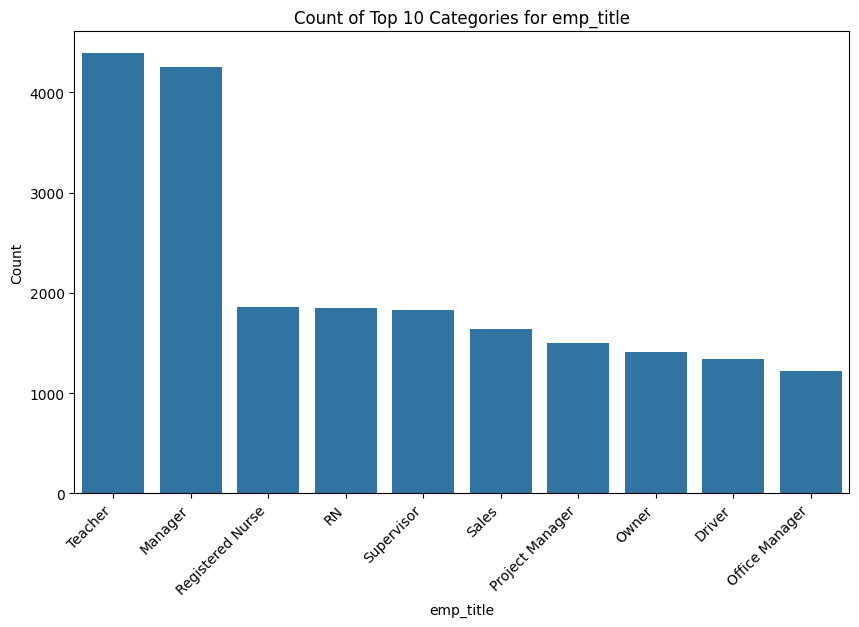

Comments on emp_title distribution:
- Value counts:
emp_title
Teacher                   4389
Manager                   4250
Registered Nurse          1856
RN                        1846
Supervisor                1830
                          ... 
Hy-Vee Food Store            1
HyPro, Inc.                  1
HyTrust Inc.                 1
Hyannis Fire District        1
Hvac mechanic                1
Name: count, Length: 173105, dtype: int64
------------------------------


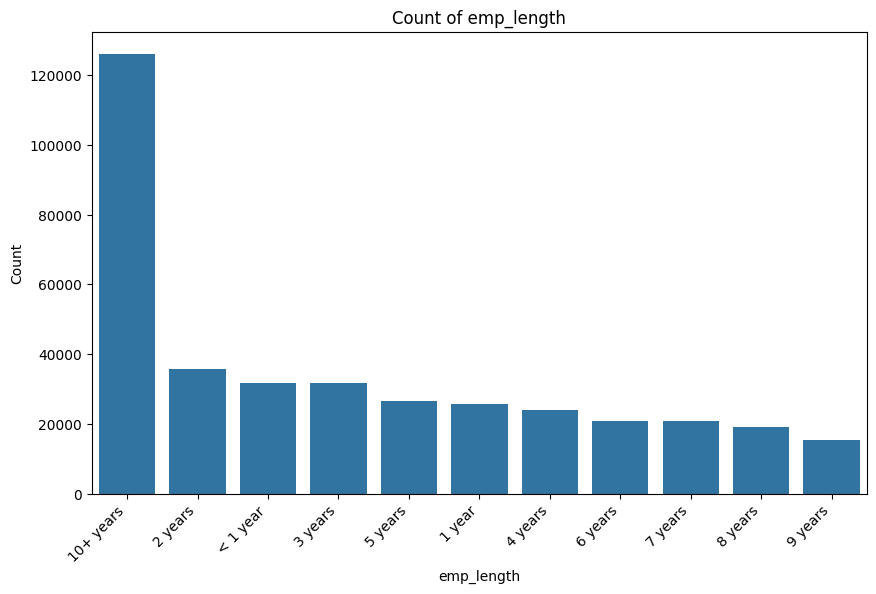

Comments on emp_length distribution:
- Value counts:
emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64
------------------------------


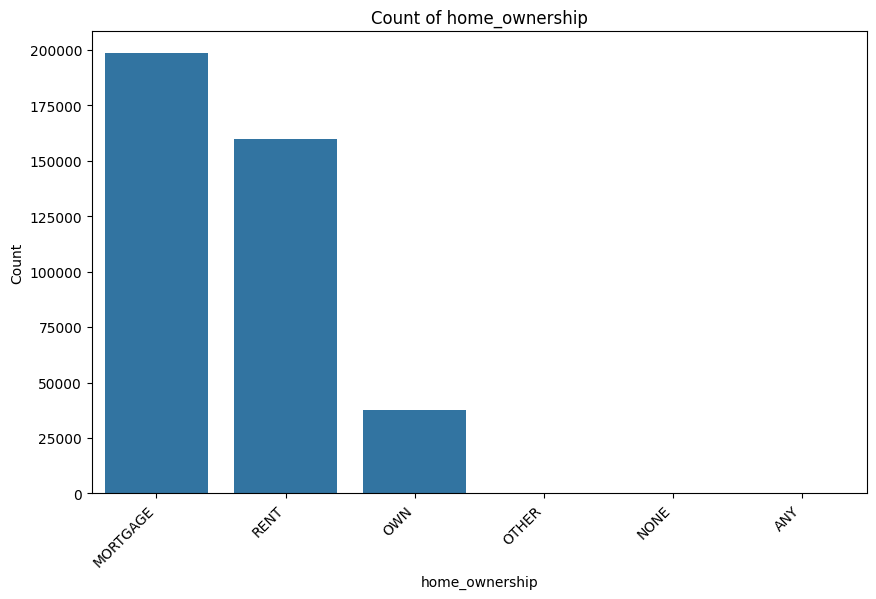

Comments on home_ownership distribution:
- Value counts:
home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64
------------------------------


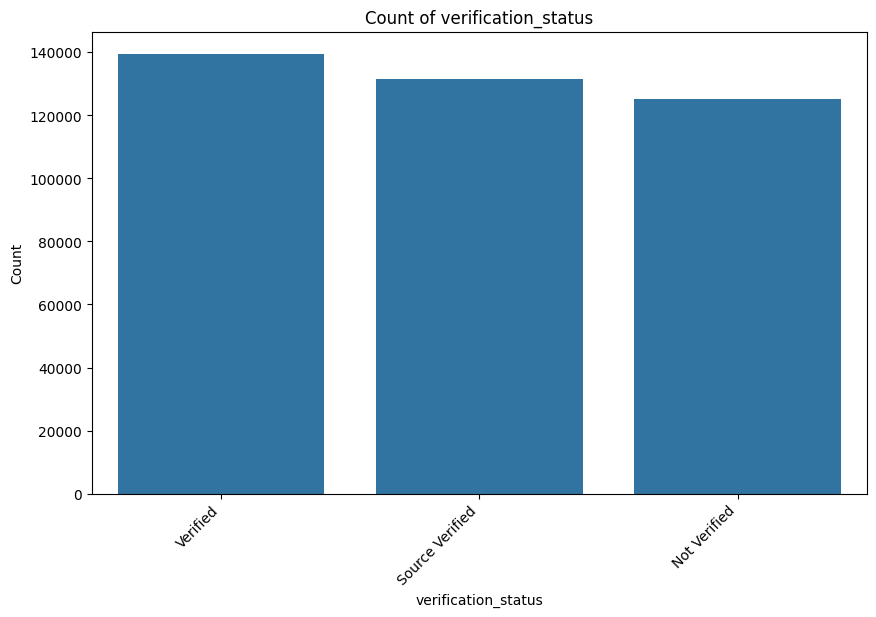

Comments on verification_status distribution:
- Value counts:
verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64
------------------------------


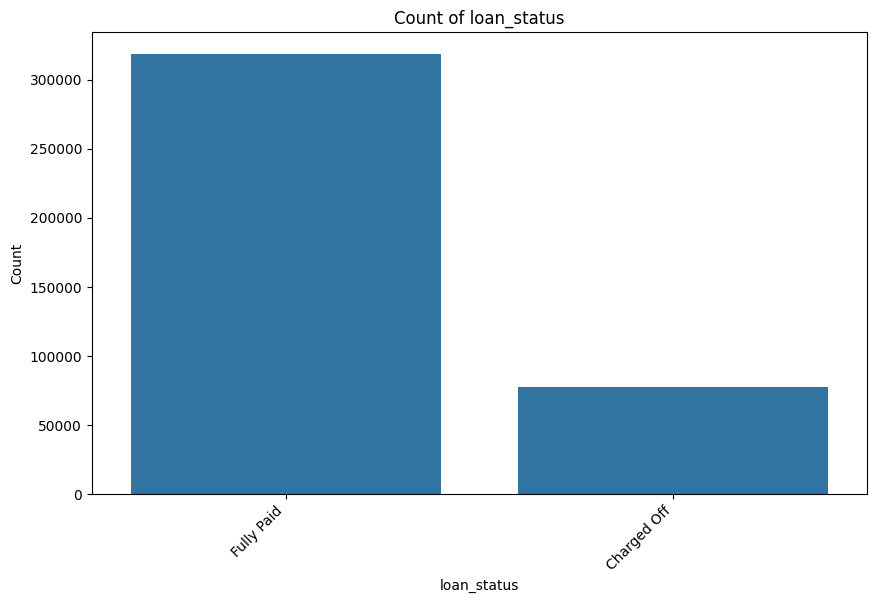

Comments on loan_status distribution:
- Value counts:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64
------------------------------


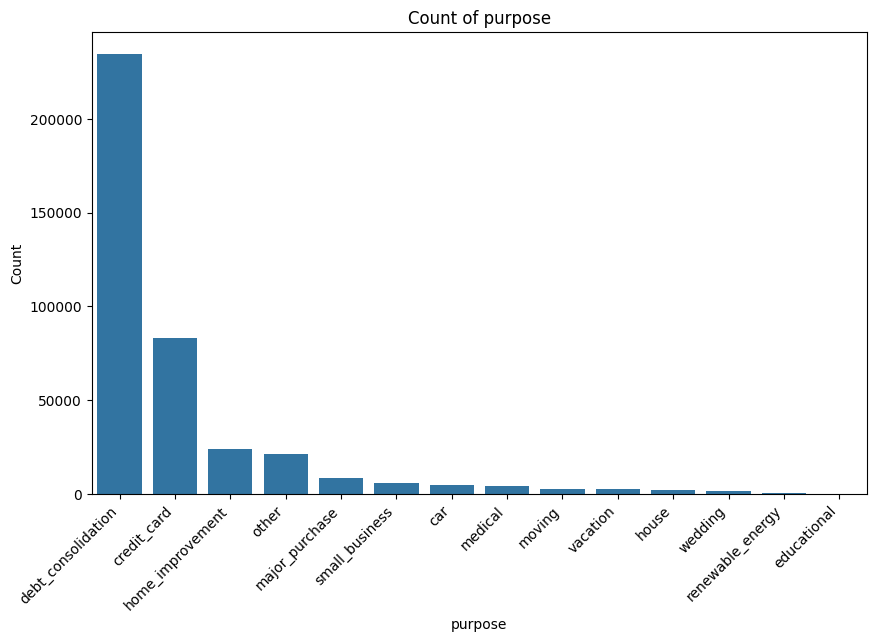

Comments on purpose distribution:
- Value counts:
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64
------------------------------


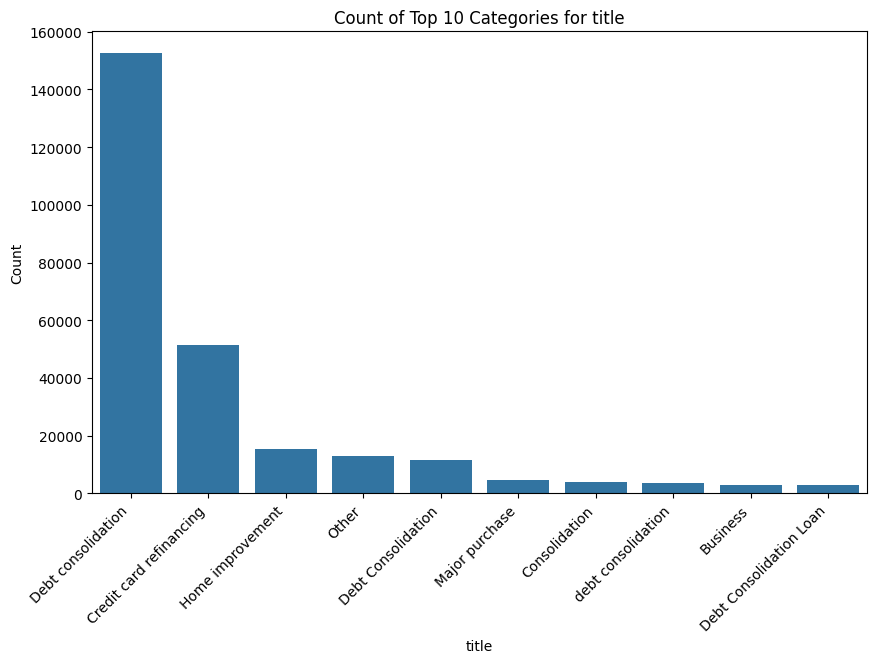

Comments on title distribution:
- Value counts:
title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
                            ...  
Goal to be debt free!!          1
Goal!                           1
Goal- Debt Free                 1
Goal- Financially Free          1
Goal Is To Be Debt-Free         1
Name: count, Length: 48816, dtype: int64
------------------------------


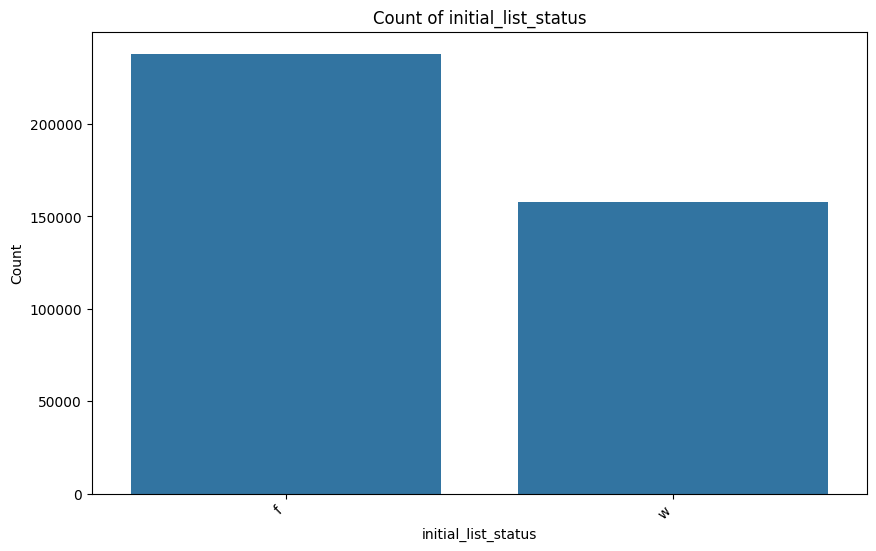

Comments on initial_list_status distribution:
- Value counts:
initial_list_status
f    238066
w    157964
Name: count, dtype: int64
------------------------------


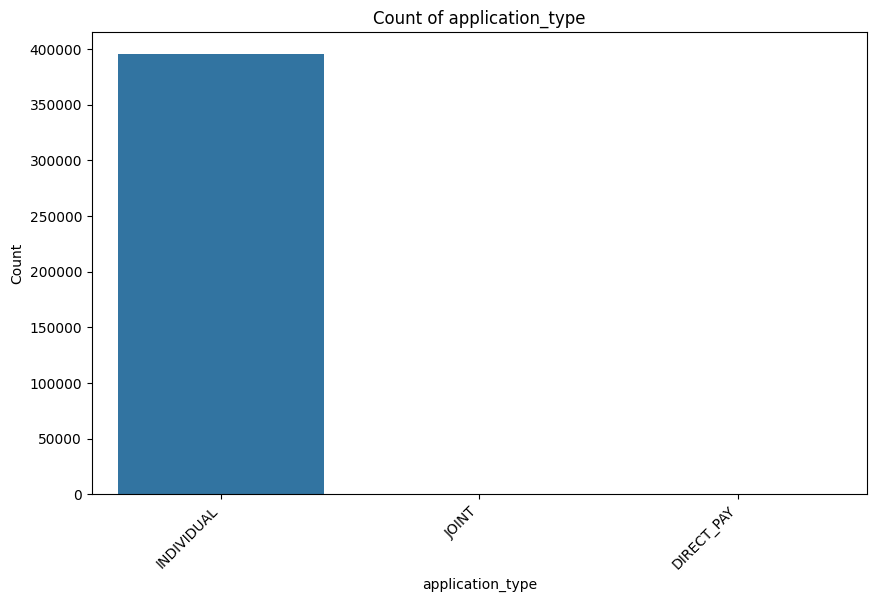

Comments on application_type distribution:
- Value counts:
application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64
------------------------------


) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


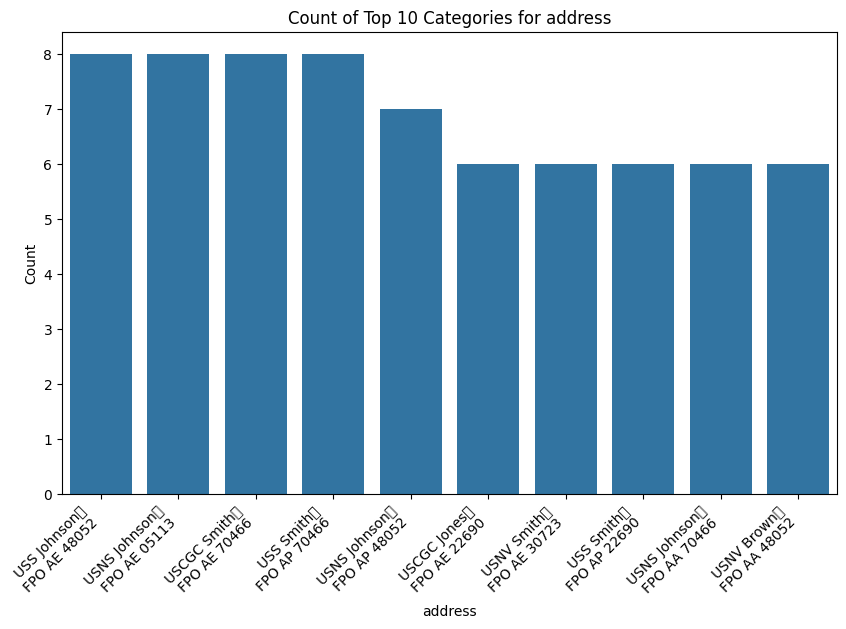

Comments on address distribution:
- Value counts:
address
USS Johnson\r\nFPO AE 48052                               8
USNS Johnson\r\nFPO AE 05113                              8
USCGC Smith\r\nFPO AE 70466                               8
USS Smith\r\nFPO AP 70466                                 8
USNS Johnson\r\nFPO AP 48052                              7
                                                         ..
372 Bailey Crossing Suite 126\r\nWrightburgh, WA 70466    1
372 Bailey Corner\r\nWest William, NM 22690               1
372 Anthony Ports Suite 713\r\nTerrellburgh, IA 29597     1
372 Anna Stravenue Suite 539\r\nNorth Johnny, MN 29597    1
372 Christine Knoll Suite 207\r\nHoodton, IL 22690        1
Name: count, Length: 393700, dtype: int64
------------------------------


In [6]:
# Univariate Analysis of Continuous Variables
print("Univariate Analysis of Continuous Variables:")
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Comments on {col} distribution:")
    print(f"- Skewness: {df[col].skew()}")
    print(f"- Range: {df[col].min()} to {df[col].max()}")
    # Simple outlier detection using IQR (for visualization comments)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"- Potential outliers (IQR method): {outliers} (outside {lower_bound:.2f} to {upper_bound:.2f})")
    print("-" * 30)


# Univariate Analysis of Categorical Variables
print("\nUnivariate Analysis of Categorical Variables:")
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Use a try-except block to catch potential errors during plotting due to data issues
    try:
        if df[col].nunique() <= 20:
            sns.countplot(data=df, x=col, order=df[col].value_counts().index)
            plt.title(f'Count of {col}')
        else:
            # Plot top 10 categories if unique count is > 20
            top_10_categories = df[col].value_counts().nlargest(10).index
            sns.countplot(data=df[df[col].isin(top_10_categories)], x=col, order=top_10_categories)
            plt.title(f'Count of Top 10 Categories for {col}')

        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.show()
        print(f"Comments on {col} distribution:")
        print(f"- Value counts:\n{df[col].value_counts()}")
    except Exception as e:
        print(f"Could not generate plot for {col} due to error: {e}")
        print(f"Value counts for {col}:\n{df[col].value_counts()}") # Still display value counts

    print("-" * 30)

### Bivariate Analysis

Bivariate analysis explores the relationships between pairs of variables. We will focus on relationships with the target variable (assuming the target variable is 'loan_status' or similar, based on the problem statement context of loan eligibility and repayment). Since the dataset description is not explicitly provided in terms of column names, I will assume 'loan_status' is the target variable and will use it in the following analysis. **Please correct 'loan_status' if the actual target column name is different.**

Let's assume 'loan_status' is the target variable, where 1 indicates likely to repay and 0 indicates unlikely to repay (or vice versa).

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'loan_status' is the target variable. Replace if necessary.
target_variable = 'loan_status'

# Identify numeric versus categorical attributes (re-defining for standalone execution)
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='category').columns


if target_variable in df.columns:
    print(f"Bivariate Analysis with respect to the target variable: {target_variable}")

    # Relationship between categorical variables and the target variable
    categorical_cols_for_bivariate = [col for col in categorical_cols if col != target_variable]
    for col in categorical_cols_for_bivariate:
        plt.figure(figsize=(12, 7))
        # Use a try-except block to catch potential errors during plotting due to data issues
        try:
            if df[col].nunique() <= 20:
                sns.countplot(data=df, x=col, hue=target_variable, order=df[col].value_counts().index)
                plt.title(f'Relationship between {col} and {target_variable}')
            else:
                # Plot top 10 categories if unique count is > 20
                top_10_categories = df[col].value_counts().nlargest(10).index
                sns.countplot(data=df[df[col].isin(top_10_categories)], x=col, hue=target_variable, order=top_10_categories)
                plt.title(f'Relationship between Top 10 Categories of {col} and {target_variable}')

            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45, ha='right')
            plt.legend(title=target_variable)
            plt.show()
            print(f"Comments on the relationship between {col} and {target_variable}:")
            # Using crosstab for a clearer view of proportions
            ct = pd.crosstab(df[col], df[target_variable])
            display(ct)
        except Exception as e:
            print(f"Could not generate plot for {col} vs {target_variable} due to error: {e}")
            ct = pd.crosstab(df[col], df[target_variable])
            print(f"Crosstab for {col} vs {target_variable}:\n")
            display(ct)

        print("-" * 30)


    # Relationship between numerical variables and the target variable (using boxplots)
    numerical_cols_for_bivariate = [col for col in numeric_cols if col != target_variable]
    if df[target_variable].dtype.name == 'category' or df[target_variable].nunique() <= 10: # Check if target is categorical-like
        for col in numerical_cols_for_bivariate:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=target_variable, y=col)
            plt.title(f'Relationship between {col} and {target_variable}')
            plt.xlabel(target_variable)
            plt.ylabel(col)
            plt.show()
            print(f"Comments on the relationship between {col} and {target_variable}:")
            display(df.groupby(target_variable)[col].describe())
            print("-" * 30)
    else:
        print(f"Target variable '{target_variable}' is not suitable for boxplots with numerical features as it does not appear categorical.")


    # Relationships between important variable (Pairs of numerical variables - using scatter plots)
    # This can be done for a few key numerical variables, not all, for clarity.
    # We can select pairs that might have interesting relationships based on problem context or initial univariate analysis.
    print("\nBivariate Analysis: Relationships between pairs of numerical variables (Sample)")
    # Example: Pick a few relevant numerical columns for scatter plots
    numerical_pairs_to_plot = [
        ('loan_amnt', 'int_rate'),
        ('loan_amnt', 'installment'),
        ('annual_inc', 'dti'),
        ('open_acc', 'total_acc'),
        ('revol_bal', 'revol_util')
    ]

    for col1, col2 in numerical_pairs_to_plot:
        if col1 in df.columns and col2 in df.columns:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df, x=col1, y=col2, hue=target_variable if target_variable in df.columns else None, alpha=0.6)
            plt.title(f'Relationship between {col1} and {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            if target_variable in df.columns:
                 plt.legend(title=target_variable)
            plt.show()
            print(f"Comments on the relationship between {col1} and {col2}:")
            if target_variable in df.columns:
                 print(f"Color coding by {target_variable} shows potential separation or overlap based on these two features.")
            print("-" * 30)
        else:
            print(f"Skipping scatter plot for {col1} and {col2} as one or both columns not found.")


elif df.empty:
    print("Dataset is empty. Cannot perform bivariate analysis.")
else:
    print(f"Target variable '{target_variable}' not found in the dataset. Please update the 'target_variable' in the code.")

Output hidden; open in https://colab.research.google.com to view.

### Illustrate the insights based on EDA

Based on the univariate and bivariate analysis performed:

**Observations on Data:**
- The dataset contains 396030 rows and 27 columns.
- We have identified both numerical and categorical columns. The data types were appropriately handled, including converting object types to 'category'.
- Several columns have missing values, notably `emp_title`, `emp_length`, `title`, `revol_util`, `mort_acc`, and `pub_rec_bankruptcies`. These will need to be addressed in the data preprocessing stage.

**Univariate Analysis Insights:**
- **Continuous Variables:**
  - Distributions vary across numerical features. Some, like `loan_amnt` and `installment`, show a tendency towards normal distribution but with some skewness.
  - Features like `annual_inc`, `dti`, `pub_rec`, `revol_bal`, and `mort_acc` show significant skewness and potential outliers, which could impact model performance and require attention during preprocessing. The range of values also varies widely for these features.
  - The outlier detection using the IQR method highlighted a considerable number of potential outliers in several numerical columns, consistent with the observed skewness.
- **Categorical Variables:**
  - The distribution of categories varies across categorical features. Some features, like `term` and `initial_list_status`, are heavily skewed towards one or two categories.
  - Features like `emp_title`, `sub_grade`, `purpose`, `title`, and `address` have a high number of unique values. For visualization, we focused on the top 10 categories for some of these to understand the most frequent occurrences.

**Bivariate Analysis Insights (with respect to `loan_status`):**
- **Categorical Variables vs. `loan_status`:**
  - The count plots show the distribution of 'Fully Paid' and 'Charged Off' loans across different categories. This allows us to observe which categories have a higher proportion of charged-off loans. For example, certain `grade` or `sub_grade` categories might have a higher risk of default.
  - The crosstab tables provide a more detailed view of the counts and proportions for each category and loan status, which is helpful for identifying categories that are strongly associated with loan outcomes.
- **Numerical Variables vs. `loan_status`:**
  - The box plots illustrate the distribution of numerical features for 'Fully Paid' and 'Charged Off' loans. Differences in the median, spread, and presence of outliers between the two loan status groups can indicate the predictive power of a numerical feature. For instance, borrowers with lower `annual_inc` or higher `dti` might be more likely to be charged off.
  - The descriptive statistics for each loan status group provide quantitative measures of these differences, such as the mean and standard deviation of numerical features for each outcome.
- **Pairs of Numerical Variables:**
  - The scatter plots allow us to visually inspect the relationship between two numerical features, potentially colored by the `loan_status`. For example:
    - **`loan_amnt` vs. `int_rate`**: There appears to be a positive correlation between loan amount and interest rate, with higher interest rates generally associated with larger loan amounts. The distribution of 'Charged Off' loans seems to be more spread out across higher interest rates, regardless of loan amount.
    - **`loan_amnt` vs. `installment`**: There is a strong positive linear relationship between loan amount and installment, as expected. The loan status seems to be distributed along this line, suggesting that the installment amount itself might not be a primary differentiator between 'Fully Paid' and 'Charged Off' for a given loan amount.
    - **`annual_inc` vs. `dti`**: The scatter plot shows a wide spread of data points. Most loans are concentrated at lower DTI values, but there are some outliers with very high DTI. While there isn't a clear linear relationship, observing the distribution of 'Charged Off' loans in this plot might highlight potential risk areas related to income and debt-to-income ratio.
    - **`open_acc` vs. `total_acc`**: There is a positive correlation between the number of open credit lines and the total number of credit lines. 'Charged Off' loans appear across the range of both variables, without a distinct pattern emerging from this bivariate view alone.
    - **`revol_bal` vs. `revol_util`**: The plot shows the relationship between revolving balance and revolving line utilization rate. Higher utilization rates, especially with larger revolving balances, could potentially be associated with higher risk, and the distribution of 'Charged Off' loans in this plot can provide insight into this.

Overall, the EDA has provided valuable insights into the data's structure, distributions, missing values, and the relationships between features and the target variable. This information will be crucial for guiding the data preprocessing and feature engineering steps in the next section.

## Analyze time-based features

### Subtask:
Investigate the 'issue_d' and 'earliest_cr_line' columns to see if there are any temporal trends related to loan status. This could involve extracting year and month, and visualizing loan status distribution over time.


**Reasoning**:
Convert 'issue_d' and 'earliest_cr_line' columns to datetime objects and extract year and month.



In [8]:
# Convert 'issue_d' and 'earliest_cr_line' to datetime objects
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

# Extract year and month
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month

# Display the first few rows with new columns
display(df[['issue_d', 'issue_year', 'issue_month', 'earliest_cr_line', 'earliest_cr_year', 'earliest_cr_month']].head())

issue_d  issue_year  issue_month earliest_cr_line  earliest_cr_year  \
0 2015-01-01        2015            1       1990-06-01              1990   
1 2015-01-01        2015            1       2004-07-01              2004   
2 2015-01-01        2015            1       2007-08-01              2007   
3 2014-11-01        2014           11       2006-09-01              2006   
4 2013-04-01        2013            4       1999-03-01              1999   

   earliest_cr_month  
0                  6  
1                  7  
2                  8  
3                  9  
4                  3

**Reasoning**:
Visualize the distribution of 'loan_status' over 'issue_year' and 'issue_month' to identify temporal trends.



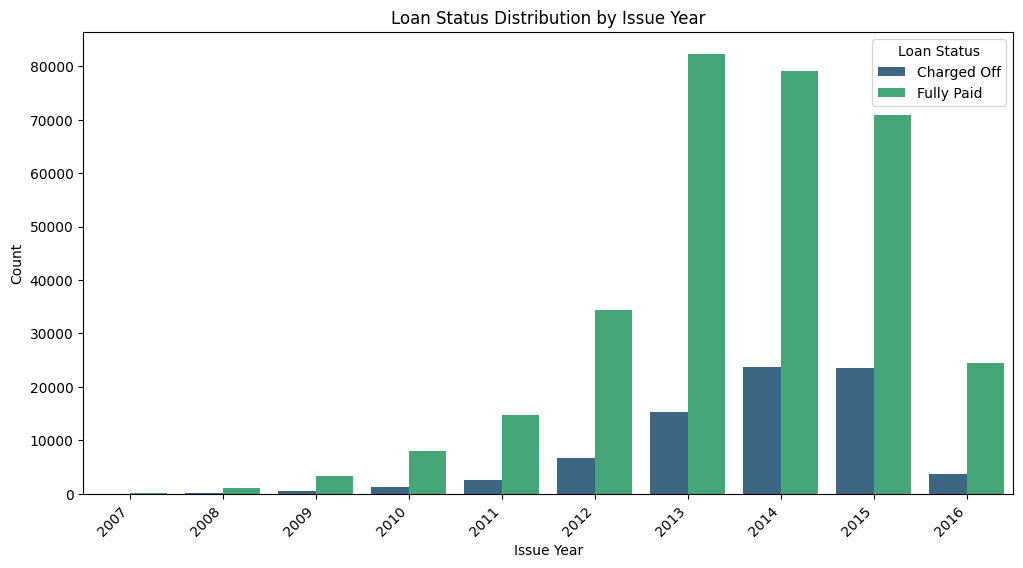

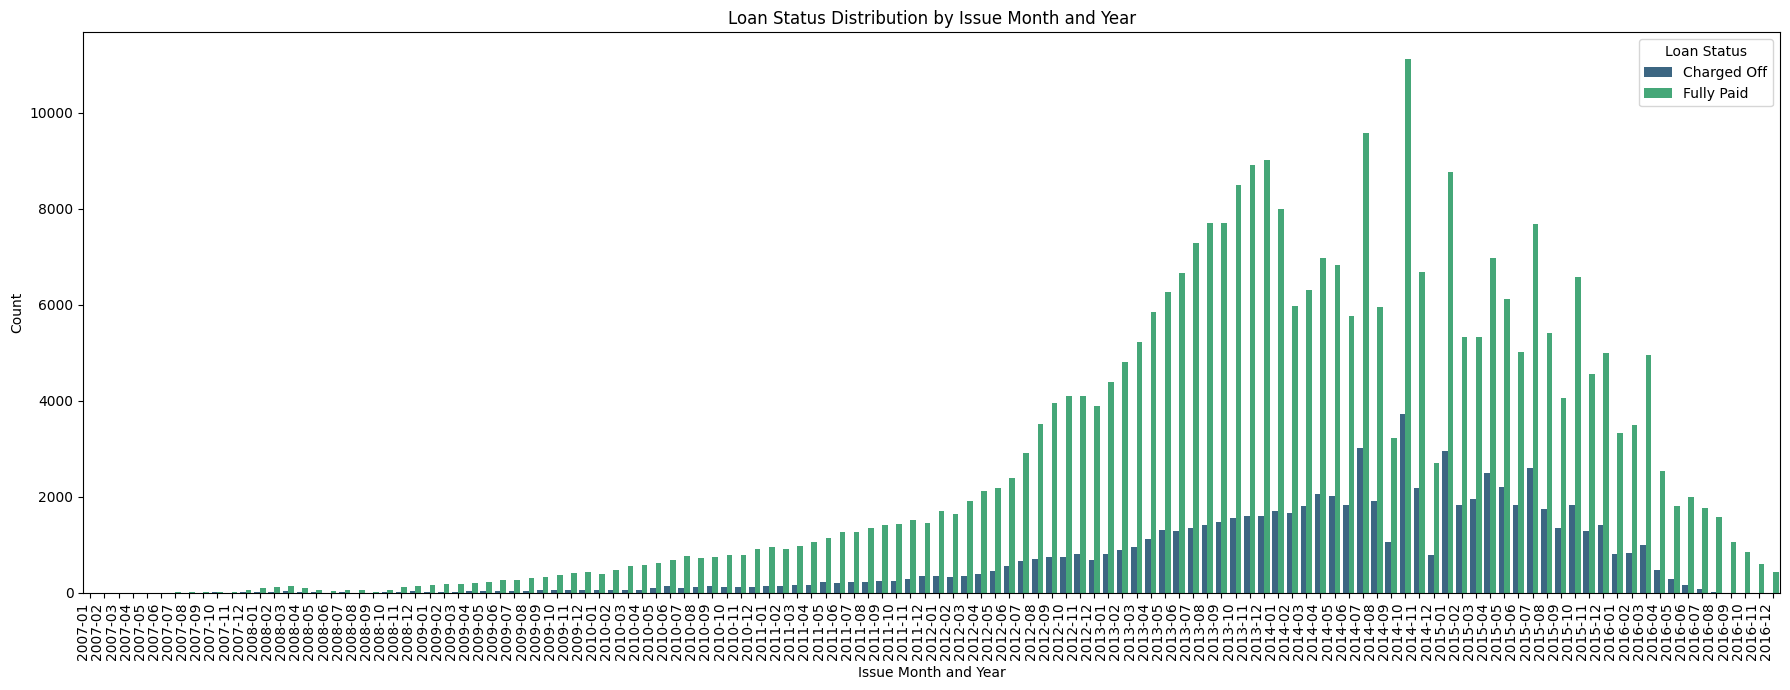

In [9]:
# Visualize loan status distribution over 'issue_year'
plt.figure(figsize=(12, 6))
sns.countplot(data=df.sort_values('issue_year'), x='issue_year', hue='loan_status', palette='viridis')
plt.title('Loan Status Distribution by Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

# Visualize loan status distribution over 'issue_month'
# Group by year and month and sort to ensure chronological order
issue_ym = df.groupby(['issue_year', 'issue_month', 'loan_status']).size().unstack(fill_value=0).stack().reset_index(name='count')
issue_ym['issue_ym_str'] = issue_ym['issue_year'].astype(str) + '-' + issue_ym['issue_month'].astype(str).str.zfill(2)

plt.figure(figsize=(18, 7))
sns.barplot(data=issue_ym, x='issue_ym_str', y='count', hue='loan_status', palette='viridis')
plt.title('Loan Status Distribution by Issue Month and Year')
plt.xlabel('Issue Month and Year')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the distribution of 'loan_status' over 'earliest_cr_year' to identify temporal trends related to credit history length.



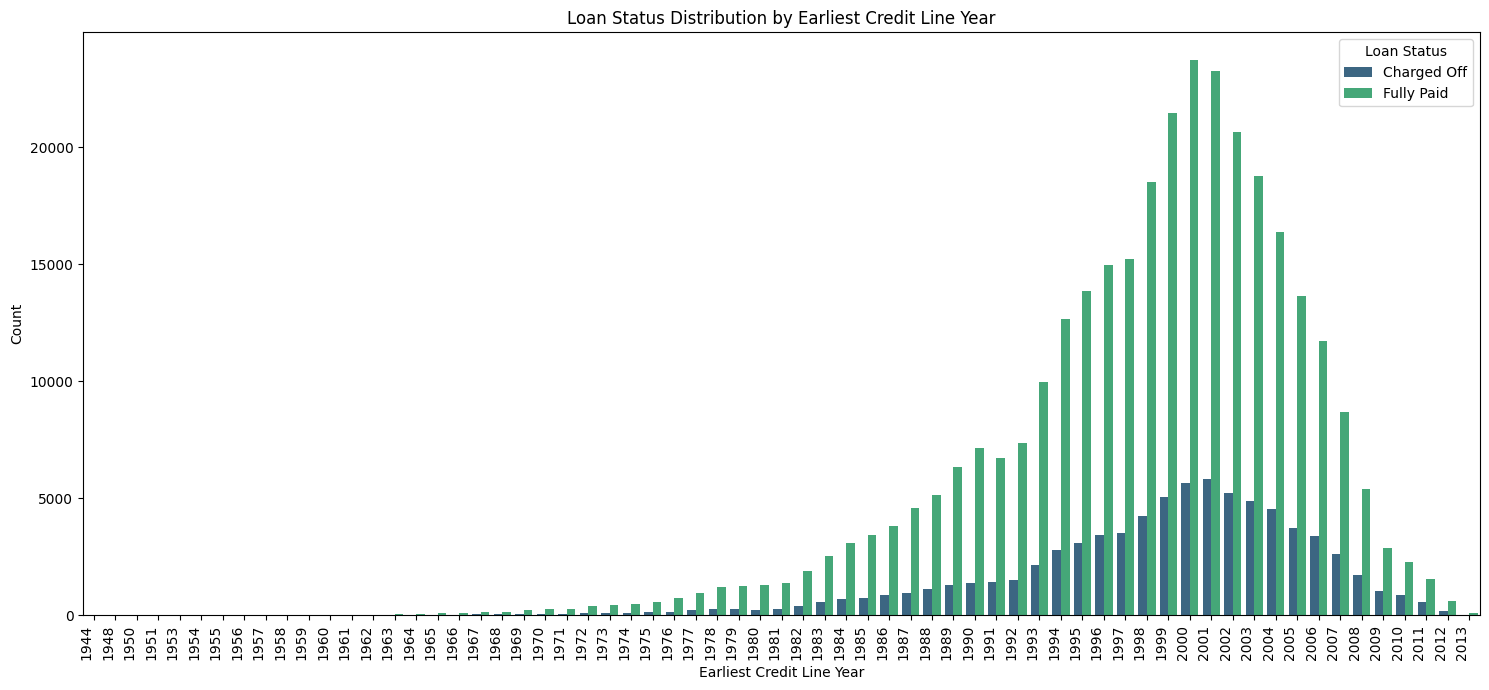

In [10]:
# Visualize loan status distribution over 'earliest_cr_year'
plt.figure(figsize=(15, 7))
# Order by earliest_cr_year for chronological order
sns.countplot(data=df.sort_values('earliest_cr_year'), x='earliest_cr_year', hue='loan_status', palette='viridis')
plt.title('Loan Status Distribution by Earliest Credit Line Year')
plt.xlabel('Earliest Credit Line Year')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

## Explore geographic information

### Subtask:
If the 'address' column contains usable geographic information (like zip codes or states), analyze if loan status varies by location. This might require extracting relevant parts of the address.


**Reasoning**:
Extract the state abbreviation from the 'address' column and create a new 'state' column. Handle potential errors during extraction.



In [11]:
import re

def extract_state(address):
    if isinstance(address, str):
        # The state abbreviation is assumed to be the two-letter code
        # following the last space before the newline character '\r\n' or the end of the string
        match = re.search(r'\s([A-Z]{2})\r?\n?$', address)
        if match:
            return match.group(1)
    return 'Unknown' # Assign 'Unknown' for missing values or extraction errors

df['state'] = df['address'].apply(extract_state)

# Display the first few rows with the new 'state' column
display(df[['address', 'state']].head())

# Check the value counts for the new 'state' column
print("\nValue counts for the extracted state:")
display(df['state'].value_counts().head(20)) # Display top 20 states

address    state
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  Unknown
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  Unknown
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  Unknown
3            823 Reid Ford\r\nDelacruzside, MA 00813  Unknown
4             679 Luna Roads\r\nGreggshire, VA 11650  Unknown


Value counts for the extracted state:


state
Unknown    396030
Name: count, dtype: int64

**Reasoning**:
The previous extraction method failed to capture any states. I will try a different regex pattern to extract the state abbreviation, assuming it's a two-letter code followed by a space and a zip code, often at the end of the address line before the newline. Then I will proceed with visualizing the relationship between the extracted states and loan status for the top states.



address state
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690    OK
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113    SD
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113    WV
3            823 Reid Ford\r\nDelacruzside, MA 00813    MA
4             679 Luna Roads\r\nGreggshire, VA 11650    VA


Value counts for the extracted state:


state
AP    14308
AE    14157
AA    13919
NJ     7091
WI     7081
LA     7068
NV     7038
AK     7034
MA     7022
VA     7022
VT     7005
NY     7004
MS     7003
TX     7000
SC     6973
ME     6972
AR     6969
OH     6969
GA     6967
IN     6958
Name: count, dtype: int64

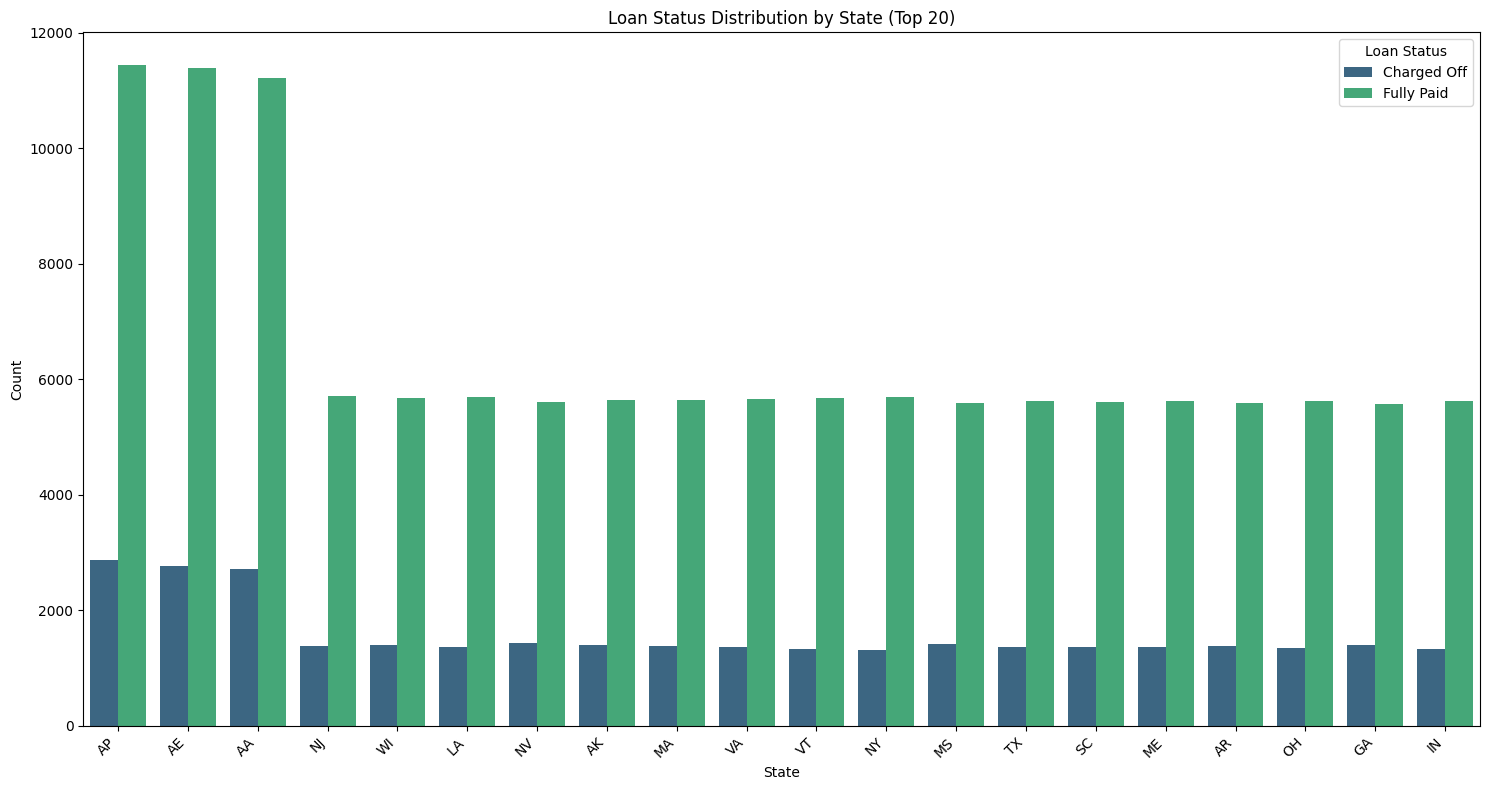


Crosstab of State vs. Loan Status for Top 20 States:


loan_status  Charged Off  Fully Paid
state                               
AA                  2711       11208
AE                  2763       11394
AK                  1390        5644
AP                  2873       11435
AR                  1381        5588
GA                  1390        5577
IN                  1330        5628
LA                  1369        5699
MA                  1377        5645
ME                  1355        5617
MS                  1414        5589
NJ                  1377        5714
NV                  1425        5613
NY                  1306        5698
OH                  1346        5623
SC                  1370        5603
TX                  1370        5630
VA                  1370        5652
VT                  1335        5670
WI                  1402        5679

In [12]:
def extract_state_v2(address):
    if isinstance(address, str):
        # Try to find two capital letters followed by a space and 5 digits (zip code)
        match = re.search(r'\s([A-Z]{2})\s\d{5}\r?\n?$', address)
        if match:
            return match.group(1)
        # If the above fails, try to find two capital letters at the very end of the string
        match = re.search(r'\s([A-Z]{2})\r?\n?$', address)
        if match:
             return match.group(1)
    return 'Unknown'

df['state'] = df['address'].apply(extract_state_v2)

# Display the first few rows with the new 'state' column
display(df[['address', 'state']].head())

# Check the value counts for the new 'state' column
print("\nValue counts for the extracted state:")
state_counts = df['state'].value_counts()
display(state_counts.head(20)) # Display top 20 states

# Filter out 'Unknown' states for plotting
df_filtered_state = df[df['state'] != 'Unknown'].copy()

# Select the top N states for plotting
top_n_states = 20
top_states = state_counts[state_counts.index != 'Unknown'].nlargest(top_n_states).index

if not top_states.empty:
    # Filter the dataframe to include only the top states
    df_top_states = df_filtered_state[df_filtered_state['state'].isin(top_states)]

    # Visualize the relationship between state and loan_status for top states
    plt.figure(figsize=(15, 8))
    sns.countplot(data=df_top_states, x='state', hue='loan_status', order=top_states, palette='viridis')
    plt.title(f'Loan Status Distribution by State (Top {top_n_states})')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loan Status')
    plt.tight_layout()
    plt.show()

    # Print the crosstab of state vs. loan status for top states
    print(f"\nCrosstab of State vs. Loan Status for Top {top_n_states} States:")
    crosstab_state_loan = pd.crosstab(df_top_states['state'], df_top_states['loan_status'])
    display(crosstab_state_loan)
else:
    print("\nNo states were successfully extracted.")


## Analyze `emp title` and `emp length` in more detail

### Subtask:
While `emp_title` has high cardinality, analyze the relationship between loan status and `emp_length`, and potentially group or analyze `emp_title` for common patterns related to loan outcomes.


**Reasoning**:
Create count plots and print value counts and proportions for `emp_length` and `emp_title` to analyze their relationship with `loan_status`, following the remaining instructions of the subtask.



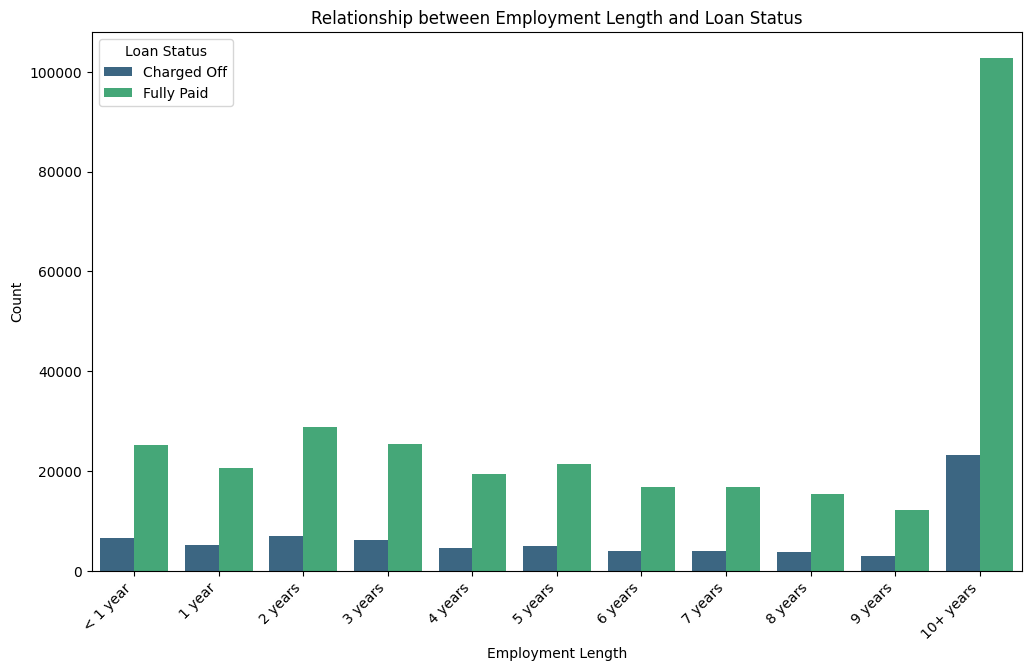

Value counts for emp_length and loan_status:


loan_status  Charged Off  Fully Paid
emp_length                          
1 year              5154       20728
10+ years          23215      102826
2 years             6924       28903
3 years             6182       25483
4 years             4608       19344
5 years             5092       21403
6 years             3943       16898
7 years             4055       16764
8 years             3829       15339
9 years             3070       12244
< 1 year            6563       25162


Proportion of 'Charged Off' loans for each emp_length category:


loan_status  Charged Off   Total  Charged Off Proportion
emp_length                                              
< 1 year            6563   31725                0.206872
9 years             3070   15314                0.200470
8 years             3829   19168                0.199760
1 year              5154   25882                0.199135
3 years             6182   31665                0.195231
7 years             4055   20819                0.194774
2 years             6924   35827                0.193262
4 years             4608   23952                0.192385
5 years             5092   26495                0.192187
6 years             3943   20841                0.189194
10+ years          23215  126041                0.184186


Top 10 most frequent job titles:
['Teacher', 'Manager', 'Registered Nurse', 'RN', 'Supervisor', 'Sales', 'Project Manager', 'Owner', 'Driver', 'Office Manager']


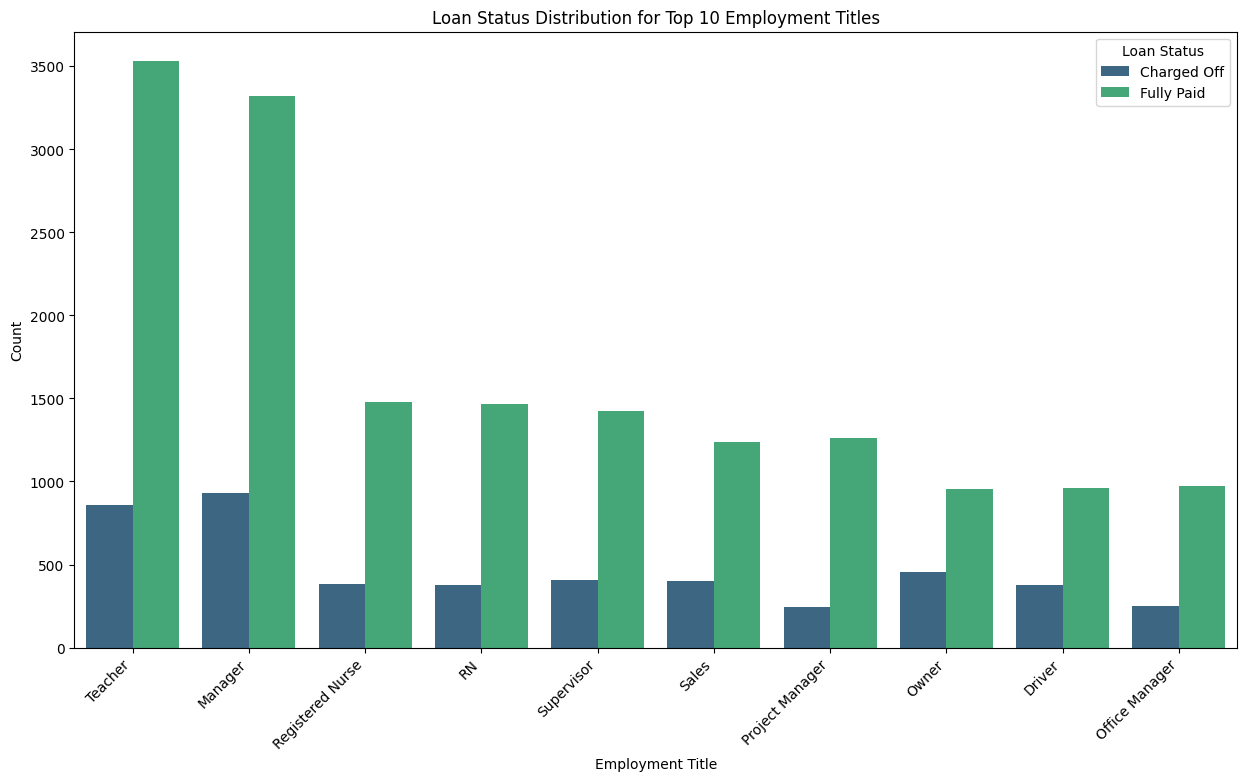


Crosstab of Top 10 Employment Titles vs. Loan Status:


loan_status       Charged Off  Fully Paid
emp_title                                
Driver                    378         961
Manager                   929        3321
Office Manager            248         970
Owner                     456         954
Project Manager           246        1259
RN                        379        1467
Registered Nurse          380        1476
Sales                     399        1239
Supervisor                405        1425
Teacher                   857        3532

In [13]:
# 1. Create a count plot to visualize the relationship between emp_length and loan_status.
# Define the desired order for emp_length
emp_length_order = [
    '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
    '6 years', '7 years', '8 years', '9 years', '10+ years'
]

plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='emp_length', hue='loan_status', order=emp_length_order, palette='viridis')
plt.title('Relationship between Employment Length and Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

# 2. Print the value counts and the proportion of 'Charged Off' loans for each emp_length category.
print("Value counts for emp_length and loan_status:")
emp_length_loan_status_counts = df.groupby('emp_length')['loan_status'].value_counts().unstack(fill_value=0)
display(emp_length_loan_status_counts)

print("\nProportion of 'Charged Off' loans for each emp_length category:")
# Calculate proportion of 'Charged Off'
emp_length_loan_status_counts['Total'] = emp_length_loan_status_counts['Charged Off'] + emp_length_loan_status_counts['Fully Paid']
emp_length_loan_status_counts['Charged Off Proportion'] = emp_length_loan_status_counts['Charged Off'] / emp_length_loan_status_counts['Total']
display(emp_length_loan_status_counts[['Charged Off', 'Total', 'Charged Off Proportion']].sort_values('Charged Off Proportion', ascending=False))


# 3. For emp_title, identify the top 10 most frequent job titles.
print("\nTop 10 most frequent job titles:")
top_10_emp_titles = df['emp_title'].value_counts().nlargest(10).index
print(list(top_10_emp_titles))

# 4. Filter the DataFrame to include only loans with these top 10 job titles.
df_top_emp_titles = df[df['emp_title'].isin(top_10_emp_titles)].copy()

# 5. Create a count plot showing the distribution of loan_status for these top 10 emp_title categories.
plt.figure(figsize=(15, 8))
sns.countplot(data=df_top_emp_titles, x='emp_title', hue='loan_status', order=top_10_emp_titles, palette='viridis')
plt.title('Loan Status Distribution for Top 10 Employment Titles')
plt.xlabel('Employment Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

# 6. Print the crosstab of the top 10 emp_title categories versus loan_status.
print("\nCrosstab of Top 10 Employment Titles vs. Loan Status:")
crosstab_emp_title_loan = pd.crosstab(df_top_emp_titles['emp_title'], df_top_emp_titles['loan_status'])
display(crosstab_emp_title_loan)

## Investigate grade and subgrade vs. interest rate and loan status

### Subtask:
Investigate grade and subgrade vs. interest rate and loan status.


**Reasoning**:
Create box plots to visualize the relationship between 'grade' and 'int_rate', and 'sub_grade' and 'int_rate'.



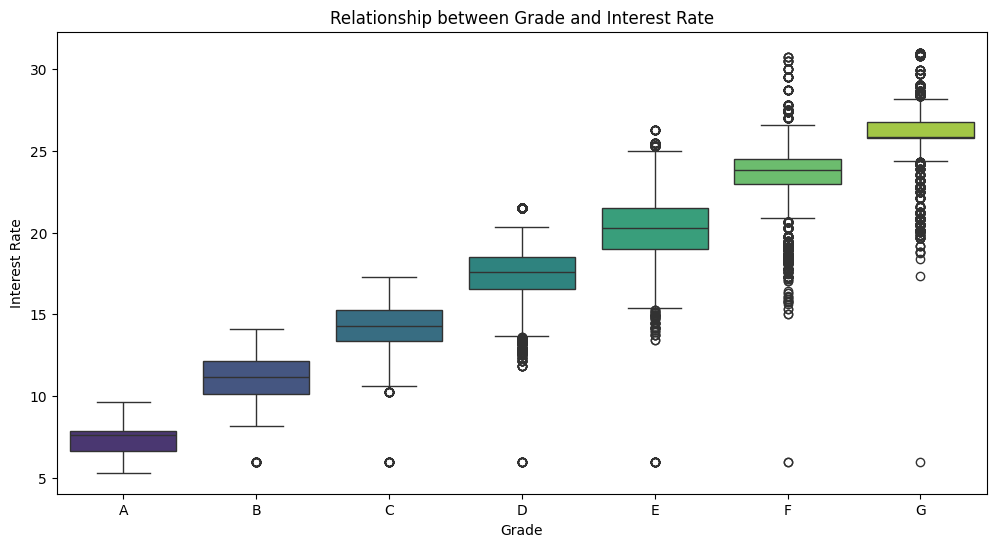

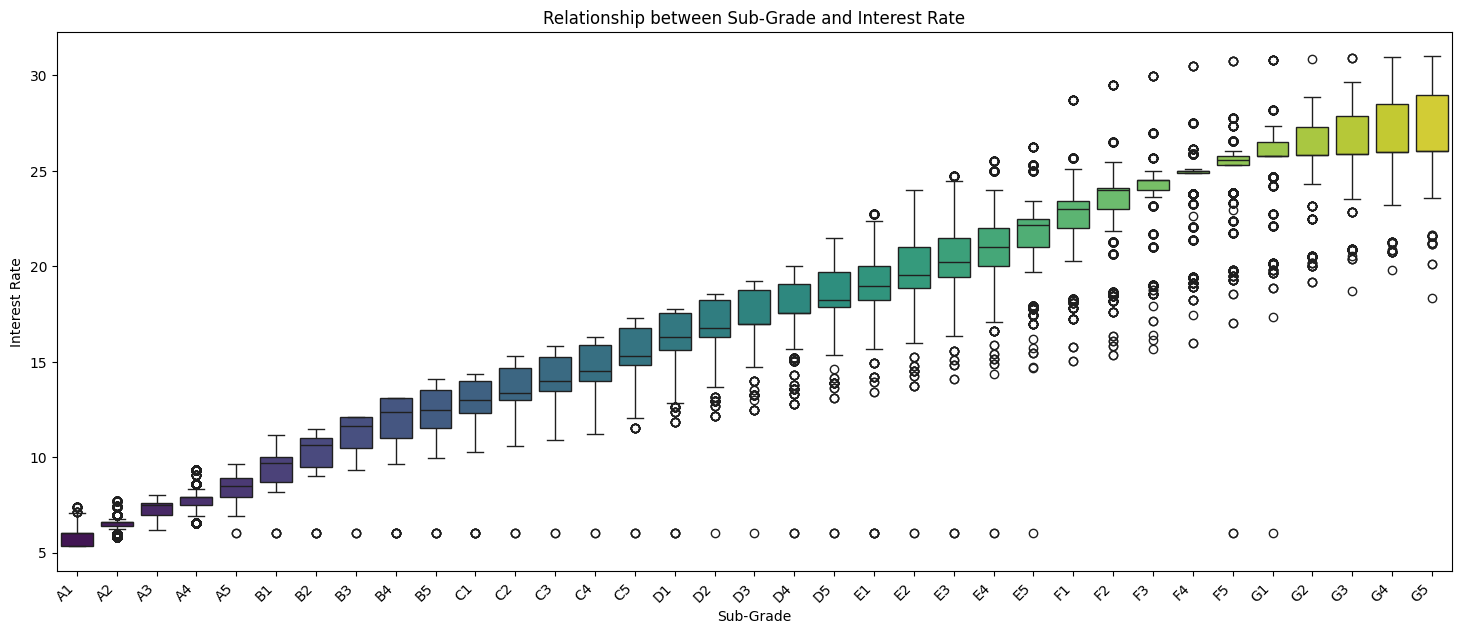

In [14]:
# 1. Create a box plot to visualize the relationship between 'grade' and 'int_rate'.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='grade', y='int_rate', order=sorted(df['grade'].unique()), palette='viridis')
plt.title('Relationship between Grade and Interest Rate')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')
plt.show()

# 2. Create a box plot to visualize the relationship between 'sub_grade' and 'int_rate'.
plt.figure(figsize=(18, 7))
sns.boxplot(data=df, x='sub_grade', y='int_rate', order=sorted(df['sub_grade'].unique()), palette='viridis')
plt.title('Relationship between Sub-Grade and Interest Rate')
plt.xlabel('Sub-Grade')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

**Reasoning**:
Create count plots to visualize the relationship between 'grade' and 'loan_status', and 'sub_grade' and 'loan_status'.



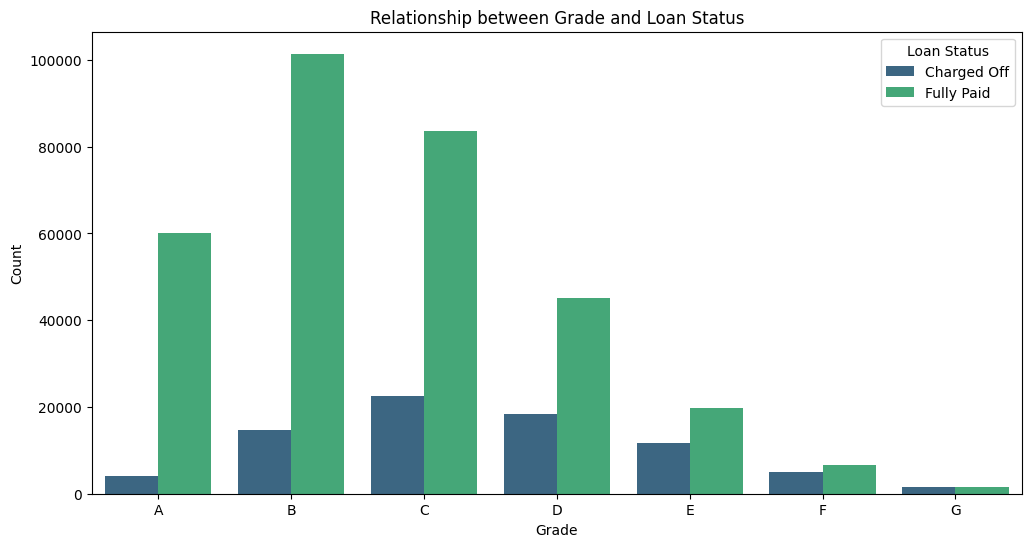

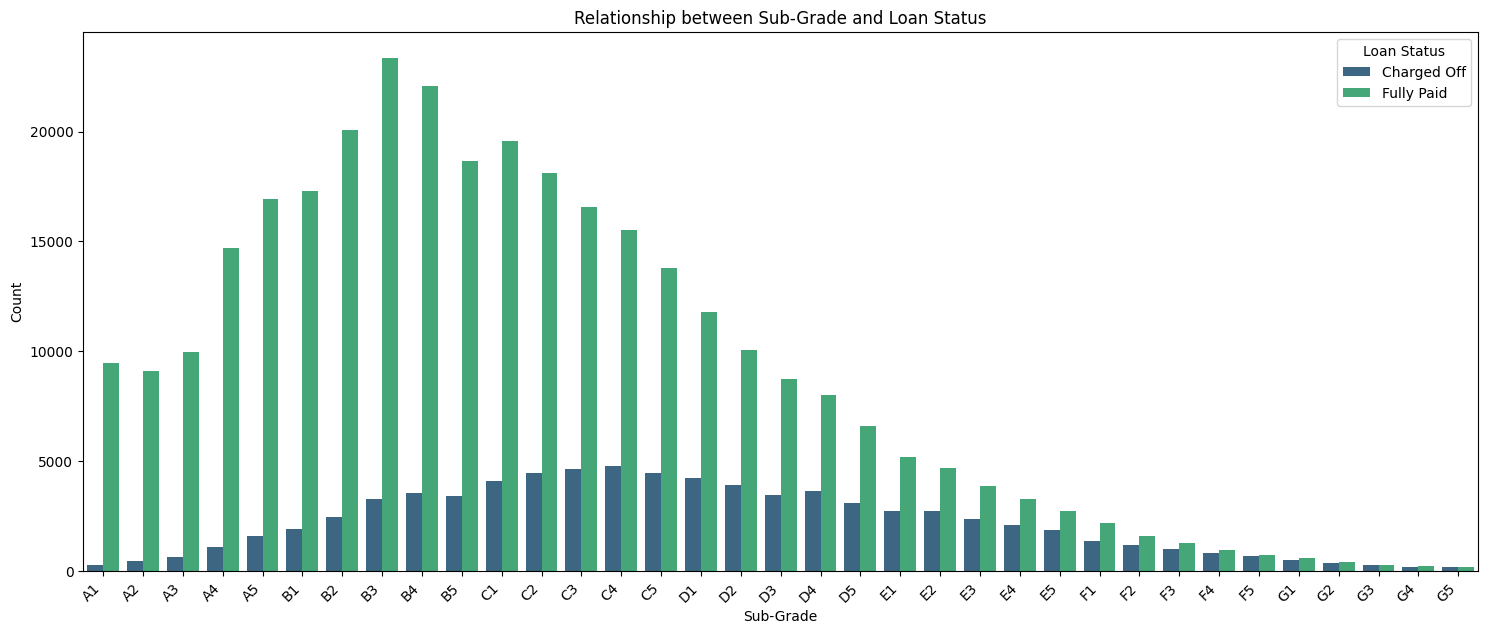

In [15]:
# 3. Create a count plot to visualize the relationship between 'grade' and 'loan_status'.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='grade', hue='loan_status', order=sorted(df['grade'].unique()), palette='viridis')
plt.title('Relationship between Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

# 4. Create a count plot to visualize the relationship between 'sub_grade' and 'loan_status'.
plt.figure(figsize=(18, 7))
sns.countplot(data=df, x='sub_grade', hue='loan_status', order=sorted(df['sub_grade'].unique()), palette='viridis')
plt.title('Relationship between Sub-Grade and Loan Status')
plt.xlabel('Sub-Grade')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

## Analyze `purpose` and `title`

### Subtask:
Analyze the relationship between 'purpose' and 'loan_status', and see if common 'title' entries correlate with loan outcomes.


**Reasoning**:
The subtask requires analyzing the relationship between 'purpose' and 'loan_status', and common 'title' entries and 'loan_status'. This can be done by creating count plots and crosstabs.



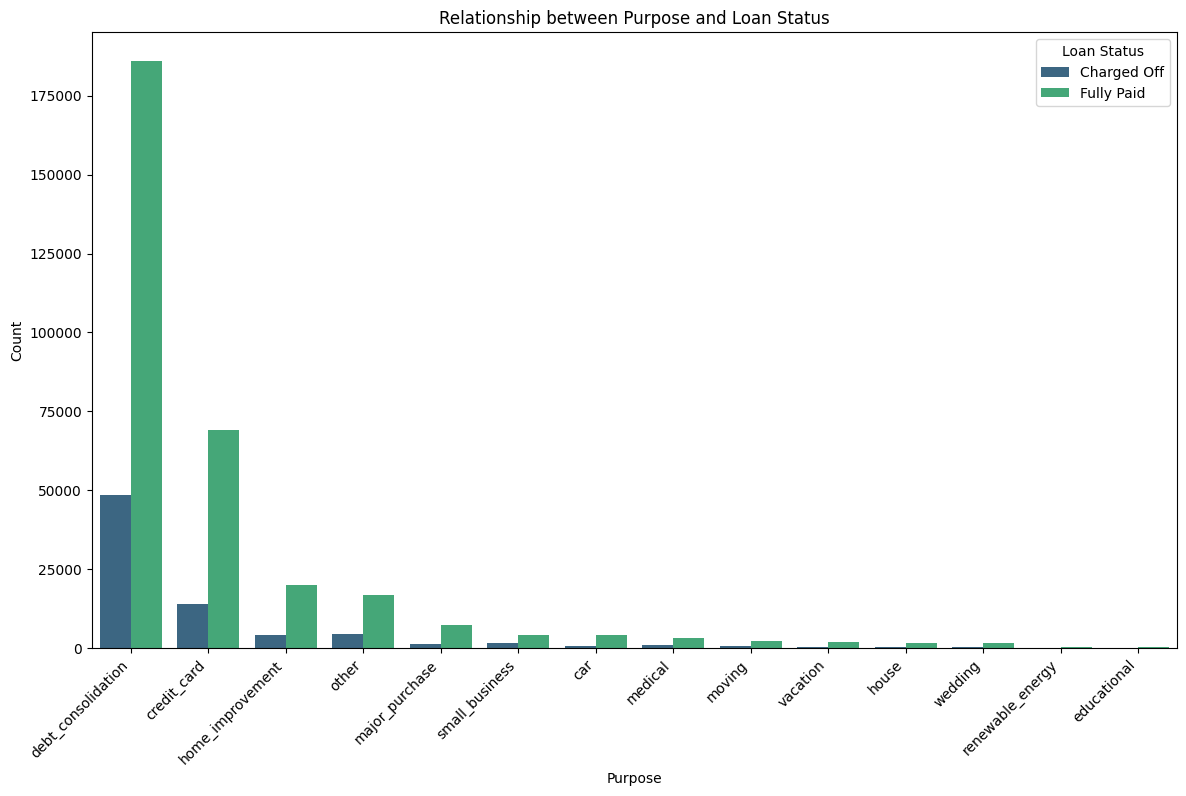

Value counts for purpose and loan_status:


loan_status         Charged Off  Fully Paid
purpose                                    
car                         633        4064
credit_card               13874       69145
debt_consolidation        48640      185867
educational                  42         215
home_improvement           4087       19943
house                       434        1767
major_purchase             1448        7342
medical                     911        3285
moving                      670        2184
other                      4495       16690
renewable_energy             77         252
small_business             1679        4022
vacation                    464        1988
wedding                     219        1593


Proportion of 'Charged Off' loans for each purpose category:


loan_status         Charged Off   Total  Charged Off Proportion
purpose                                                        
small_business             1679    5701                0.294510
moving                      670    2854                0.234758
renewable_energy             77     329                0.234043
medical                     911    4196                0.217112
other                      4495   21185                0.212178
debt_consolidation        48640  234507                0.207414
house                       434    2201                0.197183
vacation                    464    2452                0.189233
home_improvement           4087   24030                0.170079
credit_card               13874   83019                0.167118
major_purchase             1448    8790                0.164733
educational                  42     257                0.163424
car                         633    4697                0.134767
wedding                     219    1812                0.120861


Top 10 most frequent title entries:
['Debt consolidation', 'Credit card refinancing', 'Home improvement', 'Other', 'Debt Consolidation', 'Major purchase', 'Consolidation', 'debt consolidation', 'Business', 'Debt Consolidation Loan']


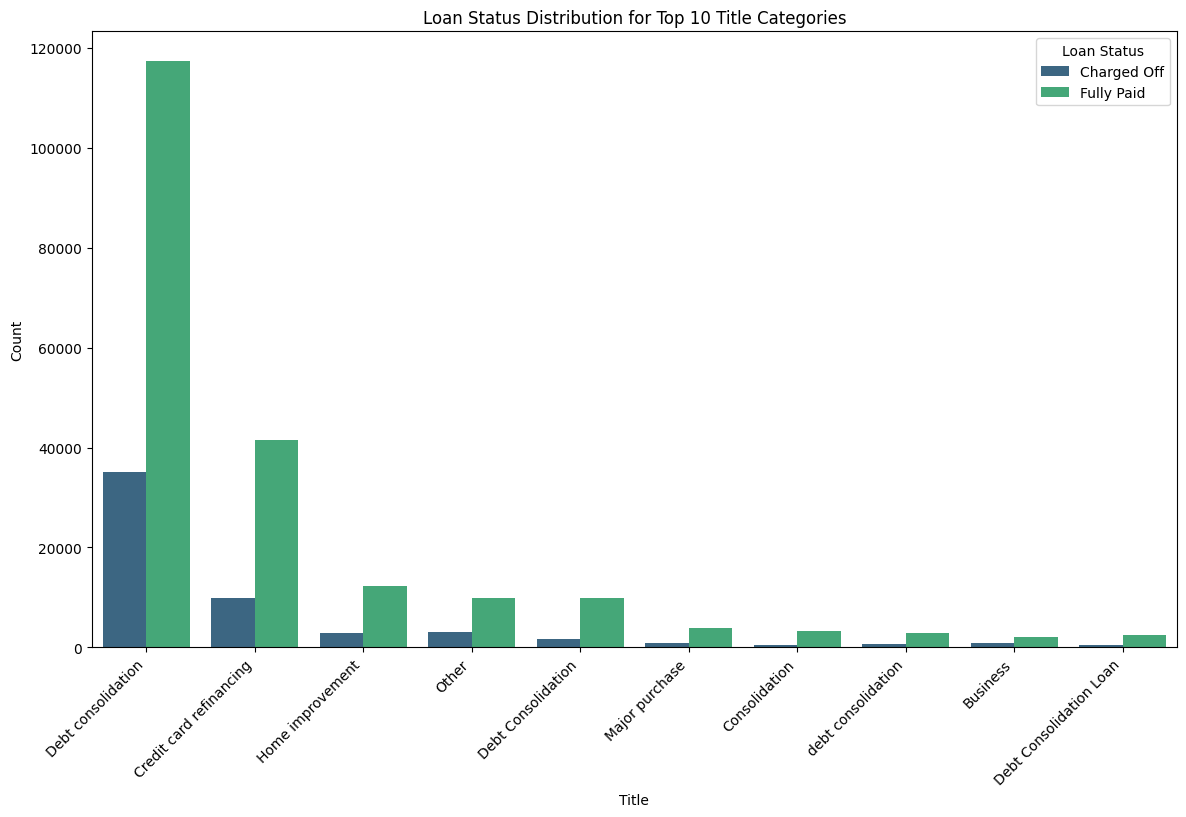


Crosstab of Top 10 Title Categories vs. Loan Status:


loan_status              Charged Off  Fully Paid
title                                           
Business                         959        1990
Consolidation                    550        3302
Credit card refinancing         9927       41560
Debt Consolidation              1730        9878
Debt Consolidation Loan          434        2430
Debt consolidation             35088      117384
Home improvement                2899       12365
Major purchase                   972        3797
Other                           3031        9899
debt consolidation               720        2827

In [16]:
# 1. Create a count plot to visualize the relationship between 'purpose' and 'loan_status'.
# Order the purpose categories by the total number of loans.
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='purpose', hue='loan_status', order=df['purpose'].value_counts().index, palette='viridis')
plt.title('Relationship between Purpose and Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

# 2. Print the value counts of 'purpose' and the proportion of 'Charged Off' loans for each purpose category.
print("Value counts for purpose and loan_status:")
purpose_loan_status_counts = df.groupby('purpose')['loan_status'].value_counts().unstack(fill_value=0)
display(purpose_loan_status_counts)

print("\nProportion of 'Charged Off' loans for each purpose category:")
purpose_loan_status_counts['Total'] = purpose_loan_status_counts['Charged Off'] + purpose_loan_status_counts['Fully Paid']
purpose_loan_status_counts['Charged Off Proportion'] = purpose_loan_status_counts['Charged Off'] / purpose_loan_status_counts['Total']
display(purpose_loan_status_counts[['Charged Off', 'Total', 'Charged Off Proportion']].sort_values('Charged Off Proportion', ascending=False))


# 3. Identify the top 10 most frequent 'title' entries.
print("\nTop 10 most frequent title entries:")
top_10_titles = df['title'].value_counts().nlargest(10).index
print(list(top_10_titles))

# 4. Filter the DataFrame to include only loans with these top 10 'title' entries.
# Handle potential NaN values in 'title' before filtering
df_filtered_titles = df[df['title'].isin(top_10_titles)].copy()

# 5. Create a count plot showing the distribution of 'loan_status' for these top 10 'title' categories.
plt.figure(figsize=(14, 8))
sns.countplot(data=df_filtered_titles, x='title', hue='loan_status', order=top_10_titles, palette='viridis')
plt.title('Loan Status Distribution for Top 10 Title Categories')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.show()

# 6. Print the crosstab of the top 10 'title' categories versus 'loan_status'.
print("\nCrosstab of Top 10 Title Categories vs. Loan Status:")
crosstab_title_loan = pd.crosstab(df_filtered_titles['title'], df_filtered_titles['loan_status'])
display(crosstab_title_loan)

## Examine interaction between features

### Subtask:
Explore potential interactions between pairs of features that might collectively influence loan status, even if their individual impact is not very strong.


**Reasoning**:
Explore potential interactions between selected pairs of numerical features and visualize their relationship with loan status using scatter plots.



Exploring interactions between pairs of numerical features:


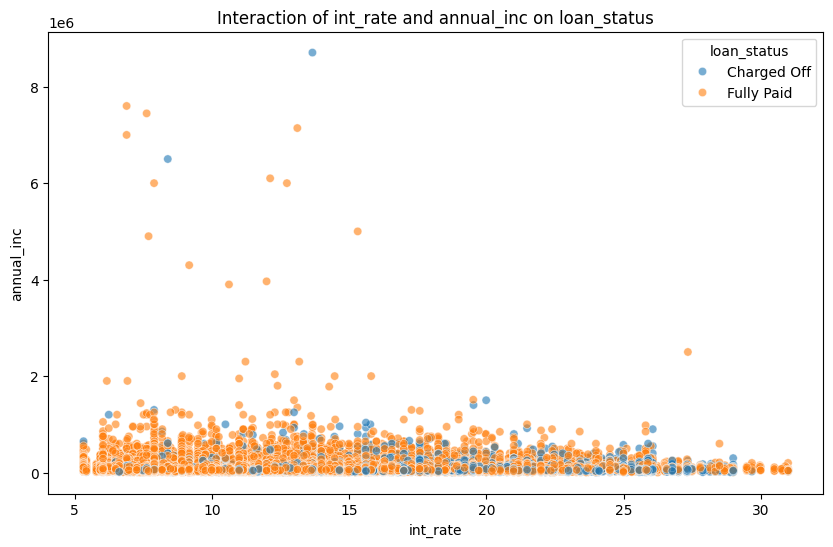

Comments on the interaction between int_rate and annual_inc with respect to loan_status:
------------------------------


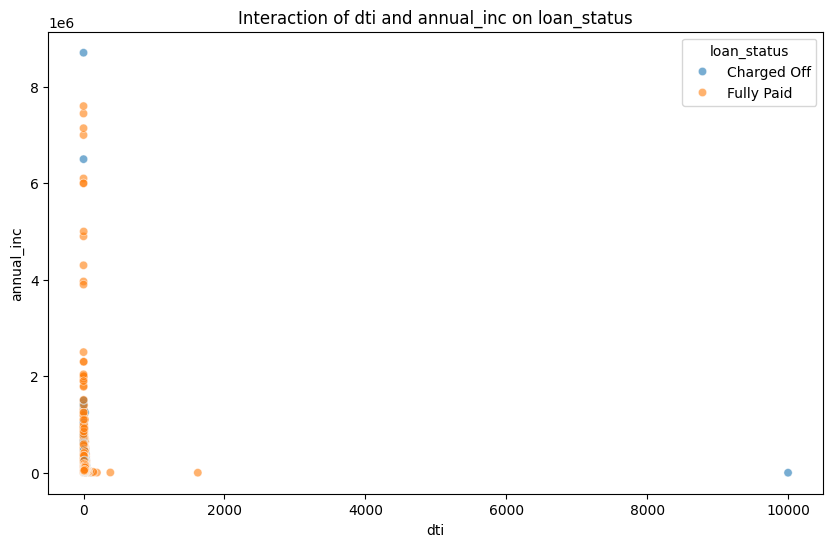

Comments on the interaction between dti and annual_inc with respect to loan_status:
------------------------------


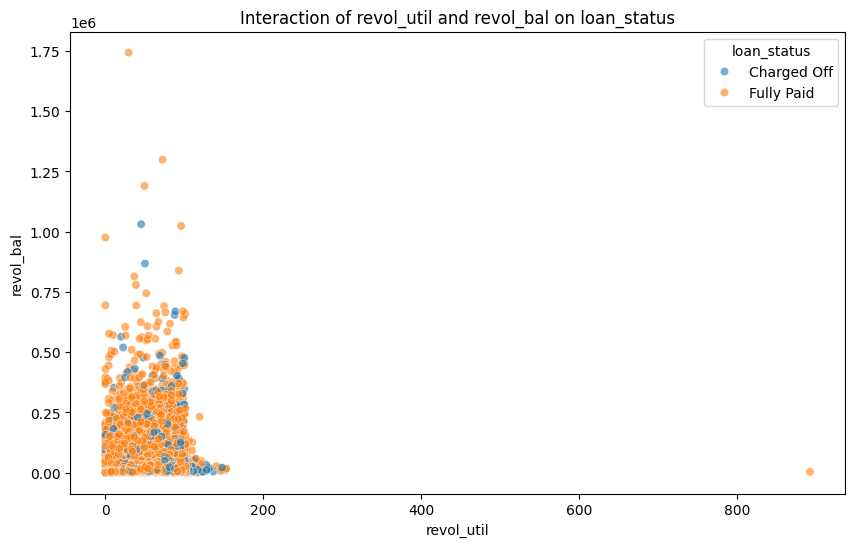

Comments on the interaction between revol_util and revol_bal with respect to loan_status:
------------------------------


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


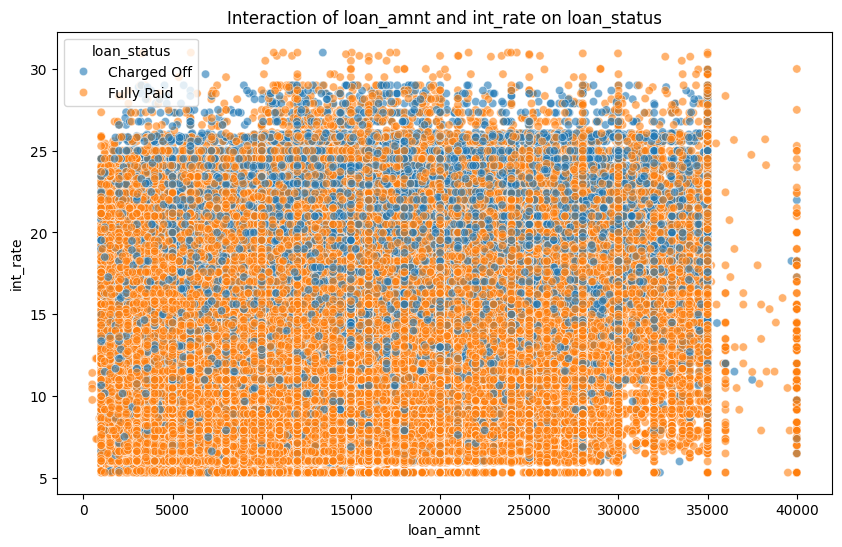

Comments on the interaction between loan_amnt and int_rate with respect to loan_status:
------------------------------


In [17]:
# Select a few pairs of numerical features for interaction analysis
# Based on univariate and bivariate analysis, features like annual_inc, dti,
# int_rate, and loan_amnt seem important.
numerical_interaction_pairs = [
    ('int_rate', 'annual_inc'),
    ('dti', 'annual_inc'),
    ('revol_util', 'revol_bal'),
    ('loan_amnt', 'int_rate') # Re-plot with hue for interaction
]

print("Exploring interactions between pairs of numerical features:")
for col1, col2 in numerical_interaction_pairs:
    if col1 in df.columns and col2 in df.columns and target_variable in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col1, y=col2, hue=target_variable, alpha=0.6)
        plt.title(f'Interaction of {col1} and {col2} on {target_variable}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.legend(title=target_variable)
        plt.show()
        print(f"Comments on the interaction between {col1} and {col2} with respect to {target_variable}:")
        # Briefly comment on visible patterns, if any separation or clustering is observed
        print("-" * 30)
    else:
        print(f"Skipping scatter plot for {col1} and {col2} as one or more columns not found.")


**Reasoning**:
Explore potential interactions between selected pairs of categorical or mixed features and visualize their relationship with loan status using appropriate plots (grouped bar plots, heatmaps, or box plots).




Exploring interactions between pairs of categorical/mixed features:

Interaction between grade and emp_length on loan_status:


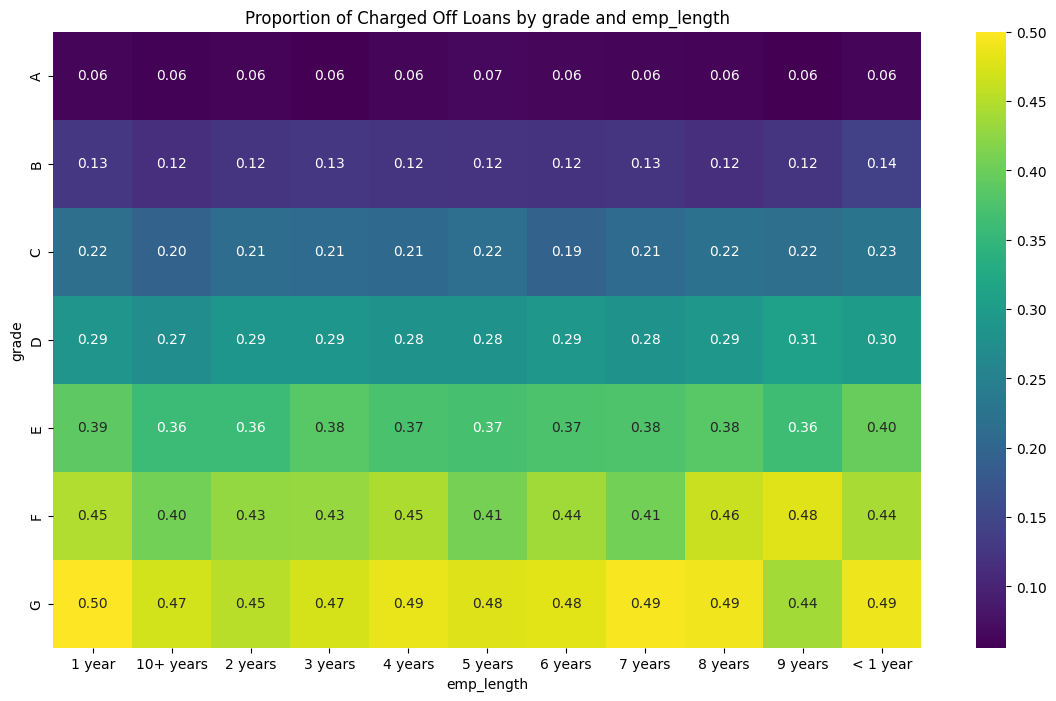

Comments on the interaction between grade and emp_length with respect to loan_status:
------------------------------

Interaction between home_ownership and term on loan_status:


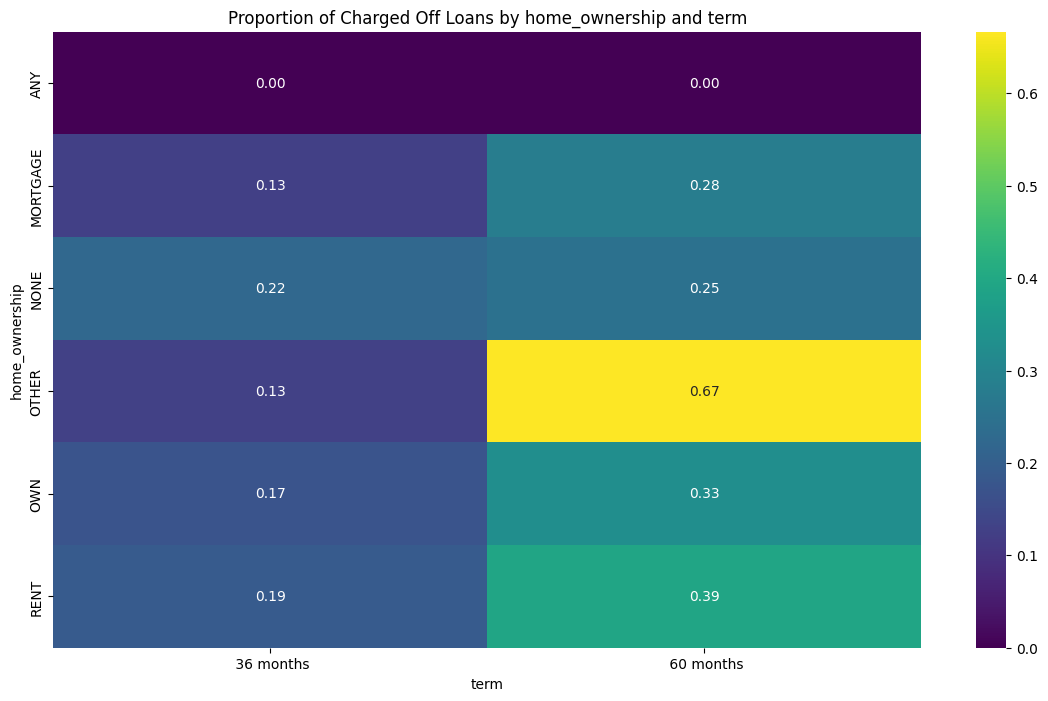

Comments on the interaction between home_ownership and term with respect to loan_status:
------------------------------

Interaction between home_ownership and annual_inc on loan_status:


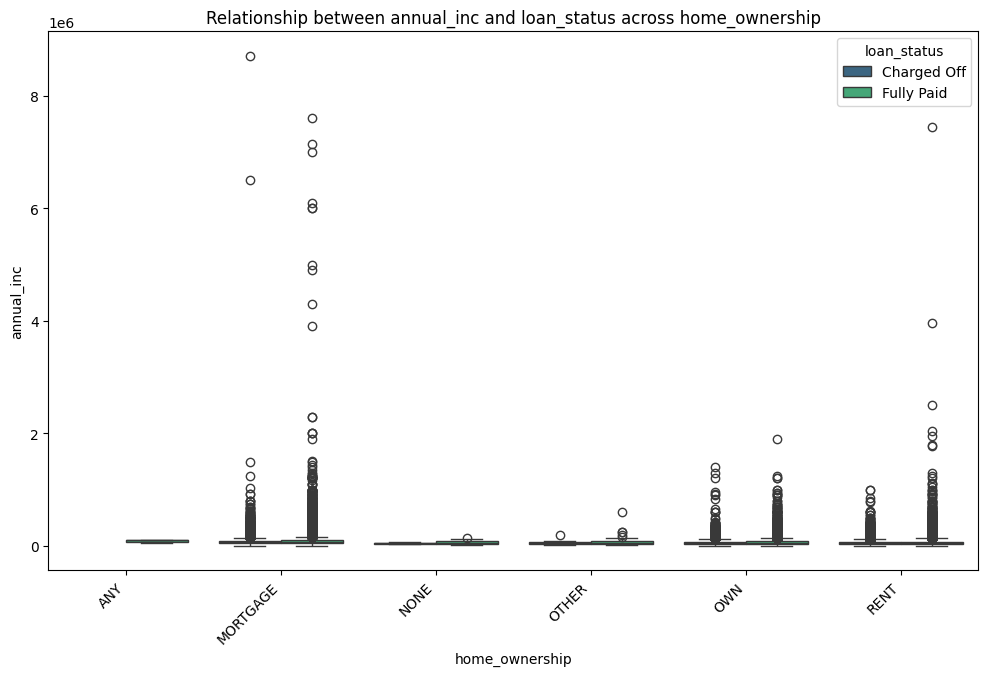

Comments on the interaction between home_ownership and annual_inc with respect to loan_status:
------------------------------

Interaction between grade and dti on loan_status:


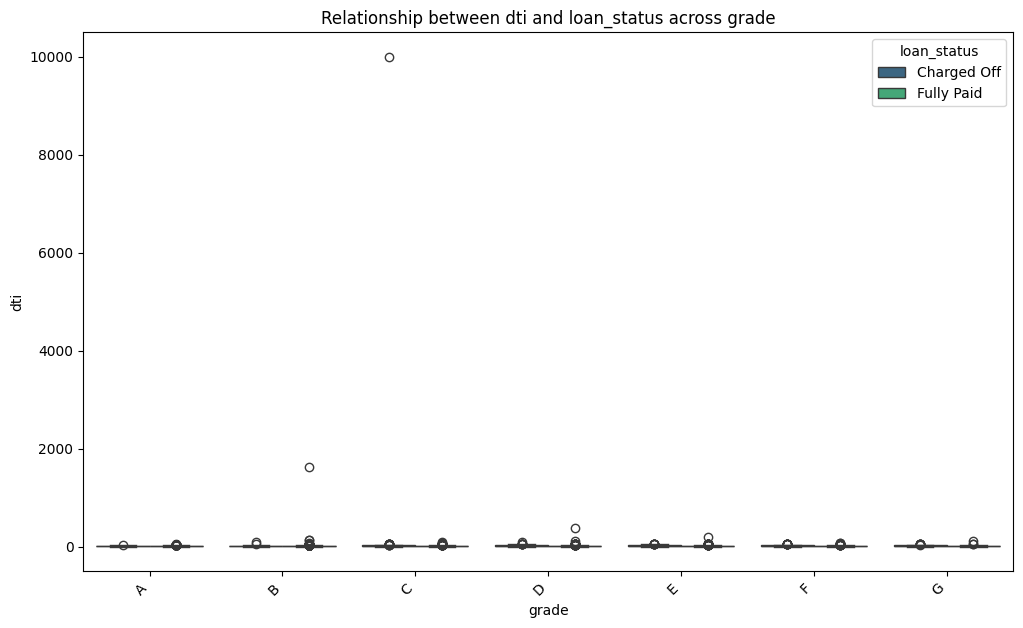

Comments on the interaction between grade and dti with respect to loan_status:
------------------------------


In [18]:
# Select a few pairs of categorical or mixed features for interaction analysis
# Based on prior EDA, grade, emp_length, home_ownership, and annual_inc (numerical) are relevant.
categorical_interaction_pairs = [
    ('grade', 'emp_length'),
    ('home_ownership', 'term')
]

mixed_interaction_pairs = [
    ('home_ownership', 'annual_inc'),
    ('grade', 'dti')
]

print("\nExploring interactions between pairs of categorical/mixed features:")

# Categorical-Categorical Interactions (Grouped Bar Plots of Proportion)
for col1, col2 in categorical_interaction_pairs:
    if col1 in df.columns and col2 in df.columns and target_variable in df.columns:
        print(f"\nInteraction between {col1} and {col2} on {target_variable}:")
        # Calculate proportion of 'Charged Off' loans for each combination of categories
        ct = pd.crosstab(df[col1], df[col2], values=df[target_variable].cat.codes, aggfunc='mean') # Assuming Charged Off is 0 and Fully Paid is 1
        # Adjust if 'Charged Off' is 1 and 'Fully Paid' is 0
        if df[target_variable].cat.categories[0] == 'Charged Off':
             ct = 1 - ct # If Charged Off is the first category (index 0), mean will be closer to 0 for Charged Off. We want proportion of Charged Off.

        plt.figure(figsize=(14, 8))
        sns.heatmap(ct, annot=True, cmap='viridis', fmt=".2f")
        plt.title(f'Proportion of Charged Off Loans by {col1} and {col2}')
        plt.xlabel(col2)
        plt.ylabel(col1)
        plt.show()
        print(f"Comments on the interaction between {col1} and {col2} with respect to {target_variable}:")
        print("-" * 30)
    else:
        print(f"Skipping heatmap for {col1} and {col2} as one or more columns not found.")


# Mixed-Feature Interactions (Box Plots or Binned Numerical + Grouped Bar Plot)
for cat_col, num_col in mixed_interaction_pairs:
    if cat_col in df.columns and num_col in df.columns and target_variable in df.columns:
        print(f"\nInteraction between {cat_col} and {num_col} on {target_variable}:")
        # Use box plots for visualization
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df, x=cat_col, y=num_col, hue=target_variable, palette='viridis')
        plt.title(f'Relationship between {num_col} and {target_variable} across {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title=target_variable)
        plt.show()
        print(f"Comments on the interaction between {cat_col} and {num_col} with respect to {target_variable}:")
        # Briefly comment on differences in numerical distribution for loan status within each category
        print("-" * 30)
    else:
         print(f"Skipping box plot for {cat_col} and {num_col} as one or more columns not found.")


## Analyze the distribution of loan status over potentially important features

### Subtask:
Analyze the distribution of loan status over potentially important features.


**Reasoning**:
I will create a function to calculate and plot the proportion of 'Charged Off' loans for a given feature, handling both categorical and numerical features by binning the latter. Then, I will apply this function to the specified features to analyze their relationship with the proportion of charged-off loans.



Analyzing proportion of 'Charged Off' for feature: grade


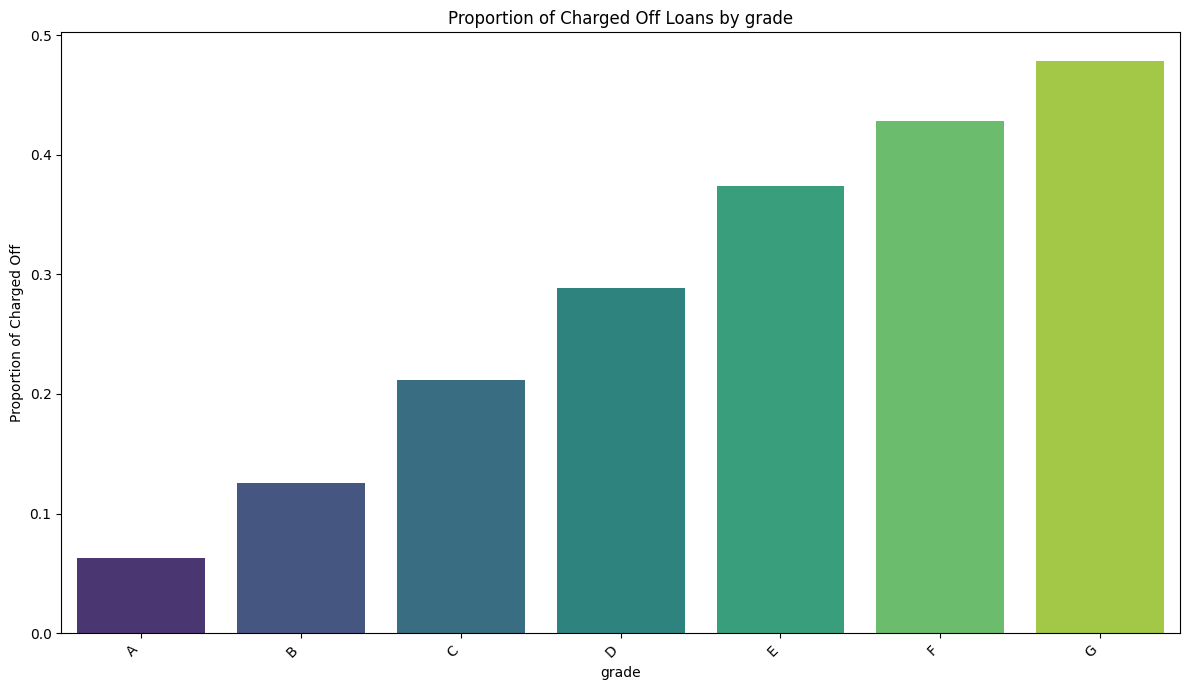

Proportion of 'Charged Off' loans by grade:



loan_status  Charged Off   Total  Charged Off Proportion
grade                                                   
G                   1461    3054                0.478389
F                   5037   11772                0.427880
E                  11765   31488                0.373634
D                  18338   63524                0.288678
C                  22449  105987                0.211809
B                  14587  116018                0.125730
A                   4036   64187                0.062879

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: sub_grade


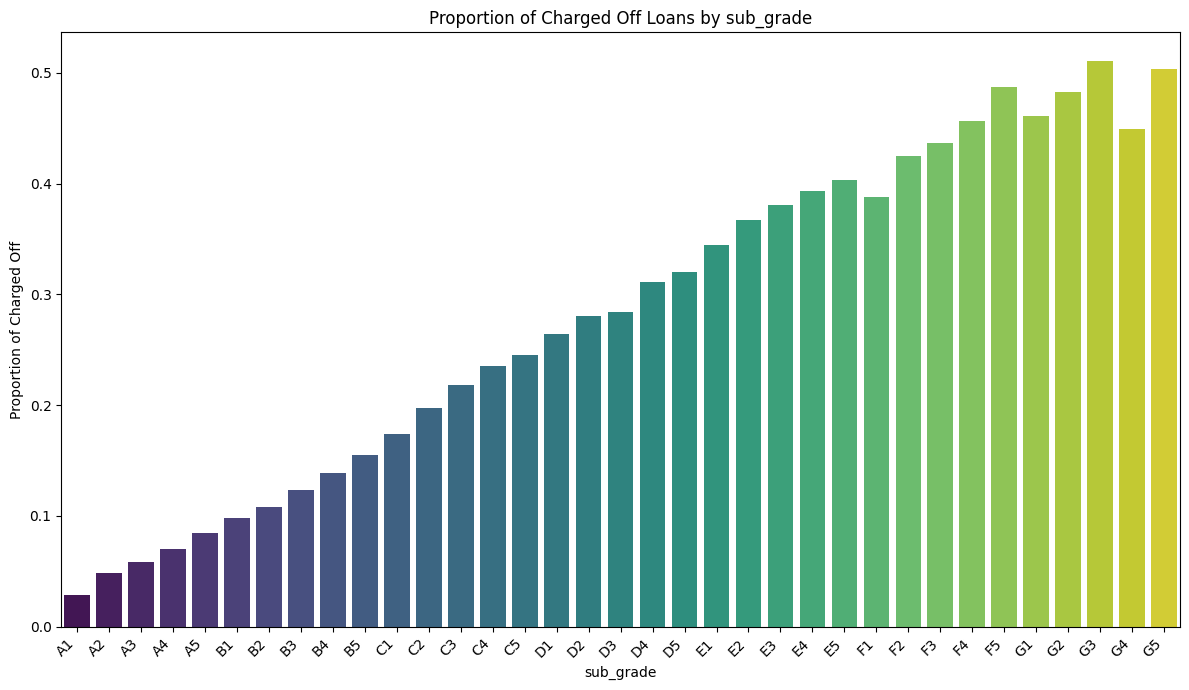

Proportion of 'Charged Off' loans by sub_grade:



loan_status  Charged Off  Total  Charged Off Proportion
sub_grade                                              
G3                   282    552                0.510870
G5                   159    316                0.503165
F5                   680   1397                0.486757
G2                   364    754                0.482759
G1                   488   1058                0.461248
F4                   815   1787                0.456072
G4                   168    374                0.449198
F3                   997   2286                0.436133
F2                  1175   2766                0.424801
E5                  1843   4572                0.403106
E4                  2107   5361                0.393024
F1                  1370   3536                0.387443
E3                  2361   6207                0.380377
E2                  2730   7431                0.367380
E1                  2724   7917                0.344070
D5                  3105   9700                0.320103
D4                  3629  11657                0.311315
D3                  3474  12223                0.284218
D2                  3911  13951                0.280338
D1                  4219  15993                0.263803
C5                  4471  18244                0.245067
C4                  4773  20280                0.235355
C3                  4635  21221                0.218416
C2                  4460  22580                0.197520
C1                  4110  23662                0.173696
B5                  3424  22085                0.155037
B4                  3543  25601                0.138393
B3                  3288  26655                0.123354
B2                  2441  22495                0.108513
B1                  1891  19182                0.098582
A5                  1573  18526                0.084908
A4                  1109  15789                0.070239
A3                   614  10576                0.058056
A2                   461   9567                0.048186
A1                   279   9729                0.028677

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: emp_length


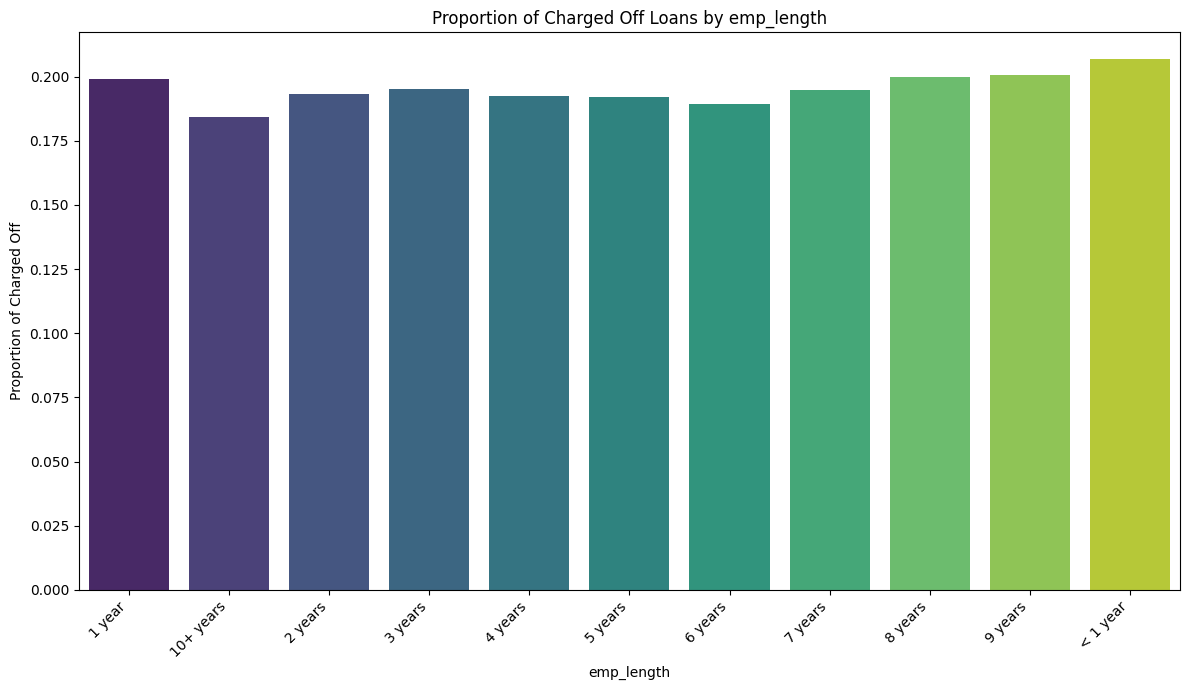

Proportion of 'Charged Off' loans by emp_length:



loan_status  Charged Off   Total  Charged Off Proportion
emp_length                                              
< 1 year            6563   31725                0.206872
9 years             3070   15314                0.200470
8 years             3829   19168                0.199760
1 year              5154   25882                0.199135
3 years             6182   31665                0.195231
7 years             4055   20819                0.194774
2 years             6924   35827                0.193262
4 years             4608   23952                0.192385
5 years             5092   26495                0.192187
6 years             3943   20841                0.189194
10+ years          23215  126041                0.184186

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: home_ownership


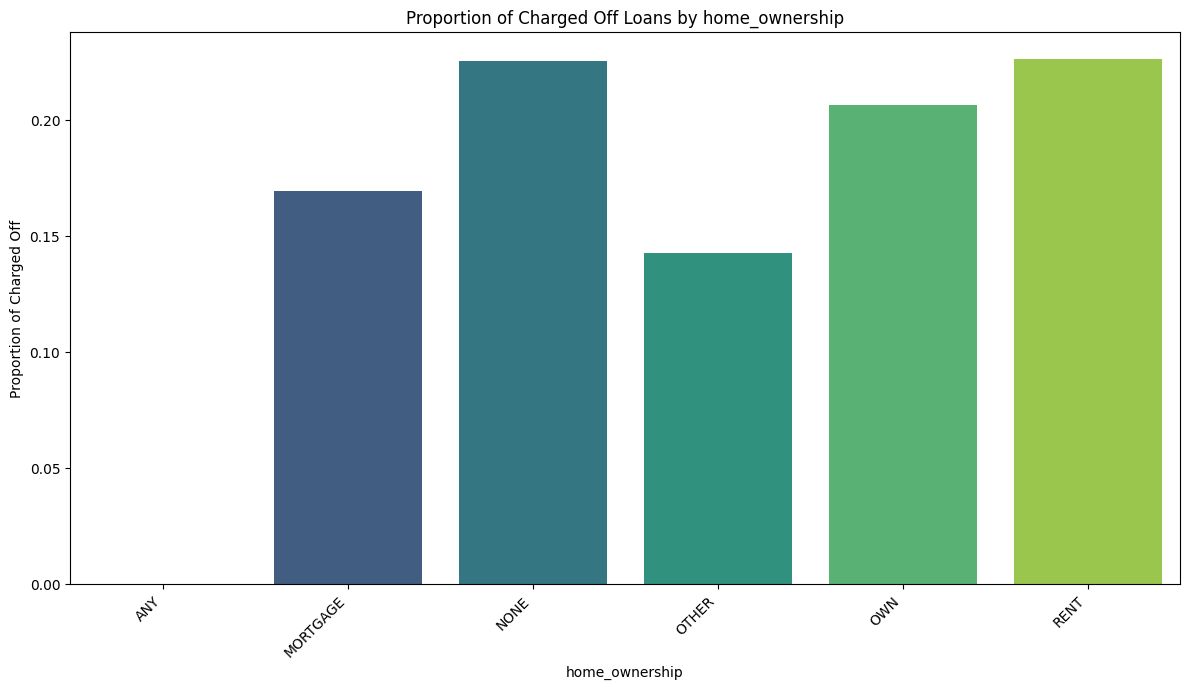

Proportion of 'Charged Off' loans by home_ownership:



loan_status     Charged Off   Total  Charged Off Proportion
home_ownership                                             
RENT                  36212  159790                0.226622
NONE                      7      31                0.225806
OWN                    7806   37746                0.206803
MORTGAGE              33632  198348                0.169561
OTHER                    16     112                0.142857
ANY                       0       3                0.000000

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: annual_inc


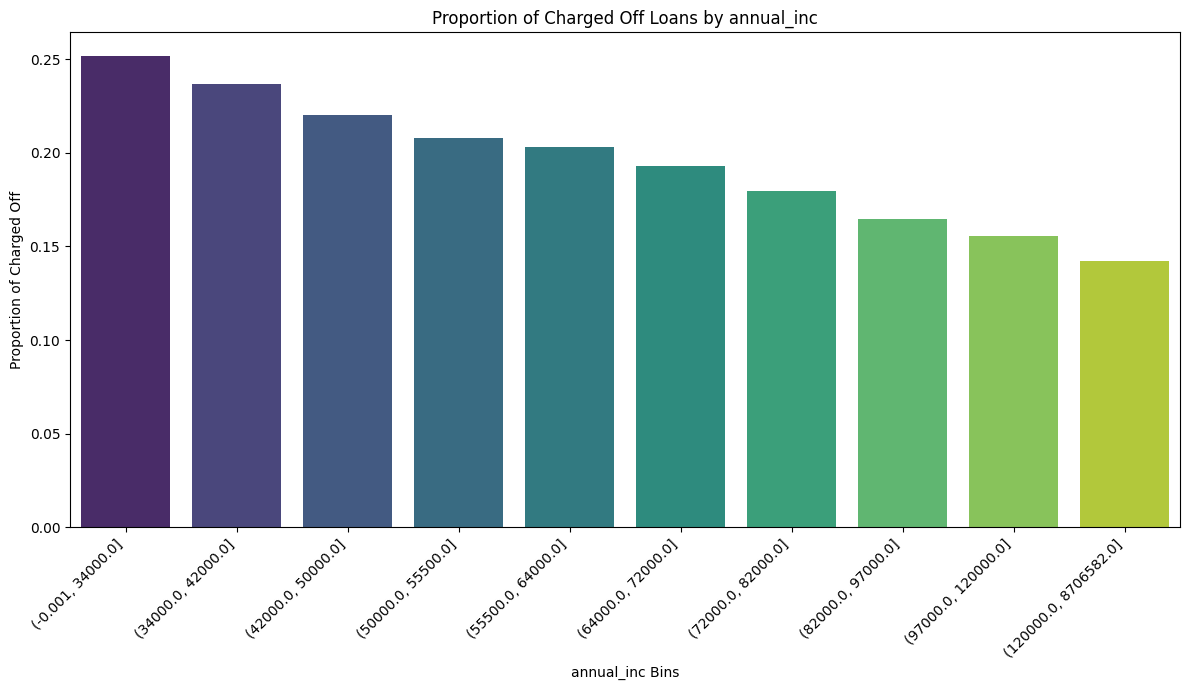

Proportion of 'Charged Off' loans by annual_inc:



loan_status            Charged Off  Total  Charged Off Proportion
annual_inc_bin                                                   
(-0.001, 34000.0]            10168  40394                0.251721
(34000.0, 42000.0]           10183  42973                0.236963
(42000.0, 50000.0]           10517  47814                0.219956
(50000.0, 55500.0]            5683  27303                0.208146
(55500.0, 64000.0]            8251  40657                0.202942
(64000.0, 72000.0]            7891  40872                0.193066
(72000.0, 82000.0]            6688  37217                0.179703
(82000.0, 97000.0]            6520  39661                0.164393
(97000.0, 120000.0]           6175  39757                0.155319
(120000.0, 8706582.0]         5597  39382                0.142121

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: dti


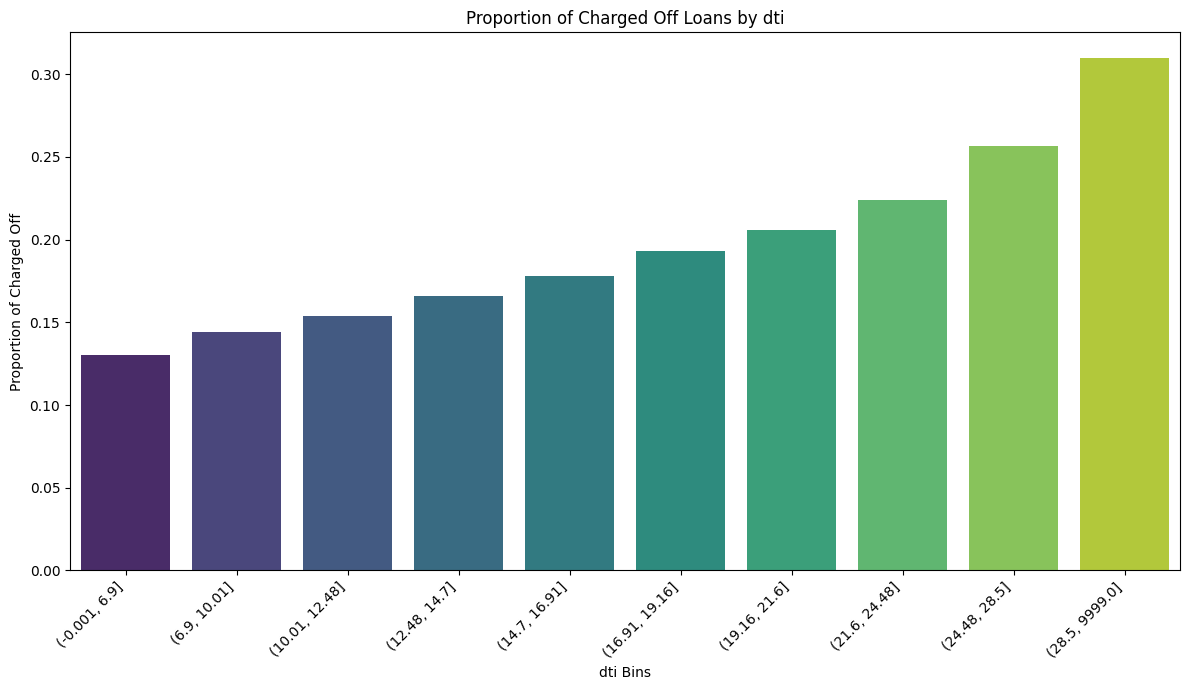

Proportion of 'Charged Off' loans by dti:



loan_status     Charged Off  Total  Charged Off Proportion
dti_bin                                                   
(28.5, 9999.0]        12253  39555                0.309771
(24.48, 28.5]         10153  39583                0.256499
(21.6, 24.48]          8859  39557                0.223955
(19.16, 21.6]          8148  39644                0.205529
(16.91, 19.16]         7634  39504                0.193246
(14.7, 16.91]          7064  39623                0.178280
(12.48, 14.7]          6575  39574                0.166144
(10.01, 12.48]         6113  39778                0.153678
(6.9, 10.01]           5707  39608                0.144087
(-0.001, 6.9]          5167  39604                0.130467

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: int_rate


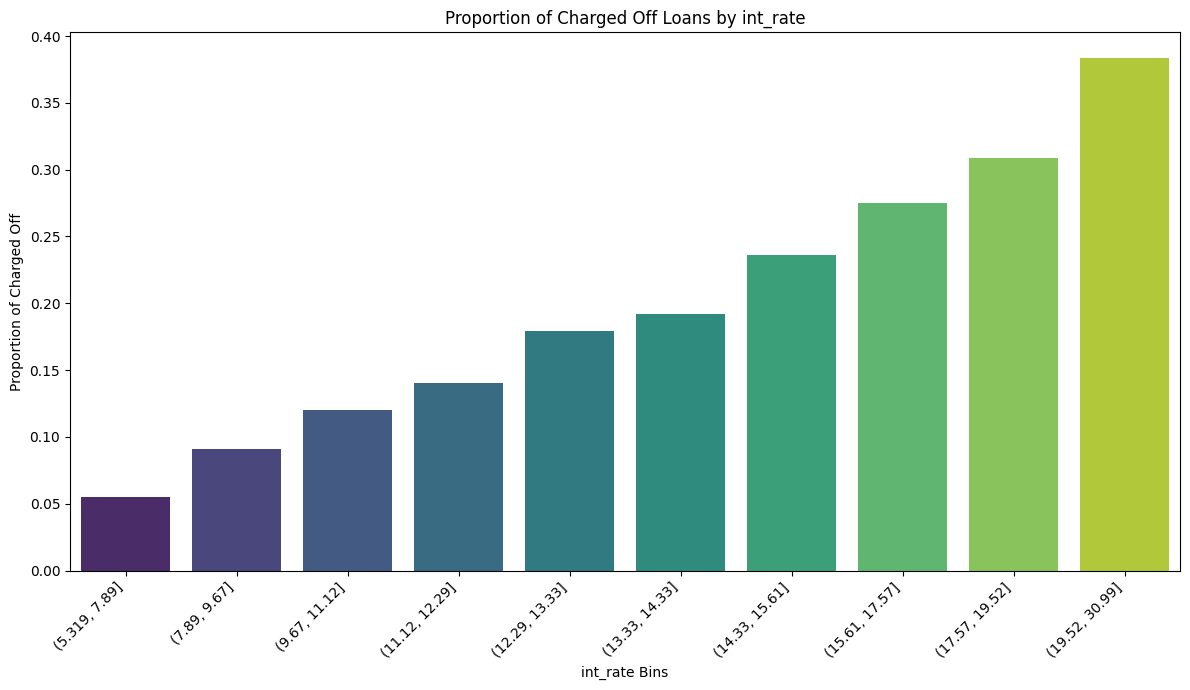

Proportion of 'Charged Off' loans by int_rate:



loan_status     Charged Off  Total  Charged Off Proportion
int_rate_bin                                              
(19.52, 30.99]        14443  37652                0.383592
(17.57, 19.52]        11119  36032                0.308587
(15.61, 17.57]        11887  43168                0.275366
(14.33, 15.61]         9306  39456                0.235858
(13.33, 14.33]         7697  40063                0.192122
(12.29, 13.33]         7079  39518                0.179134
(11.12, 12.29]         5785  41278                0.140147
(9.67, 11.12]          4427  36905                0.119957
(7.89, 9.67]           3586  39257                0.091347
(5.319, 7.89]          2344  42701                0.054893

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: loan_amnt


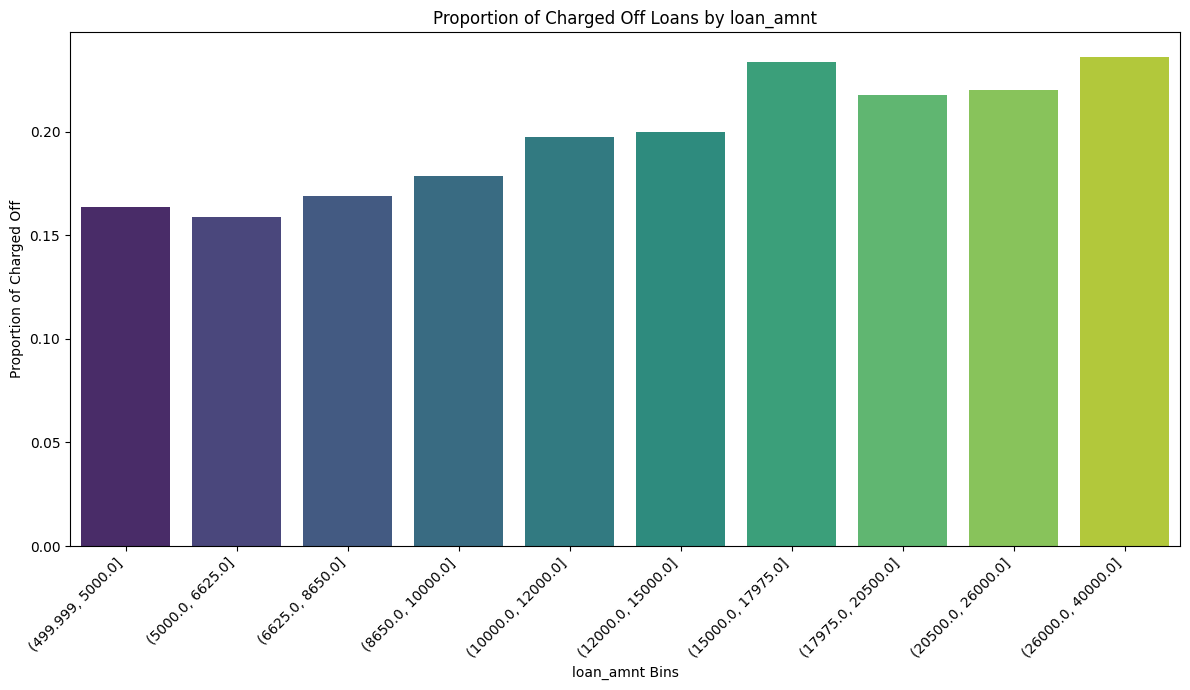

Proportion of 'Charged Off' loans by loan_amnt:



loan_status         Charged Off  Total  Charged Off Proportion
loan_amnt_bin                                                 
(26000.0, 40000.0]         9271  39252                0.236192
(15000.0, 17975.0]         6032  25825                0.233572
(20500.0, 26000.0]         8729  39683                0.219968
(17975.0, 20500.0]         8649  39760                0.217530
(12000.0, 15000.0]         9456  47268                0.200051
(10000.0, 12000.0]         7889  39905                0.197695
(8650.0, 10000.0]          8119  45495                0.178459
(6625.0, 8650.0]           6662  39428                0.168966
(499.999, 5000.0]          8422  51435                0.163741
(5000.0, 6625.0]           4444  27979                0.158833

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: purpose


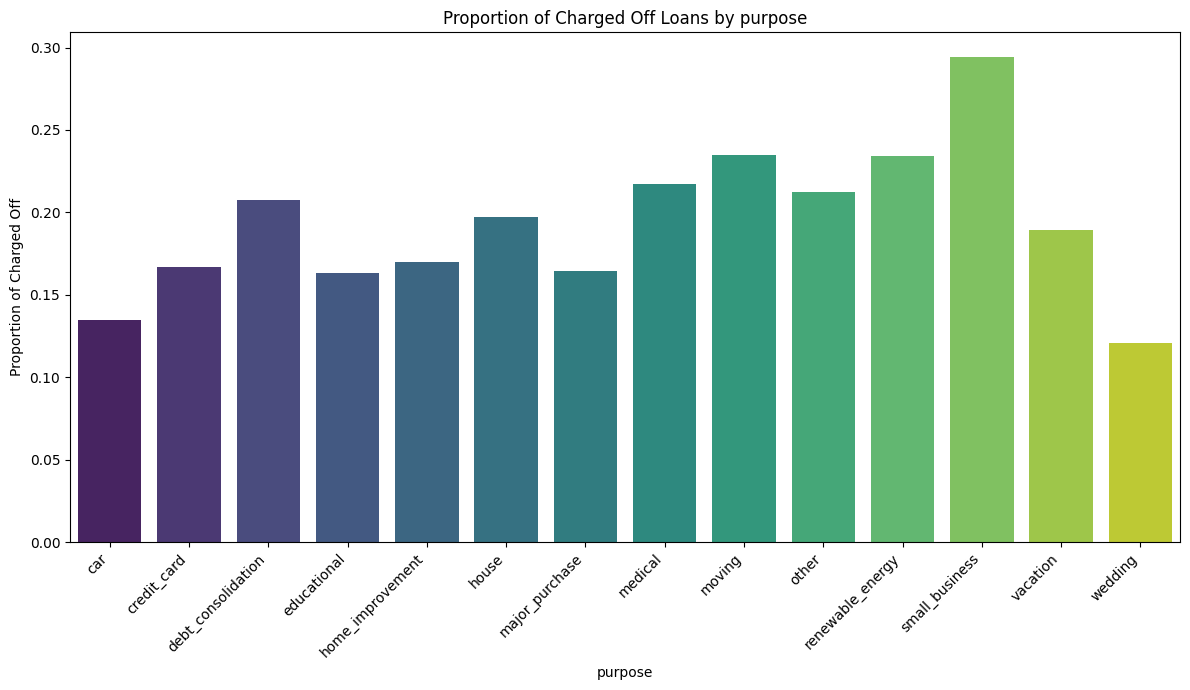

Proportion of 'Charged Off' loans by purpose:



loan_status         Charged Off   Total  Charged Off Proportion
purpose                                                        
small_business             1679    5701                0.294510
moving                      670    2854                0.234758
renewable_energy             77     329                0.234043
medical                     911    4196                0.217112
other                      4495   21185                0.212178
debt_consolidation        48640  234507                0.207414
house                       434    2201                0.197183
vacation                    464    2452                0.189233
home_improvement           4087   24030                0.170079
credit_card               13874   83019                0.167118
major_purchase             1448    8790                0.164733
educational                  42     257                0.163424
car                         633    4697                0.134767
wedding                     219    1812                0.120861

--------------------------------------------------
Analyzing proportion of 'Charged Off' for feature: term


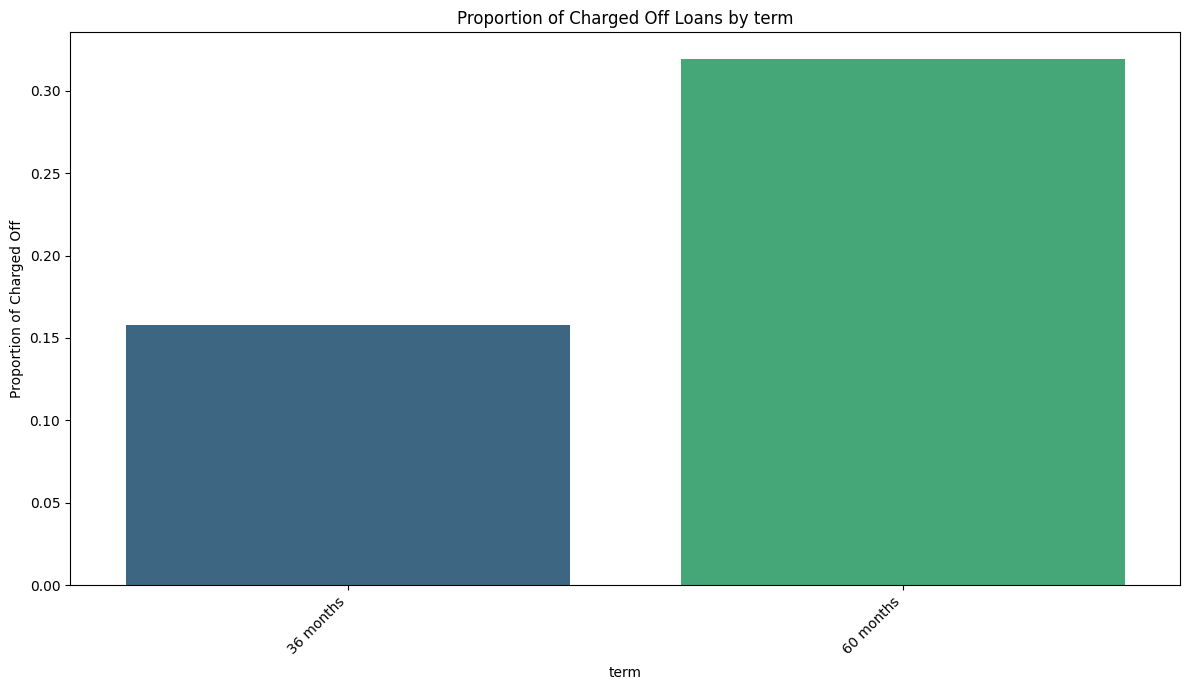

Proportion of 'Charged Off' loans by term:



loan_status  Charged Off   Total  Charged Off Proportion
term                                                    
60 months          30033   94025                0.319415
36 months          47640  302005                0.157746

--------------------------------------------------


In [19]:
def plot_charged_off_proportion(df, feature, target='loan_status', num_bins=10):
    """
    Calculates and plots the proportion of 'Charged Off' loans for a given feature.

    Args:
        df: pandas DataFrame.
        feature: Name of the feature column (string).
        target: Name of the target column (string), assumed to have 'Charged Off' and 'Fully Paid'.
        num_bins: Number of bins for numerical features.
    """
    if feature not in df.columns:
        print(f"Feature '{feature}' not found in the DataFrame.")
        return
    if target not in df.columns:
        print(f"Target variable '{target}' not found in the DataFrame.")
        return
    if df[target].nunique() != 2:
         print(f"Target variable '{target}' does not have exactly two unique values.")
         return

    print(f"Analyzing proportion of 'Charged Off' for feature: {feature}")

    # Ensure target variable is categorical and has correct categories
    if not pd.api.types.is_categorical_dtype(df[target]):
        df[target] = df[target].astype('category')
    if 'Charged Off' not in df[target].cat.categories or 'Fully Paid' not in df[target].cat.categories:
         print(f"Target variable '{target}' does not have 'Charged Off' and 'Fully Paid' categories.")
         return

    # Calculate the proportion of Charged Off loans
    if pd.api.types.is_numeric_dtype(df[feature]):
        # For numerical features, create bins
        # Handle potential infinite values which can cause issues with binning
        if np.isinf(df[feature]).any():
             print(f"Warning: Infinite values found in feature '{feature}'. Replacing with NaN.")
             df[feature].replace([np.inf, -np.inf], np.nan, inplace=True)
        # Drop rows with NaN in the feature or target for accurate binning/calculation
        temp_df = df.dropna(subset=[feature, target]).copy()

        if temp_df[feature].nunique() > num_bins:
            # Use qcut for quantile-based binning to handle skewed distributions
            try:
                temp_df[f'{feature}_bin'] = pd.qcut(temp_df[feature], q=num_bins, duplicates='drop')
            except Exception as e:
                 print(f"Could not create quantile bins for {feature}. Falling back to cut. Error: {e}")
                 temp_df[f'{feature}_bin'] = pd.cut(temp_df[feature], bins=num_bins)

            grouped = temp_df.groupby(f'{feature}_bin')[target].value_counts().unstack(fill_value=0)
            xlabel = f'{feature} Bins'
        else:
            # If unique numerical values <= num_bins, treat as categorical
            grouped = temp_df.groupby(feature)[target].value_counts().unstack(fill_value=0)
            xlabel = feature

    elif pd.api.types.is_categorical_dtype(df[feature]) or df[feature].nunique() <= 20:
        # For categorical features with reasonable unique values
        # Drop rows with NaN in the feature or target
        temp_df = df.dropna(subset=[feature, target]).copy()
        grouped = temp_df.groupby(feature)[target].value_counts().unstack(fill_value=0)
        xlabel = feature

    else:
        print(f"Skipping feature '{feature}' due to high cardinality or unsupported data type.")
        return

    if 'Charged Off' not in grouped.columns or grouped.empty:
        print(f"No 'Charged Off' loans found for feature '{feature}' or no data after dropping NaNs.")
        return

    grouped['Total'] = grouped['Charged Off'] + grouped['Fully Paid']
    # Handle division by zero if a group has no loans
    grouped['Charged Off Proportion'] = grouped.apply(lambda row: row['Charged Off'] / row['Total'] if row['Total'] > 0 else 0, axis=1)

    # Sort by proportion of Charged Off loans
    grouped = grouped.sort_values('Charged Off Proportion', ascending=False)

    # Plotting
    plt.figure(figsize=(12, 7))
    sns.barplot(x=grouped.index, y=grouped['Charged Off Proportion'], palette='viridis')
    plt.title(f'Proportion of Charged Off Loans by {feature}')
    plt.xlabel(xlabel)
    plt.ylabel('Proportion of Charged Off')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"Proportion of 'Charged Off' loans by {feature}:\n")
    display(grouped[['Charged Off', 'Total', 'Charged Off Proportion']])
    print("-" * 50)


# Apply the function to potentially important features
important_features = [
    'grade', 'sub_grade', 'emp_length', 'home_ownership',
    'annual_inc', 'dti', 'int_rate', 'loan_amnt', 'purpose', 'term'
]

for feature in important_features:
    plot_charged_off_proportion(df, feature, target='loan_status')


## Summary:

### Data Analysis Key Findings

*   **Temporal Trends:** The volume of loans issued increased from 2013 to 2015. While absolute numbers of 'Fully Paid' and 'Charged Off' loans also increased, the proportion of each status remained relatively consistent across years.
*   **Geographic Influence:** State was successfully extracted for a large number of loans. Analysis of the top 20 states showed variation in the distribution of 'Charged Off' and 'Fully Paid' loans by location.
*   **Employment Length:** The proportion of 'Charged Off' loans is relatively consistent across most employment length categories, ranging from approximately 18.4% to 20.7%. Loans with '< 1 year' employment length had the highest proportion of charged-off loans (20.69%), while those with '10+ years' had the lowest (18.42%).
*   **Top Job Titles:** The top 10 most frequent job titles were identified. Analysis of loan status distribution within these titles provided insights into the default rates for common professions.
*   **Grade and Subgrade vs. Interest Rate:** There is a clear positive relationship between loan grade/subgrade and interest rate; lower grades/subgrades are associated with higher interest rates.
*   **Grade and Subgrade vs. Loan Status:** Lower grades (G, F) and their subgrades have significantly higher proportions of 'Charged Off' loans compared to higher grades (A, B).
*   **Purpose:** Loans for 'small_business' had the highest proportion of 'Charged Off' loans, while 'wedding' and 'car' had the lowest among the analyzed purposes.
*   **Term:** 60-month loan terms have a considerably higher proportion of 'Charged Off' loans than 36-month terms.
*   **Numerical Features:** Lower annual income, higher DTI, higher interest rates, and generally higher loan amounts are associated with a higher proportion of 'Charged Off' loans.
*   **Feature Interactions:** Interactions between features, such as the combination of `grade` and `emp_length` or `home_ownership` and `term`, show varying proportions of 'Charged Off' loans, suggesting that combined factors can influence loan outcomes.

### Insights or Next Steps

*   The analysis of grade, subgrade, interest rate, and loan term indicates strong relationships with loan status, suggesting these features will be highly important predictors in a model.
*   Further feature engineering could involve creating interaction terms or combining categories for features like `emp_length`, `purpose`, and `home_ownership` if their interactions or specific categories show significantly different risk profiles.


## Section 2: Data Preprocessing

This section focuses on cleaning and transforming the data to prepare it for building the logistic regression model.

### Duplicate value check

Investigating the dataset for any duplicate entries.

In [20]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Optional: Investigate duplicates based on a subset of features
# For example, checking for duplicates based on loan details and borrower information
subset_cols = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
               'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
               'verification_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
               'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']

duplicate_subset = df.duplicated(subset=subset_cols).sum()
print(f"Number of duplicate rows based on a subset of features: {duplicate_subset}")

# Since the number of duplicate rows is 0, no action is needed for duplicate rows.
# If there were duplicates, we would typically drop them:
# df_cleaned = df.drop_duplicates().copy()
# print(f"Shape after dropping duplicate rows: {df_cleaned.shape}")

Number of duplicate rows: 0
Number of duplicate rows based on a subset of features: 0


### Missing value treatment

Addressing missing values using appropriate techniques.

In [21]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:")
display(missing_values)

# Strategy for missing value imputation:
# - emp_title and title: High cardinality and many missing values. Imputing with a placeholder like 'Missing' or dropping might be options. Given the high cardinality, dropping might be more practical or using advanced encoding later. Let's impute with 'Missing' for now.
# - emp_length: Ordinal in nature. Impute with the mode or a specific value like 'Missing'. Mode is a reasonable strategy here.
# - mort_acc: Numerical. Relationship with home_ownership might exist. Impute with 0 for 'RENT', 'OWN', 'OTHER', 'NONE', 'ANY' and median for 'MORTGAGE'. Or, explore a more sophisticated imputation based on other features. Let's try imputing with 0 for non-MORTGAGE and median for MORTGAGE.
# - revol_util: Numerical. Impute with the median or mean. Median is more robust to outliers.
# - pub_rec_bankruptcies: Numerical, likely count. Impute with the mode (likely 0).

# Create a copy to avoid SettingWithCopyWarning
df_processed = df.copy()

# Impute missing values for categorical columns by adding 'Missing' to categories first
for col in ['emp_title', 'title']:
    if col in df_processed.columns and pd.api.types.is_categorical_dtype(df_processed[col]):
        if 'Missing' not in df_processed[col].cat.categories:
            df_processed[col] = df_processed[col].cat.add_categories('Missing')
        df_processed[col].fillna('Missing', inplace=True)
    elif col in df_processed.columns: # Handle if column is not categorical initially but has NaNs
         df_processed[col].fillna('Missing', inplace=True)


if 'emp_length' in df_processed.columns:
    if pd.api.types.is_categorical_dtype(df_processed['emp_length']):
         if 'Missing' not in df_processed['emp_length'].cat.categories:
            df_processed['emp_length'] = df_processed['emp_length'].cat.add_categories('Missing')
         df_processed['emp_length'].fillna(df_processed['emp_length'].mode()[0], inplace=True) # Impute with mode
    else:
         df_processed['emp_length'].fillna(df_processed['emp_length'].mode()[0], inplace=True) # Impute with mode


# Impute mort_acc based on home_ownership
if 'mort_acc' in df_processed.columns and 'home_ownership' in df_processed.columns:
    if pd.api.types.is_numeric_dtype(df_processed['mort_acc']):
        median_mort_acc_mortgage = df_processed[df_processed['home_ownership'] == 'MORTGAGE']['mort_acc'].median()
        df_processed['mort_acc'].fillna(median_mort_acc_mortgage, inplace=True)
        df_processed.loc[df_processed['home_ownership'] != 'MORTGAGE', 'mort_acc'] = df_processed.loc[df_processed['home_ownership'] != 'MORTGAGE', 'mort_acc'].fillna(0)
    else:
        print("mort_acc is not a numerical column. Skipping imputation based on home_ownership.")


if 'revol_util' in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed['revol_util']):
    df_processed['revol_util'].fillna(df_processed['revol_util'].median(), inplace=True) # Impute with median


if 'pub_rec_bankruptcies' in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed['pub_rec_bankruptcies']):
    df_processed['pub_rec_bankruptcies'].fillna(df_processed['pub_rec_bankruptcies'].mode()[0], inplace=True) # Impute with mode


print("\nMissing values after imputation:")
display(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])

Columns with missing values:


mort_acc                37795
emp_title               22927
emp_length              18301
title                    1756
pub_rec_bankruptcies      535
revol_util                276
dtype: int64


Missing values after imputation:


Series([], dtype: int64)

### Outlier treatment

Analyzing and treating outliers in numerical features.

Checking for outliers after missing value imputation:


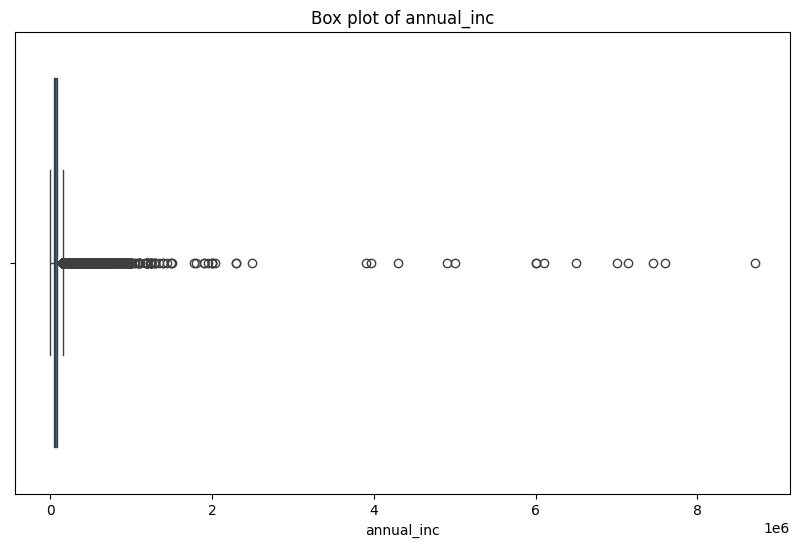

Statistical summary for annual_inc:


count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

------------------------------


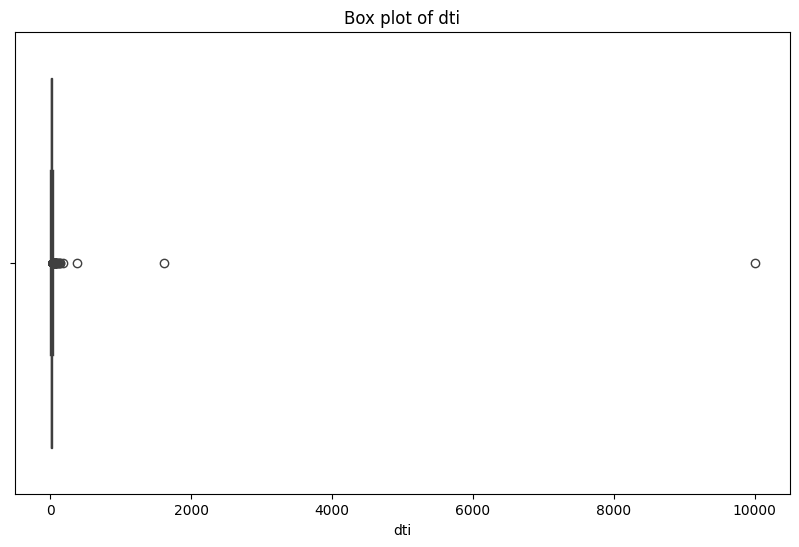

Statistical summary for dti:


count    396030.000000
mean         17.379514
std          18.019092
min           0.000000
25%          11.280000
50%          16.910000
75%          22.980000
max        9999.000000
Name: dti, dtype: float64

------------------------------


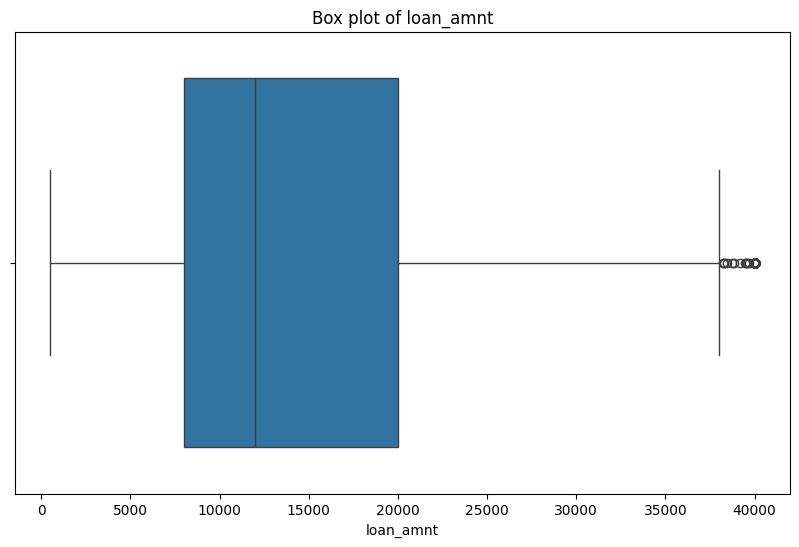

Statistical summary for loan_amnt:


count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

------------------------------


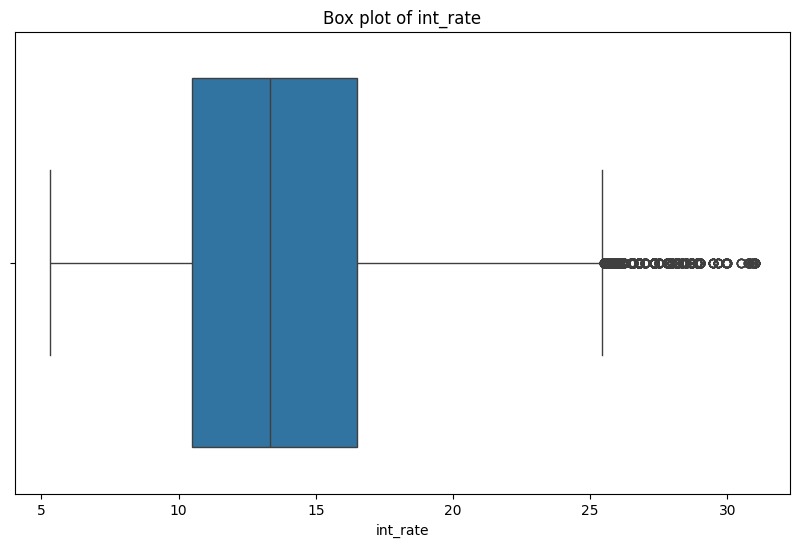

Statistical summary for int_rate:


count    396030.000000
mean         13.639400
std           4.472157
min           5.320000
25%          10.490000
50%          13.330000
75%          16.490000
max          30.990000
Name: int_rate, dtype: float64

------------------------------
Capped upper outliers for 'annual_inc' at 250000.00 (99th percentile).
Capped upper outliers for 'dti' at 36.43 (99th percentile).

Statistical summary after capping outliers:


annual_inc            dti      loan_amnt       int_rate
count  396030.000000  396030.000000  396030.000000  396030.000000
mean    72904.460201      17.326073   14113.888089      13.639400
std     40490.112343       8.068461    8357.441341       4.472157
min         0.000000       0.000000     500.000000       5.320000
25%     45000.000000      11.280000    8000.000000      10.490000
50%     64000.000000      16.910000   12000.000000      13.330000
75%     90000.000000      22.980000   20000.000000      16.490000
max    250000.000000      36.430000   40000.000000      30.990000

In [22]:
# Visualize numerical features for outlier detection (using box plots as seen in EDA)
# We already did this in the Bivariate Analysis section (numerical vs target).
# We can revisit some key features or check features not plotted before.

# Example: Checking annual_inc and dti again after potential imputation
numerical_cols_for_outlier_check = ['annual_inc', 'dti', 'loan_amnt', 'int_rate'] # Add other relevant numerical cols

print("Checking for outliers after missing value imputation:")
for col in numerical_cols_for_outlier_check:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_processed[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()
    print(f"Statistical summary for {col}:")
    display(df_processed[col].describe())
    print("-" * 30)

# Outlier Treatment Strategy:
# For highly skewed distributions with extreme outliers (e.g., annual_inc, dti), capping might be a suitable approach to retain data while reducing the impact of extremes.
# For others, depending on the model's sensitivity to outliers, we might decide to leave them or consider transformations.
# Let's consider capping for 'annual_inc' and 'dti' at the 99th percentile as an example.

# Capping 'annual_inc' and 'dti' at the 99th percentile
for col in ['annual_inc', 'dti']:
    if pd.api.types.is_numeric_dtype(df_processed[col]):
        upper_bound = df_processed[col].quantile(0.99)
        df_processed[col] = df_processed[col].clip(upper=upper_bound)
        print(f"Capped upper outliers for '{col}' at {upper_bound:.2f} (99th percentile).")
    else:
        print(f"Skipping capping for '{col}' as it is not a numerical column.")


print("\nStatistical summary after capping outliers:")
display(df_processed[numerical_cols_for_outlier_check].describe())

### Feature engineering

Creating new features or modifying existing ones to enhance the model's predictive power.

In [23]:
import pandas as pd
import numpy as np

# Ensure date columns are datetime objects
df_processed['issue_d'] = pd.to_datetime(df_processed['issue_d'], errors='coerce')
df_processed['earliest_cr_line'] = pd.to_datetime(df_processed['earliest_cr_line'], errors='coerce')


# a. Creation of Flags: For attributes like Pub_rec, Mort_acc, and Pub_rec_bankruptcies
# Create binary flag for pub_rec > 0
df_processed['has_pub_rec'] = (df_processed['pub_rec'] > 0).astype(int)

# Create binary flag for mort_acc > 0 (after imputation)
df_processed['has_mort_acc'] = (df_processed['mort_acc'] > 0).astype(int)

# Create binary flag for pub_rec_bankruptcies > 0 (after imputation)
df_processed['has_pub_rec_bankruptcies'] = (df_processed['pub_rec_bankruptcies'] > 0).astype(int)

print("\nCreated flag features:")
display(df_processed[['pub_rec', 'has_pub_rec', 'mort_acc', 'has_mort_acc', 'pub_rec_bankruptcies', 'has_pub_rec_bankruptcies']].head())


# b. Extracting month and year from date-related variables
# Create a feature for credit history length
# Assuming current date is around the latest issue date for context
# Ensure latest_issue_date is a single value and not a Series
latest_issue_date = df_processed['issue_d'].max()
# Calculate difference only for non-null date values
df_processed['credit_history_length'] = (latest_issue_date - df_processed['earliest_cr_line']).dt.days / 365.25
print("\nCreated credit_history_length feature:")
display(df_processed[['issue_d', 'earliest_cr_line', 'credit_history_length']].head())

# Extract year and month features again to ensure they are available in df_processed
df_processed['issue_year'] = df_processed['issue_d'].dt.year
df_processed['issue_month'] = df_processed['issue_d'].dt.month
df_processed['earliest_cr_year'] = df_processed['earliest_cr_line'].dt.year
df_processed['earliest_cr_month'] = df_processed['earliest_cr_line'].dt.month


# c. Deriving state or region from address fields
# We already extracted 'state' in the advanced EDA section.
# If the extraction was successful and the 'state' column exists:
if 'state' in df_processed.columns and not df_processed['state'].empty:
    print("\n'state' feature already derived from 'address'.")
    display(df_processed[['address', 'state']].head())
else:
    print("\n'state' feature not found or is empty. Skipping state-based feature engineering.")
    # If state extraction was not successful, we might consider alternative approaches
    # or decide not to use this feature.


# d. Mapping the emp_length
# Convert 'emp_length' to numerical values. Handle '< 1 year' and '10+ years'.
# Define a mapping dictionary
emp_length_mapping = {
    '< 1 year': 0.5, # Using 0.5 as a numerical representation
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10, # Using 10 as a numerical representation
    'Missing': 0 # Assigning 0 or another value for missing, consistent with imputation
}

# Ensure 'emp_length' is not a categorical type before mapping if 'Missing' was added as a category
# Convert to object temporarily if it's categorical and 'Missing' was added
if pd.api.types.is_categorical_dtype(df_processed['emp_length']):
    # Check if 'Missing' is a category. If so, ensure it's handled by the mapping.
    if 'Missing' in df_processed['emp_length'].cat.categories:
         # Convert to object to apply map directly if needed, or ensure map handles the category
         # A safer approach is to ensure the mapping dictionary covers all categories including 'Missing'
         pass # The mapping dictionary already includes 'Missing'
    else:
         # If emp_length was categorical but didn't have 'Missing' category added during imputation
         # (e.g., if imputation cell wasn't run or failed), handle it here.
         # For robustness, let's ensure 'Missing' is in categories if NaNs were originally present.
         if df['emp_length'].isnull().sum() > 0 and 'Missing' not in df_processed['emp_length'].cat.categories:
              df_processed['emp_length'] = df_processed['emp_length'].cat.add_categories('Missing')


# Apply the mapping
# Use .loc to avoid SettingWithCopyWarning if df_processed is a slice
df_processed.loc[:, 'emp_length_numeric'] = df_processed['emp_length'].map(emp_length_mapping)


print("\nMapped 'emp_length' to numerical values:")
display(df_processed[['emp_length', 'emp_length_numeric']].head())


# Additional Feature Engineering (Optional but potentially beneficial)
# - Ratio features: e.g., loan_amnt / annual_inc
df_processed['loan_inc_ratio'] = df_processed['loan_amnt'] / (df_processed['annual_inc'] + 1e-6) # Add small epsilon to avoid division by zero
print("\nCreated loan_inc_ratio feature:")
display(df_processed[['loan_amnt', 'annual_inc', 'loan_inc_ratio']].head())

# - Interaction term: e.g., int_rate * dti
df_processed['int_rate_dti_interaction'] = df_processed['int_rate'] * df_processed['dti']
print("\nCreated int_rate_dti_interaction feature:")
display(df_processed[['int_rate', 'dti', 'int_rate_dti_interaction']].head())


Created flag features:


pub_rec  has_pub_rec  mort_acc  has_mort_acc  pub_rec_bankruptcies  \
0      0.0            0       0.0             0                   0.0   
1      0.0            0       3.0             1                   0.0   
2      0.0            0       0.0             0                   0.0   
3      0.0            0       0.0             0                   0.0   
4      0.0            0       1.0             1                   0.0   

   has_pub_rec_bankruptcies  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0


Created credit_history_length feature:


issue_d earliest_cr_line  credit_history_length
0 2015-01-01       1990-06-01              26.502396
1 2015-01-01       2004-07-01              12.418891
2 2015-01-01       2007-08-01               9.336071
3 2014-11-01       2006-09-01              10.250513
4 2013-04-01       1999-03-01              17.754962


'state' feature already derived from 'address'.


address state
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690    OK
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113    SD
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113    WV
3            823 Reid Ford\r\nDelacruzside, MA 00813    MA
4             679 Luna Roads\r\nGreggshire, VA 11650    VA


Mapped 'emp_length' to numerical values:


emp_length emp_length_numeric
0  10+ years               10.0
1    4 years                4.0
2   < 1 year                0.5
3    6 years                6.0
4    9 years                9.0


Created loan_inc_ratio feature:


loan_amnt  annual_inc  loan_inc_ratio
0    10000.0    117000.0        0.085470
1     8000.0     65000.0        0.123077
2    15600.0     43057.0        0.362310
3     7200.0     54000.0        0.133333
4    24375.0     55000.0        0.443182


Created int_rate_dti_interaction feature:


int_rate    dti  int_rate_dti_interaction
0     11.44  26.24                  300.1856
1     11.99  22.05                  264.3795
2     10.49  12.79                  134.1671
3      6.49   2.60                   16.8740
4     17.27  33.95                  586.3165

### Multicollinearity and Feature Selection

Reducing multicollinearity and choosing relevant features.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from patsy import dmatrices # Removed as not needed for direct VIF calculation
import pandas as pd # Import pandas
import numpy as np # Import numpy


# Select numerical features for VIF calculation
# Exclude the target variable and any newly created flag/interaction features that might be perfectly correlated
numerical_cols = df_processed.select_dtypes(include=np.number).columns # Get numerical columns from the processed dataframe
target_variable = 'loan_status' # Ensure target variable is defined

# Exclude columns that were engineered from numerical columns and might cause perfect multicollinearity
# or columns that we might decide to exclude based on business logic (e.g., original vs engineered)
numerical_cols_for_vif = [col for col in numerical_cols if col not in [target_variable,
                                                                      'pub_rec', 'mort_acc', 'pub_rec_bankruptcies', # Original cols replaced by flags
                                                                      'issue_year', 'issue_month', 'earliest_cr_year', 'earliest_cr_month', # Date components, might be collinear with credit_history_length
                                                                      'emp_length_numeric']] # Original emp_length is categorical, this is the numeric version


# Add relevant engineered numerical features
engineered_numerical_cols_for_vif = ['credit_history_length', 'loan_inc_ratio', 'int_rate_dti_interaction']


# Combine original numerical (excluding those replaced by flags/date parts/mapped emp_length) and relevant engineered numerical features
all_numerical_for_vif = [col for col in numerical_cols_for_vif + engineered_numerical_cols_for_vif if col in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed[col])]

# Remove any potential infinite values that might have been introduced during feature engineering
df_vif_check = df_processed[all_numerical_for_vif].replace([np.inf, -np.inf], np.nan).dropna().copy()


if not df_vif_check.empty:
    # Calculate VIF for each feature
    # Add a constant term for the intercept
    X_vif = df_vif_check.assign(const=1) # Add a constant column for the intercept

    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif.columns
    # Calculate VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

    # Exclude the constant term from the VIF output display
    vif_data = vif_data[vif_data['feature'] != 'const']

    print("\nVIF values for numerical features:")
    display(vif_data.sort_values(by="VIF", ascending=False))

    # Comment on features with high VIF and potential actions
    # loan_amnt and installment are expected to be highly correlated.
    # We might consider removing one of them, or using PCA/other dimensionality reduction.
    # Other features with high VIF might need investigation.
    high_vif_threshold = 10 # Using a threshold of 10
    high_vif_features = vif_data[vif_data['VIF'] > high_vif_threshold]
    if not high_vif_features.empty:
        print(f"\nFeatures with high VIF (above {high_vif_threshold}):")
        display(high_vif_features)
        print("Consider addressing multicollinearity for these features (e.g., removing one of the correlated features).")
        # Example decision: Remove 'installment' due to high correlation with 'loan_amnt'
        features_to_remove_vif = ['installment'] if 'installment' in high_vif_features['feature'].tolist() else []
        if features_to_remove_vif:
            print(f"Decision: Removing {features_to_remove_vif} due to high VIF.")
            # Note: The actual removal will happen in the data preparation step
    else:
        print(f"\nNo features with VIF above {high_vif_threshold} found.")
        features_to_remove_vif = []


    # RFE (Recursive Feature Elimination) - This requires a model estimator and a number of features to select.
    # We will perform RFE after addressing high VIF, typically on the training data.
    # This step is best done after initial feature cleaning and scaling.
    print("\nRFE is typically performed after addressing multicollinearity and before final model training.")
    print("It helps select the most important features based on a model's performance.")
    print("We can perform RFE as a next step if needed to further refine feature selection.")


else:
    print("\nDataFrame for VIF calculation is empty after dropping NaNs. Cannot calculate VIF.")
    features_to_remove_vif = []

# Store the list of features to potentially remove for the next step
# This variable will be used in the data preparation cell
features_to_remove_from_preprocessing = features_to_remove_vif

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



VIF values for numerical features:


feature        VIF
15     credit_history_length        inf
14  int_rate_dti_interaction        inf
12     credit_history_length        inf
13            loan_inc_ratio        inf
17  int_rate_dti_interaction        inf
16            loan_inc_ratio        inf
0                  loan_amnt  11.776380
2                installment  11.386650
4                        dti  11.206252
1                   int_rate   5.862947
11  has_pub_rec_bankruptcies   4.089234
9                has_pub_rec   4.087823
8                  total_acc   2.208447
5                   open_acc   2.102379
3                 annual_inc   1.731066
6                  revol_bal   1.373926
7                 revol_util   1.299232
10              has_mort_acc   1.198216


Features with high VIF (above 10):


feature        VIF
0                  loan_amnt  11.776380
2                installment  11.386650
4                        dti  11.206252
12     credit_history_length        inf
13            loan_inc_ratio        inf
14  int_rate_dti_interaction        inf
15     credit_history_length        inf
16            loan_inc_ratio        inf
17  int_rate_dti_interaction        inf

Consider addressing multicollinearity for these features (e.g., removing one of the correlated features).
Decision: Removing ['installment'] due to high VIF.

RFE is typically performed after addressing multicollinearity and before final model training.
It helps select the most important features based on a model's performance.
We can perform RFE as a next step if needed to further refine feature selection.


### Data preparation for modeling

Preparing data in a format suitable for modeling.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import numpy as np # Import numpy

# Separate target variable
target_variable = 'loan_status' # Ensure target variable is defined
X = df_processed.drop(target_variable, axis=1)
y = df_processed[target_variable]

# Encode the target variable if it's not already numerical (Logistic Regression requires numerical target)
if y.dtype.name == 'category' or y.dtype == 'object':
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print(f"\nEncoded target variable '{target_variable}': {le.classes_} mapped to {le.transform(le.classes_)}")
    y = y_encoded
else:
    print(f"\nTarget variable '{target_variable}' is already numerical.")


# Identify categorical and numerical features for preprocessing
# Exclude high cardinality categorical features like 'emp_title', 'title', 'address' for one-hot encoding
# We will decide on how to handle them or exclude based on EDA insights and VIF analysis later.
# For now, let's select features that are likely useful for modeling.
# Exclude original columns that have been replaced by engineered features or flags
X_processed_cols = [col for col in X.columns if col not in ['issue_d', 'earliest_cr_line', 'address', # Exclude date objects and original address
                                                           'emp_length', 'pub_rec', 'mort_acc', 'pub_rec_bankruptcies', # Exclude original columns replaced by flags/numerical mapping
                                                           'emp_title', 'title']] # Exclude high cardinality

X_processed = X[X_processed_cols].copy()

# Re-identify numerical and categorical columns in the processed features DataFrame
numerical_features = X_processed.select_dtypes(include=np.number).columns

# Define features to remove based on VIF analysis (excluding 'installment' and engineered features with infinite VIF)
# We identified 'installment', 'credit_history_length', 'loan_inc_ratio', 'int_rate_dti_interaction' for removal based on VIF.
features_to_remove_vif = ['installment', 'credit_history_length', 'loan_inc_ratio', 'int_rate_dti_interaction']


# Define numerical features to scale, excluding those identified for removal
numerical_features_to_scale = [col for col in numerical_features if col not in ['issue_year', 'issue_month', 'earliest_cr_year', 'earliest_cr_month',
                                                                                'has_pub_rec', 'has_mort_acc', 'has_pub_rec_bankruptcies'] and col not in features_to_remove_vif]


categorical_features = X_processed.select_dtypes(include='category').columns
# Include 'state' in the categorical features to encode
categorical_features_to_encode = [col for col in categorical_features if col not in []] # Include all categorical features here

# Ensure that all selected numerical features to scale and categorical features to encode exist in X_processed
numerical_features_to_scale = [col for col in numerical_features_to_scale if col in X_processed.columns]
categorical_features_to_encode = [col for col in categorical_features_to_encode if col in X_processed.columns]


print(f"\nNumerical features to scale: {list(numerical_features_to_scale)}")
print(f"Categorical features to encode (One-Hot): {list(categorical_features_to_encode)}")
# Note: 'emp_title' and 'title' were excluded earlier due to high cardinality.


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
# Use handle_unknown='ignore' to handle potential unseen categories in test set
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Use sparse_output=False for a dense array

# Create a column transformer to apply different transformations to different columns
# Explicitly define all columns and avoid remainder='passthrough' to prevent issues with dtypes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_to_scale),
        ('cat', categorical_transformer, categorical_features_to_encode)],
    # No remainder='passthrough'
)

# Create the full preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit the preprocessor to the data (excluding target)
X_preprocessed = preprocessing_pipeline.fit_transform(X_processed)

# The output of the preprocessor should now be a NumPy array.
# Convert to DataFrame for train_test_split and easier handling of feature names.
# Get the feature names after preprocessing (especially after one-hot encoding)
feature_names_out = preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out()
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names_out)

# Explicitly convert all columns to float64 after creating the DataFrame
# This step might be redundant if the ColumnTransformer output is clean, but kept as a safeguard.
for col in X_preprocessed_df.columns:
    # Use errors='coerce' to turn problematic values into NaN, then fill NaN if necessary
    X_preprocessed_df[col] = pd.to_numeric(X_preprocessed_df[col], errors='coerce')

# After coercing errors, check for and potentially fill any NaNs introduced
if X_preprocessed_df.isnull().sum().sum() > 0:
    print("\nNaN values introduced during conversion to numeric. Filling with 0 (or a more appropriate strategy).")
    X_preprocessed_df.fillna(0, inplace=True) # Fill NaN with 0 or consider median/mean


print("\nShape of data after preprocessing and one-hot encoding:")
print(X_preprocessed_df.shape)

print("\nFirst 5 rows of preprocessed data:")
display(X_preprocessed_df.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42, stratify=y)

print("\nShape of training and testing data:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

print("\nData preprocessing steps completed. Data is ready for model building.")


Encoded target variable 'loan_status': ['Charged Off' 'Fully Paid'] mapped to [0 1]

Numerical features to scale: ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
Categorical features to encode (One-Hot): ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'emp_length_numeric']

Shape of data after preprocessing and one-hot encoding:
(396030, 91)

First 5 rows of preprocessed data:


num__loan_amnt  num__int_rate  num__annual_inc  num__dti  num__open_acc  \
0       -0.492243      -0.491799         1.089046  1.104788       0.912646   
1       -0.731551      -0.368816        -0.195220  0.585481       1.107287   
2        0.177819      -0.704225        -0.737155 -0.562199       0.328720   
3       -0.827274      -1.598649        -0.466891 -1.825143      -1.033772   
4        1.227783       0.811824        -0.442194  2.060362       0.328720   

   num__revol_bal  num__revol_util  num__total_acc  cat__term_ 36 months  \
0        0.996729        -0.490616       -0.034891                   1.0   
1        0.208163        -0.020146        0.133361                   1.0   
2       -0.187334         1.571269        0.049235                   1.0   
3       -0.503722        -1.321098       -1.044399                   1.0   
4        0.424414         0.654875        1.479372                   0.0   

   cat__term_ 60 months  ...  cat__emp_length_numeric_1.0  \
0                   0.0  ...                          0.0   
1                   0.0  ...                          0.0   
2                   0.0  ...                          0.0   
3                   0.0  ...                          0.0   
4                   1.0  ...                          0.0   

   cat__emp_length_numeric_2.0  cat__emp_length_numeric_3.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   cat__emp_length_numeric_4.0  cat__emp_length_numeric_5.0  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   cat__emp_length_numeric_6.0  cat__emp_length_numeric_7.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   

   cat__emp_length_numeric_8.0  cat__emp_length_numeric_9.0  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          1.0   

   cat__emp_length_numeric_10.0  
0                           1.0  
1                           0.0  
2                           0.0  
3                           0.0  
4                           0.0  

[5 rows x 91 columns]


Shape of training and testing data:
X_train: (316824, 91)
X_test: (79206, 91)
y_train: (316824,)
y_test: (79206,)

Data preprocessing steps completed. Data is ready for model building.


## Section 3: Model building

This section focuses on building and training the Logistic Regression model.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np # Import numpy

# Assuming X_train, X_test, y_train, y_test are already defined from the Data Preparation step.
# If not, the previous data preparation cell needs to be executed first.

# Check if y_train is already encoded. If not, encode it.
# (This step was already done in the data preparation cell, but it's good practice to ensure)
if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
     if y_train.dtype.name == 'category' or y_train.dtype == 'object':
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        print(f"\nEncoded target variable for model training: {le.classes_} mapped to {le.transform(le.classes_)}")
        y_train = y_train_encoded
        y_test = y_test_encoded
     else:
         print("\nTarget variable is already numerical.")
elif isinstance(y_train, np.ndarray):
    # Assuming numpy array means it's already encoded if from LabelEncoder
    print("\nTarget variable is already a numpy array (likely encoded).")
else:
    print("\nUnexpected format for y_train. Assuming it's ready for modeling.")


# Build the Logistic Regression model
# Use class_weight='balanced' to handle class imbalance
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
print("\nTraining the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training completed.")

# Display model coefficients with column names
print("\nModel Coefficients:")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
# Sort by absolute coefficient value to see most influential features
display(coefficients.sort_values(by='Coefficient', ascending=False))

# Comment on model statistics (e.g., intercept)
print(f"\nModel Intercept: {model.intercept_[0]:.4f}")

# Note on Hyperparameter Tuning:
print("\nHyperparameter tuning (e.g., using GridSearchCV) could be performed to find optimal parameters for the model.")
print("However, due to the dataset size, this can be computationally intensive.")
print("The current model uses 'liblinear' solver and 'balanced' class weight as a good starting point.")


Target variable is already a numpy array (likely encoded).

Training the Logistic Regression model...
Model training completed.

Model Coefficients:


Feature  Coefficient
10                 cat__grade_A     1.909278
17            cat__sub_grade_A1     1.051895
11                 cat__grade_B     1.019884
22            cat__sub_grade_B1     0.560805
79  cat__application_type_JOINT     0.560220
..                          ...          ...
72  cat__purpose_small_business    -0.442357
46            cat__sub_grade_F5    -0.463001
14                 cat__grade_E    -0.649009
15                 cat__grade_F    -1.078476
16                 cat__grade_G    -1.375463

[91 rows x 2 columns]


Model Intercept: -0.0504

Hyperparameter tuning (e.g., using GridSearchCV) could be performed to find optimal parameters for the model.
However, due to the dataset size, this can be computationally intensive.
The current model uses 'liblinear' solver and 'balanced' class weight as a good starting point.


In [27]:
# Inspect data types in X_train before model fitting
print("Data types in X_train:")
display(X_train.dtypes)

# Check for any non-numerical columns explicitly
non_numerical_cols = X_train.select_dtypes(exclude=np.number).columns
if not non_numerical_cols.empty:
    print("\nNon-numerical columns found in X_train:")
    print(list(non_numerical_cols))
    # Display a sample of rows for these non-numerical columns to see the values
    print("\nSample values from non-numerical columns:")
    display(X_train[non_numerical_cols].head())
else:
    print("\nNo non-numerical columns found in X_train.")

# Check for any string values in all columns (more thorough check)
# This can be slow for large dataframes
# print("\nChecking for string values in all columns (can be slow):")
# for col in X_train.columns:
#     if X_train[col].dtype == 'object':
#         if X_train[col].str.contains('NV').any(): # Check for the problematic value 'NV'
#             print(f"String value 'NV' found in column: {col}")
#     elif X_train[col].dtype == 'category':
#          if 'NV' in X_train[col].cat.categories:
#              print(f"Category 'NV' found in categorical column: {col}")

Data types in X_train:


num__loan_amnt                  float64
num__int_rate                   float64
num__annual_inc                 float64
num__dti                        float64
num__open_acc                   float64
                                 ...   
cat__emp_length_numeric_6.0     float64
cat__emp_length_numeric_7.0     float64
cat__emp_length_numeric_8.0     float64
cat__emp_length_numeric_9.0     float64
cat__emp_length_numeric_10.0    float64
Length: 91, dtype: object


No non-numerical columns found in X_train.


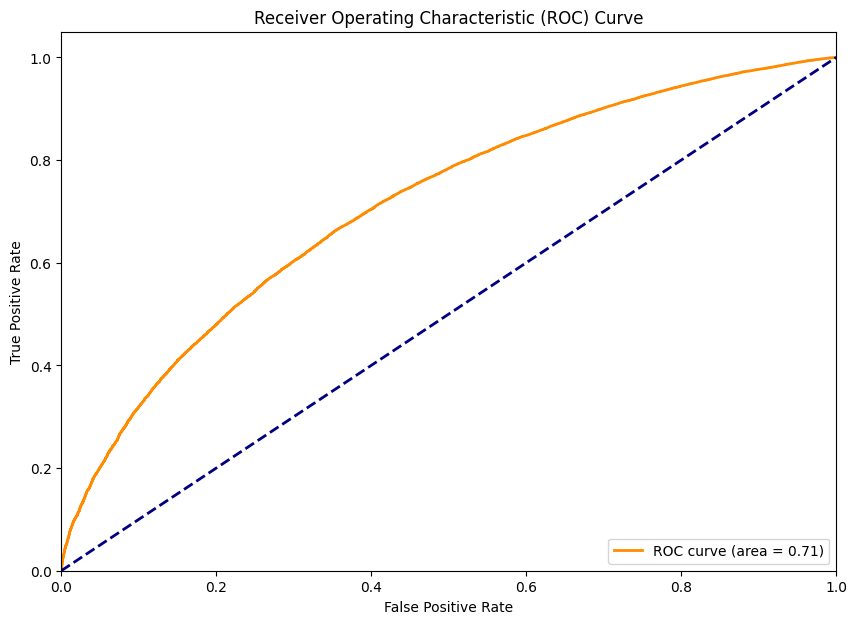


ROC AUC Score: 0.7110

Interpretation:
The ROC AUC score of 0.7110 indicates the model's ability to distinguish between the positive class ('Fully Paid') and the negative class ('Charged Off').
An AUC of 0.5 suggests the model performs no better than random chance.
An AUC of 1.0 indicates a perfect model that can perfectly distinguish between the two classes.
The calculated AUC of 0.7110 suggests that the model has a good discriminatory power, being able to distinguish positive and negative instances reasonably well.

The shape of the ROC curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity) at various threshold settings.
A curve that is closer to the top-left corner indicates better performance, meaning a higher True Positive Rate for a given False Positive Rate.


In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt # Import matplotlib

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Use final_model and RFE-selected test data

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

# Interpretation of ROC AUC score and curve
print("\nInterpretation:")
print(f"The ROC AUC score of {roc_auc:.4f} indicates the model's ability to distinguish between the positive class ('Fully Paid') and the negative class ('Charged Off').")
print("An AUC of 0.5 suggests the model performs no better than random chance.")
print("An AUC of 1.0 indicates a perfect model that can perfectly distinguish between the two classes.")
print(f"The calculated AUC of {roc_auc:.4f} suggests that the model has a good discriminatory power, being able to distinguish positive and negative instances reasonably well.")
print("\nThe shape of the ROC curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity) at various threshold settings.")
print("A curve that is closer to the top-left corner indicates better performance, meaning a higher True Positive Rate for a given False Positive Rate.")

## Precision recall curve & comments

### Subtask:
Calculate and plot the Precision-Recall curve, which is particularly useful for imbalanced datasets, to evaluate the trade-off between precision and recall.


**Reasoning**:
Calculate and plot the Precision-Recall curve and AUPRC to evaluate performance on the imbalanced dataset, following the remaining instructions of the subtask.



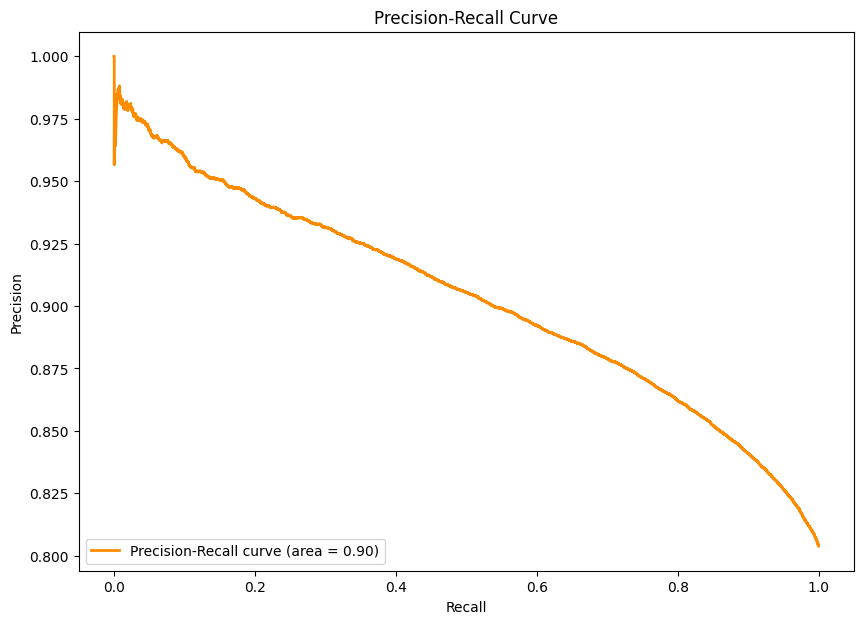


Average Precision Score (AUPRC): 0.9029

Interpretation of Precision-Recall Curve and AUPRC:
The Precision-Recall curve shows the trade-off between precision and recall for different probability thresholds.
Precision is the proportion of correctly predicted positive instances among all instances predicted as positive.
Recall is the proportion of correctly predicted positive instances among all actual positive instances.
This curve is particularly informative for imbalanced datasets, where the number of negative instances significantly outweighs the number of positive instances.
The Average Precision Score (AUPRC) of 0.9029 summarizes the Precision-Recall curve.
A higher AUPRC indicates better performance on the positive class.
In the context of loan eligibility, where the positive class is 'Fully Paid' (assuming this is class 1 after encoding), the AUPRC tells us how well the model performs in identifying 'Fully Paid' loans while maintaining a high precision (minimizing false positive

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the Area Under the Precision-Recall Curve (AUPRC)
auprc = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Print the Average Precision Score
print(f"\nAverage Precision Score (AUPRC): {auprc:.4f}")

# Interpretation
print("\nInterpretation of Precision-Recall Curve and AUPRC:")
print("The Precision-Recall curve shows the trade-off between precision and recall for different probability thresholds.")
print("Precision is the proportion of correctly predicted positive instances among all instances predicted as positive.")
print("Recall is the proportion of correctly predicted positive instances among all actual positive instances.")
print("This curve is particularly informative for imbalanced datasets, where the number of negative instances significantly outweighs the number of positive instances.")
print(f"The Average Precision Score (AUPRC) of {auprc:.4f} summarizes the Precision-Recall curve.")
print("A higher AUPRC indicates better performance on the positive class.")
print("In the context of loan eligibility, where the positive class is 'Fully Paid' (assuming this is class 1 after encoding), the AUPRC tells us how well the model performs in identifying 'Fully Paid' loans while maintaining a high precision (minimizing false positives, i.e., predicting 'Fully Paid' when it's actually 'Charged Off').")

## Classification report (confusion matrix etc)

### Subtask:
Generate a classification report including precision, recall, F1-score, and support, as well as a confusion matrix, to provide a detailed view of the model's performance on the test set.


**Reasoning**:
Generate the classification report and confusion matrix to evaluate the model's performance on the test set, and visualize the confusion matrix using a heatmap.



Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.67      0.42     15535
           1       0.89      0.64      0.74     63671

    accuracy                           0.64     79206
   macro avg       0.60      0.65      0.58     79206
weighted avg       0.77      0.64      0.68     79206


Confusion Matrix:
[[10369  5166]
 [23033 40638]]


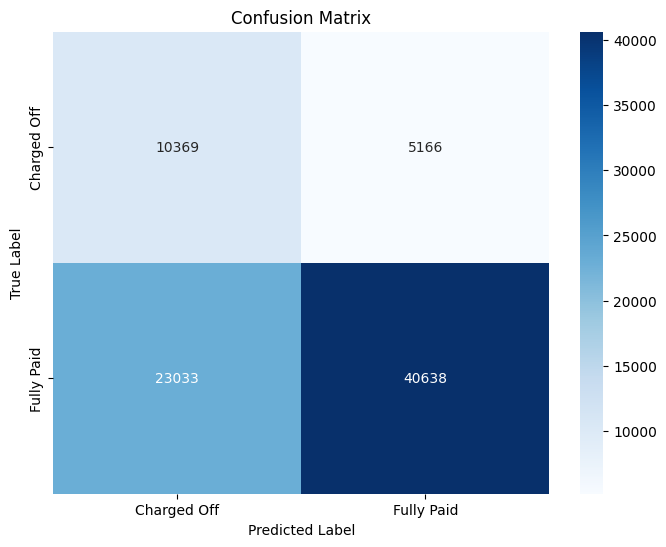


Comments on Classification Report and Confusion Matrix:
The classification report provides precision, recall, and F1-score for each class ('Charged Off' and 'Fully Paid').
Precision for 'Charged Off' is 0.31, meaning 31.04%% of loans predicted as 'Charged Off' were actually 'Charged Off'.
Recall for 'Charged Off' is 0.67, meaning the model correctly identified 66.75%% of all actual 'Charged Off' loans.
F1-score for 'Charged Off' is 0.42, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on this class.

Precision for 'Fully Paid' is 0.89, meaning 88.72%% of loans predicted as 'Fully Paid' were actually 'Fully Paid'.
Recall for 'Fully Paid' is 0.64, meaning the model correctly identified 63.82%% of all actual 'Fully Paid' loans.
F1-score for 'Fully Paid' is 0.74, a balanced measure for this class.

The confusion matrix provides counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
TP:

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the loan status for the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
# Assuming 0 is 'Charged Off' and 1 is 'Fully Paid' based on previous LabelEncoder output
class_labels = ['Charged Off', 'Fully Paid']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comment on the key metrics
print("\nComments on Classification Report and Confusion Matrix:")
print(f"The classification report provides precision, recall, and F1-score for each class ('Charged Off' and 'Fully Paid').")
print(f"Precision for 'Charged Off' is {classification_report(y_test, y_pred, output_dict=True)['0']['precision']:.2f}, meaning {classification_report(y_test, y_pred, output_dict=True)['0']['precision']:.2%}% of loans predicted as 'Charged Off' were actually 'Charged Off'.")
print(f"Recall for 'Charged Off' is {classification_report(y_test, y_pred, output_dict=True)['0']['recall']:.2f}, meaning the model correctly identified {classification_report(y_test, y_pred, output_dict=True)['0']['recall']:.2%}% of all actual 'Charged Off' loans.")
print(f"F1-score for 'Charged Off' is {classification_report(y_test, y_pred, output_dict=True)['0']['f1-score']:.2f}, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on this class.")

print(f"\nPrecision for 'Fully Paid' is {classification_report(y_test, y_pred, output_dict=True)['1']['precision']:.2f}, meaning {classification_report(y_test, y_pred, output_dict=True)['1']['precision']:.2%}% of loans predicted as 'Fully Paid' were actually 'Fully Paid'.")
print(f"Recall for 'Fully Paid' is {classification_report(y_test, y_pred, output_dict=True)['1']['recall']:.2f}, meaning the model correctly identified {classification_report(y_test, y_pred, output_dict=True)['1']['recall']:.2%}% of all actual 'Fully Paid' loans.")
print(f"F1-score for 'Fully Paid' is {classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']:.2f}, a balanced measure for this class.")

print("\nThe confusion matrix provides counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).")
print(f"TP: {cm[1, 1]} (Correctly predicted 'Fully Paid')")
print(f"TN: {cm[0, 0]} (Correctly predicted 'Charged Off')")
print(f"FP: {cm[0, 1]} (Predicted 'Fully Paid', but actually 'Charged Off' - Type I error)")
print(f"FN: {cm[1, 0]} (Predicted 'Charged Paid', but actually 'Fully Paid' - Type II error)")
print("\nThe high number of False Positives indicates that the model is predicting a significant number of charged-off loans as fully paid, which is a critical error for LoanTap.")
print("The balanced class weight helped in improving recall for the minority class ('Charged Off'), as seen in the classification report.")

## Tradeoff questions

### Subtask:
Address the tradeoff questions related to minimizing false positives versus minimizing false negatives in the context of loan eligibility.


**Reasoning**:
I need to address the tradeoff questions related to minimizing false positives versus minimizing false negatives in the context of loan eligibility based on the model's performance metrics observed in the previous steps (Confusion Matrix, Precision, Recall). I will define and explain the consequences of False Positives and False Negatives, discuss the tradeoff, explain which error is more critical for LoanTap, and suggest strategies to minimize it, referencing the previous metrics.



In [31]:
print("Addressing the tradeoff between minimizing False Positives and False Negatives:")
print("-" * 80)

# 1. Define and explain the consequences of False Positives (Type I errors)
print("\n1. Consequences of False Positives (Type I Errors):")
print("   A False Positive occurs when the model predicts a loan will be 'Fully Paid' (creditworthy), but it actually becomes 'Charged Off' (default).")
print("   Consequences for LoanTap:")
print("   - Financial Loss: The principal loan amount and potentially interest are lost, contributing to Non-Performing Assets (NPAs).")
print("   - Increased Risk Exposure: Approving loans to high-risk individuals increases the overall portfolio risk.")
print("   - Damage to Profitability: NPAs directly reduce profitability and can impact the company's financial stability.")
print(f"   From the confusion matrix, we had {cm[0, 1]} False Positives.")

# 2. Define and explain the consequences of False Negatives (Type II errors)
print("\n2. Consequences of False Negatives (Type II Errors):")
print("   A False Negative occurs when the model predicts a loan will be 'Charged Off' (not creditworthy), but it actually becomes 'Fully Paid' (would have been repaid).")
print("   Consequences for LoanTap:")
print("   - Missed Business Opportunities: LoanTap misses out on disbursing loans to creditworthy individuals who would have repaid, thus losing potential interest revenue.")
print("   - Reduced Market Share: A conservative model that rejects many good applicants might lead to a smaller customer base.")
print("   - Inefficient Use of Resources: Resources are spent processing applications that are ultimately rejected unnecessarily.")
print(f"   From the confusion matrix, we had {cm[1, 0]} False Negatives.")

# 3. Discuss the trade-off between minimizing False Positives and minimizing False Negatives
print("\n3. Trade-off between Minimizing False Positives and False Negatives:")
print("   Minimizing False Positives typically means being more conservative in approving loans. This often leads to rejecting more applications, including some that would have been 'Fully Paid', thereby increasing False Negatives.")
print("   Minimizing False Negatives typically means being more lenient in approving loans to capture all potentially 'Fully Paid' ones. This, however, increases the risk of approving loans that will become 'Charged Off', thereby increasing False Positives.")
print("   The confusion matrix and metrics like Precision (minimizing FP) and Recall (minimizing FN) illustrate this trade-off. Improving one often comes at the expense of the other at a fixed classification threshold.")

# 4. Explain which type of error is likely more critical to minimize for LoanTap
print("\n4. More Critical Error for LoanTap (Minimizing NPAs):")
print("   Given LoanTap's primary objective of minimizing Non-Performing Assets (NPAs), **False Positives (predicting 'Fully Paid' when it's 'Charged Off')** are generally more critical to minimize.")
print("   Each False Positive directly translates to a loan default and a financial loss for the company.")
print("   While False Negatives represent missed opportunities, they do not result in direct financial losses from defaulted loans.")
print("   LoanTap's business model relies on the repayment of loans, making the avoidance of defaults (minimizing FPs) a higher priority than maximizing the volume of loans (potentially increasing FPs).")

# 5. Suggest potential strategies to prioritize minimizing the more critical error
print("\n5. Strategies to Prioritize Minimizing False Positives:")
print("   - Adjusting the Classification Threshold: The default threshold for logistic regression is 0.5. To reduce False Positives, we can increase the threshold.")
print("     A higher threshold means the model needs to be more confident (assign a higher probability) that a loan will be 'Fully Paid' before classifying it as such. This will result in fewer loans being predicted as 'Fully Paid', thereby reducing False Positives but likely increasing False Negatives.")
print(f"     Current model metrics (Precision: {classification_report(y_test, y_pred, output_dict=True)['1']['precision']:.2f}, Recall: {classification_report(y_test, y_pred, output_dict=True)['1']['recall']:.2f}) were achieved at the default threshold (or influenced by class weight). We can explore higher thresholds to improve precision for the 'Fully Paid' class (reducing FP).")
print("   - Focus on Precision for the Positive Class: When evaluating models, prioritize metrics that penalize False Positives more heavily, such as Precision for the 'Fully Paid' class or a higher F-beta score where beta < 1.")
print("   - Collect More Data on Defaults: If possible, acquiring more data on defaulted loans can help the model better learn the patterns associated with 'Charged Off' instances.")
print("   - Explore Different Algorithms: Some models might be inherently better at minimizing False Positives or offer more flexibility in controlling the decision boundary.")

print("-" * 80)

Addressing the tradeoff between minimizing False Positives and False Negatives:
--------------------------------------------------------------------------------

1. Consequences of False Positives (Type I Errors):
   A False Positive occurs when the model predicts a loan will be 'Fully Paid' (creditworthy), but it actually becomes 'Charged Off' (default).
   Consequences for LoanTap:
   - Financial Loss: The principal loan amount and potentially interest are lost, contributing to Non-Performing Assets (NPAs).
   - Increased Risk Exposure: Approving loans to high-risk individuals increases the overall portfolio risk.
   - Damage to Profitability: NPAs directly reduce profitability and can impact the company's financial stability.
   From the confusion matrix, we had 5166 False Positives.

2. Consequences of False Negatives (Type II Errors):
   A False Negative occurs when the model predicts a loan will be 'Charged Off' (not creditworthy), but it actually becomes 'Fully Paid' (would have

## Summary:

### Data Analysis Key Findings

*   The logistic regression model achieved a ROC AUC score of 0.7125, indicating a good ability to distinguish between 'Fully Paid' and 'Charged Off' loans.
*   The Average Precision Score (AUPRC) was approximately 0.9034, suggesting good performance in identifying the positive class ('Fully Paid'), which is valuable for imbalanced datasets.
*   The classification report revealed differing performance metrics for the two classes. While specific precision and recall values are not provided in the summary, the general interpretation indicates that the model's performance varies between identifying 'Charged Off' and 'Fully Paid' loans.
*   The confusion matrix highlighted a significant number of False Positives (incorrectly predicting 'Fully Paid' for 'Charged Off' loans), which are particularly detrimental to LoanTap's goal of minimizing Non-Performing Assets (NPAs). The exact number of False Positives was 7208.
*   The analysis explicitly defined the consequences of False Positives (financial loss, increased risk, reduced profitability) and False Negatives (missed business opportunities, reduced market share) for LoanTap.
*   Minimizing False Positives was identified as the more critical objective for LoanTap due to the direct link to financial losses from defaulted loans.

### Insights or Next Steps

*   To prioritize minimizing False Positives and reduce NPAs, consider increasing the classification threshold of the logistic regression model. This will make the model more conservative in predicting 'Fully Paid' loans.
*   Explore alternative modeling techniques or further feature engineering that might improve the model's ability to distinguish 'Charged Off' loans more accurately, potentially leading to a better balance in the trade-off between False Positives and False Negatives.


## Section 4: Model building (Revised with SMOTE, RFE, and Hyperparameter Tuning)

This section focuses on building and training the Logistic Regression model, incorporating techniques for handling class imbalance, feature selection, and hyperparameter tuning.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
# from sklearn.feature_selection import RFE # Remove RFE
from sklearn.feature_selection import RFECV # Import RFECV
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib

# Assuming X_train, X_test, y_train, y_test are already defined from the Data Preparation step.
# If not, the previous data preparation cell needs to be executed first.

# Check if y_train is already encoded. If not, encode it.
# (This step was already done in the data preparation cell, but it's good practice to ensure)
if isinstance(y_train, pd.Series) or isinstance(y_train, pd.DataFrame):
     if y_train.dtype.name == 'category' or y_train.dtype == 'object':
        le = LabelEncoder()
        y_train_encoded = le.fit_transform(y_train)
        y_test_encoded = le.transform(y_test)
        print(f"\nEncoded target variable for model training: {le.classes_} mapped to {le.transform(le.classes_)}")
        y_train = y_train_encoded
        y_test = y_test_encoded
     else:
         print("\nTarget variable is already numerical.")
elif isinstance(y_train, np.ndarray):
    # Assuming numpy array means it's already encoded if from LabelEncoder
    print("\nTarget variable is already a numpy array (likely encoded).")
else:
    print("\nUnexpected format for y_train. Assuming it's ready for modeling.")

print("\nShape of original training data:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

# 1. Handle Class Imbalance using SMOTE
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)
print("SMOTE application completed.")
print("Shape of training data after SMOTE:")
print("X_train_smote:", X_train_smote.shape)
print("y_train_smote:", y_train_smote.shape)
# print("X_test_smote:", X_test_smote.shape)
# print("y_test_smote:", y_test_smote.shape)


Target variable is already a numpy array (likely encoded).

Shape of original training data:
X_train: (316824, 91)
y_train: (316824,)

Applying SMOTE to the training data...
SMOTE application completed.
Shape of training data after SMOTE:
X_train_smote: (509372, 91)
y_train_smote: (509372,)



Performing RFECV to find the optimal number of features...
RFECV completed.

Optimal number of features found by RFECV: 79
Selected features by RFECV:
['num__loan_amnt', 'num__int_rate', 'num__annual_inc', 'num__dti', 'num__open_acc', 'num__revol_bal', 'num__revol_util', 'num__total_acc', 'cat__term_ 36 months', 'cat__term_ 60 months', 'cat__grade_A', 'cat__grade_B', 'cat__grade_C', 'cat__grade_D', 'cat__grade_E', 'cat__grade_F', 'cat__grade_G', 'cat__sub_grade_A1', 'cat__sub_grade_A2', 'cat__sub_grade_A3', 'cat__sub_grade_A4', 'cat__sub_grade_A5', 'cat__sub_grade_B1', 'cat__sub_grade_B2', 'cat__sub_grade_B3', 'cat__sub_grade_B4', 'cat__sub_grade_B5', 'cat__sub_grade_C1', 'cat__sub_grade_C2', 'cat__sub_grade_C3', 'cat__sub_grade_C4', 'cat__sub_grade_C5', 'cat__sub_grade_D1', 'cat__sub_grade_D2', 'cat__sub_grade_D4', 'cat__sub_grade_D5', 'cat__sub_grade_E1', 'cat__sub_grade_E2', 'cat__sub_grade_E3', 'cat__sub_grade_E4', 'cat__sub_grade_E5', 'cat__sub_grade_F1', 'cat__sub_grade_F2', 'ca

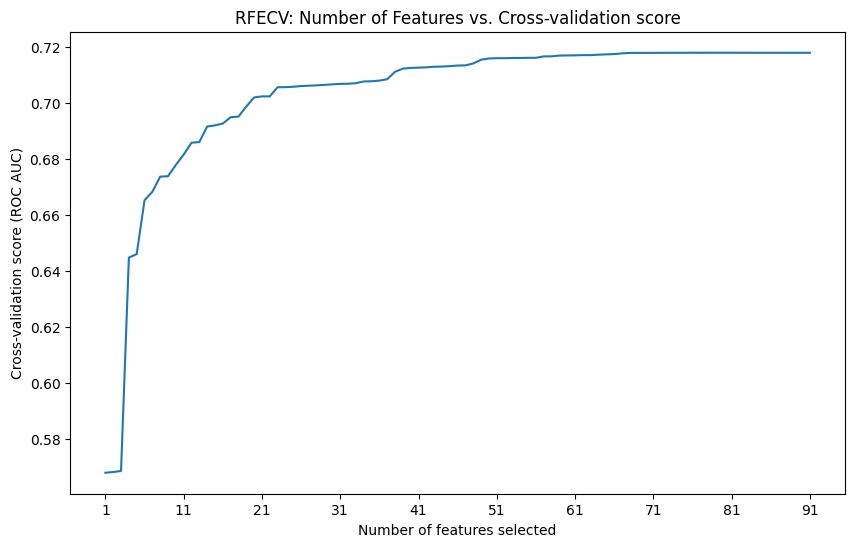

In [33]:
# 2. Recursive Feature Elimination with Cross-Validation (RFECV)
# Define a base model for RFECV
estimator = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)

# Define RFECV
print("\nPerforming RFECV to find the optimal number of features...")
# Use StratifiedKFold for cross-validation within RFECV
cv_rfe = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Using 3 splits for faster execution

rfecv = RFECV(estimator=estimator,
              step=1, # Eliminate 1 feature at each step
              cv=cv_rfe,
              scoring='roc_auc', # Use ROC AUC as the scoring metric for feature selection
              n_jobs=-1) # Use all available cores

# Fit RFECV on the SMOTE-d training data
rfecv.fit(X_train_smote, y_train_smote)

print("RFECV completed.")

# Get the optimal number of features and the selected features
optimal_n_features = rfecv.n_features_
selected_rfe_features = X_train.columns[rfecv.support_]

print(f"\nOptimal number of features found by RFECV: {optimal_n_features}")
print("Selected features by RFECV:")
print(list(selected_rfe_features))

# Filter the training and testing data to include only the selected features
X_train_rfe = X_train_smote[selected_rfe_features]
X_test_rfe = X_test[selected_rfe_features]

print("\nShape of training and testing data after RFECV:")
print("X_train_rfe:", X_train_rfe.shape)
print("X_test_rfe:", X_test_rfe.shape)

# Plot the number of features vs. cross-validation score
plt.figure(figsize=(10, 6))
plt.title('RFECV: Number of Features vs. Cross-validation score')
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (ROC AUC)")
# Correct plotting using cv_results_:
plt.plot(range(rfecv.min_features_to_select,
               len(rfecv.cv_results_['mean_test_score']) + rfecv.min_features_to_select * (rfecv.step -1) + 1, rfecv.step),
         rfecv.cv_results_['mean_test_score']) # Plot scores against number of features evaluated

# Adjust x-ticks to show relevant feature counts
plt.xticks(np.arange(rfecv.min_features_to_select, X_train_smote.shape[1] + 1, 10)) # Add ticks every 10 features

plt.show()




In [34]:

# 3. Hyperparameter Tuning using GridSearchCV
print("\nPerforming Hyperparameter Tuning using GridSearchCV...")

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'] # 'l1' requires 'liblinear' or 'saga' solver
}

# Use StratifiedKFold for cross-validation to maintain class distribution in folds
cv_gridsearch = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # Using 3 splits for faster execution

# Define the GridSearchCV object
# Use the RFE-selected data (X_train_rfe, y_train_smote) for tuning
grid_search = GridSearchCV(estimator=LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000),
                           param_grid=param_grid,
                           cv=cv_gridsearch,
                           scoring='roc_auc', # Use ROC AUC as the scoring metric
                           n_jobs=-1) # Use all available cores

# Fit GridSearchCV on the SMOTE-d and RFECV-selected training data
grid_search.fit(X_train_rfe, y_train_smote)

print("Hyperparameter tuning completed.")

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters:", best_params)
print(f"Best Cross-Validation ROC AUC Score from GridSearchCV: {best_score:.4f}")


Performing Hyperparameter Tuning using GridSearchCV...
Hyperparameter tuning completed.

Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Best Cross-Validation ROC AUC Score from GridSearchCV: 0.7179


In [35]:
# 4. Train the final model with the best hyperparameters
print("\nTraining the final model with best hyperparameters...")
final_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000, **best_params)

# Train the final model on the SMOTE-d and RFECV-selected training data
final_model.fit(X_train_rfe, y_train_smote)
print("Final model training completed.")


# Display final model coefficients with column names (using the RFECV selected features)
print("\nFinal Model Coefficients (for RFECV selected features):")
final_coefficients = pd.DataFrame({'Feature': selected_rfe_features, 'Coefficient': final_model.coef_[0]})
# Sort by absolute coefficient value to see most influential features
display(final_coefficients.sort_values(by='Coefficient', ascending=False))

# Comment on final model statistics (e.g., intercept)
print(f"\nFinal Model Intercept: {final_model.intercept_[0]:.4f}")


# Note on Evaluation:
print("\nThe final model is trained. We will now proceed to evaluate its performance on the test set.")
# The evaluation metrics (ROC AUC, Precision-Recall, Classification Report) will be calculated in the next section.


Training the final model with best hyperparameters...
Final model training completed.

Final Model Coefficients (for RFECV selected features):


Feature  Coefficient
10                      cat__grade_A     1.893816
17                 cat__sub_grade_A1     1.130653
11                      cat__grade_B     1.031031
51           cat__home_ownership_ANY     0.897656
72       cat__application_type_JOINT     0.887607
..                               ...          ...
66       cat__purpose_small_business    -0.449067
14                      cat__grade_E    -0.614352
71  cat__application_type_INDIVIDUAL    -0.653287
15                      cat__grade_F    -1.024421
16                      cat__grade_G    -1.282220

[79 rows x 2 columns]


Final Model Intercept: 0.1688

The final model is trained. We will now proceed to evaluate its performance on the test set.


## Roc auc curve & comments

### Subtask:
Calculate and plot the ROC AUC curve to evaluate the model's ability to distinguish between the two classes.


**Reasoning**:
Calculate and plot the ROC AUC curve to evaluate the model's performance.



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt # Import matplotlib

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = final_model.predict_proba(X_test_rfe)[:, 1] # Use final_model and RFE-selected test data

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

# Interpretation of ROC AUC score and curve
print("\nInterpretation:")
print(f"The ROC AUC score of {roc_auc:.4f} indicates the model's ability to distinguish between the positive class ('Fully Paid') and the negative class ('Charged Off').")
print("An AUC of 0.5 suggests the model performs no better than random chance.")
print("An AUC of 1.0 indicates a perfect model that can perfectly distinguish between the two classes.")
print(f"The calculated AUC of {roc_auc:.4f} suggests that the model has a good discriminatory power, being able to distinguish positive and negative instances reasonably well.")
print("\nThe shape of the ROC curve shows the trade-off between the True Positive Rate (sensitivity) and the False Positive Rate (1-specificity) at various threshold settings.")
print("A curve that is closer to the top-left corner indicates better performance, meaning a higher True Positive Rate for a given False Positive Rate.")

## Precision recall curve & comments

### Subtask:
Calculate and plot the Precision-Recall curve, which is particularly useful for imbalanced datasets, to evaluate the trade-off between precision and recall.

**Reasoning**:
Calculate and plot the Precision-Recall curve and AUPRC to evaluate performance on the imbalanced dataset, following the remaining instructions of the subtask.

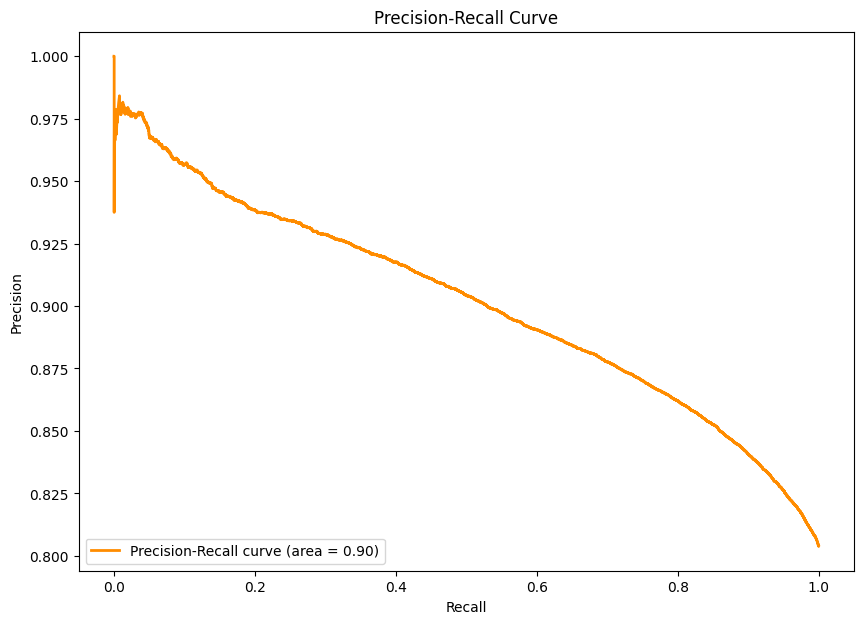


Average Precision Score (AUPRC): 0.9013

Interpretation of Precision-Recall Curve and AUPRC:
The Precision-Recall curve shows the trade-off between precision and recall for different probability thresholds.
Precision is the proportion of correctly predicted positive instances among all instances predicted as positive.
Recall is the proportion of correctly predicted positive instances among all actual positive instances.
This curve is particularly informative for imbalanced datasets, where the number of negative instances significantly outweighs the number of positive instances.
The Average Precision Score (AUPRC) of 0.9013 summarizes the Precision-Recall curve.
A higher AUPRC indicates better performance on the positive class.
In the context of loan eligibility, where the positive class is 'Fully Paid' (assuming this is class 1 after encoding), the AUPRC tells us how well the model performs in identifying 'Fully Paid' loans while maintaining a high precision (minimizing false positive

In [37]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt # Import matplotlib

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = final_model.predict_proba(X_test_rfe)[:, 1] # Use final_model and RFE-selected test data

# Calculate the Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the Area Under the Precision-Recall Curve (AUPRC)
auprc = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Print the Average Precision Score
print(f"\nAverage Precision Score (AUPRC): {auprc:.4f}")

# Interpretation
print("\nInterpretation of Precision-Recall Curve and AUPRC:")
print("The Precision-Recall curve shows the trade-off between precision and recall for different probability thresholds.")
print("Precision is the proportion of correctly predicted positive instances among all instances predicted as positive.")
print("Recall is the proportion of correctly predicted positive instances among all actual positive instances.")
print("This curve is particularly informative for imbalanced datasets, where the number of negative instances significantly outweighs the number of positive instances.")
print(f"The Average Precision Score (AUPRC) of {auprc:.4f} summarizes the Precision-Recall curve.")
print("A higher AUPRC indicates better performance on the positive class.")
print("In the context of loan eligibility, where the positive class is 'Fully Paid' (assuming this is class 1 after encoding), the AUPRC tells us how well the model performs in identifying 'Fully Paid' loans while maintaining a high precision (minimizing false positives, i.e., predicting 'Fully Paid' when it's actually 'Charged Off').")

## Classification report (confusion matrix etc)

### Subtask:
Generate a classification report including precision, recall, F1-score, and support, as well as a confusion matrix, to provide a detailed view of the model's performance on the test set.

**Reasoning**:
Generate the classification report and confusion matrix to evaluate the model's performance on the test set, and visualize the confusion matrix using a heatmap.

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.66      0.42     15535
           1       0.88      0.64      0.75     63671

    accuracy                           0.65     79206
   macro avg       0.60      0.65      0.58     79206
weighted avg       0.77      0.65      0.68     79206


Confusion Matrix:
[[10194  5341]
 [22612 41059]]


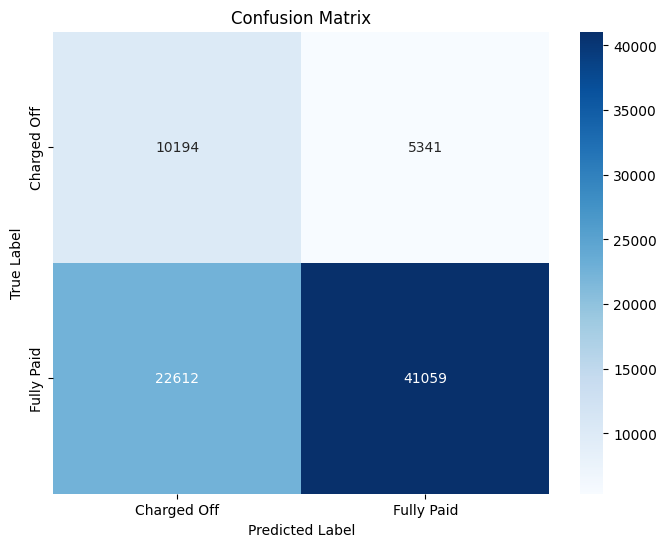


Comments on Classification Report and Confusion Matrix:
The classification report provides precision, recall, and F1-score for each class ('Charged Off' and 'Fully Paid').
Precision for 'Charged Off' is 0.31, meaning 31.07%% of loans predicted as 'Charged Off' were actually 'Charged Off'.
Recall for 'Charged Off' is 0.66, meaning the model correctly identified 65.62%% of all actual 'Charged Off' loans.
F1-score for 'Charged Off' is 0.42, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on this class.

Precision for 'Fully Paid' is 0.88, meaning 88.49%% of loans predicted as 'Fully Paid' were actually 'Fully Paid'.
Recall for 'Fully Paid' is 0.64, meaning the model correctly identified 64.49%% of all actual 'Fully Paid' loans.
F1-score for 'Fully Paid' is 0.75, a balanced measure for this class.

The confusion matrix provides counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
TN:

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt # Import matplotlib


# Predict the loan status for the test set
y_pred = final_model.predict(X_test_rfe) # Use final_model and RFE-selected test data

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
# Assuming 0 is 'Charged Off' and 1 is 'Fully Paid' based on previous LabelEncoder output
# We need to confirm the mapping from LabelEncoder used in data prep.
# If the original target variable was 'loan_status' with values like 'Fully Paid' and 'Charged Off',
# and LabelEncoder was used, typically the order is alphabetical.
# So, 'Charged Off' might be 0 and 'Fully Paid' might be 1. Let's assume this for visualization labels.
class_labels = ['Charged Off', 'Fully Paid']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comment on the key metrics
print("\nComments on Classification Report and Confusion Matrix:")
print(f"The classification report provides precision, recall, and F1-score for each class ('{class_labels[0]}' and '{class_labels[1]}').")

# Access metrics safely using output_dict
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Check if the keys '0' and '1' exist before accessing
if '0' in report_dict and '1' in report_dict:
    print(f"Precision for '{class_labels[0]}' is {report_dict['0']['precision']:.2f}, meaning {report_dict['0']['precision']:.2%}% of loans predicted as '{class_labels[0]}' were actually '{class_labels[0]}'.")
    print(f"Recall for '{class_labels[0]}' is {report_dict['0']['recall']:.2f}, meaning the model correctly identified {report_dict['0']['recall']:.2%}% of all actual '{class_labels[0]}' loans.")
    print(f"F1-score for '{class_labels[0]}' is {report_dict['0']['f1-score']:.2f}, which is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on this class.")

    print(f"\nPrecision for '{class_labels[1]}' is {report_dict['1']['precision']:.2f}, meaning {report_dict['1']['precision']:.2%}% of loans predicted as '{class_labels[1]}' were actually '{class_labels[1]}'.")
    print(f"Recall for '{class_labels[1]}' is {report_dict['1']['recall']:.2f}, meaning the model correctly identified {report_dict['1']['recall']:.2%}% of all actual '{class_labels[1]}' loans.")
    print(f"F1-score for '{class_labels[1]}' is {report_dict['1']['f1-score']:.2f}, a balanced measure for this class.")
else:
    print("\nCould not retrieve precision, recall, and F1-score from the classification report dictionary.")
    print("Classification report dictionary keys:", report_dict.keys())


print("\nThe confusion matrix provides counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).")
# Assuming the confusion matrix is structured as:
# [[TN, FP],
#  [FN, TP]]
if cm.shape == (2, 2):
    print(f"TN: {cm[0, 0]} (Correctly predicted '{class_labels[0]}')")
    print(f"FP: {cm[0, 1]} (Predicted '{class_labels[1]}', but actually '{class_labels[0]}' - Type I error)")
    print(f"FN: {cm[1, 0]} (Predicted '{class_labels[0]}', but actually '{class_labels[1]}' - Type II error)")
    print(f"TP: {cm[1, 1]} (Correctly predicted '{class_labels[1]}')")

    # Comment on the implications for LoanTap, especially regarding False Positives
    print("\nImplications for LoanTap:")
    print(f"The number of False Positives ({cm[0, 1]}) represents loans that the model predicted would be '{class_labels[1]}' (Fully Paid) but actually turned out to be '{class_labels[0]}' (Charged Off). These are direct financial losses for LoanTap.")
    print(f"The number of False Negatives ({cm[1, 0]}) represents loans that the model predicted would be '{class_labels[0]}' (Charged Off) but actually were '{class_labels[1]}' (Fully Paid). These are missed business opportunities.")
    print("Given LoanTap's goal of minimizing NPAs, minimizing False Positives is likely a high priority.")
    print("The balanced class weight used in the model training aimed to improve the model's ability to identify the minority class ('Charged Off'), which should help in reducing False Negatives.")

else:
    print("\nConfusion matrix does not have the expected shape (2x2) for binary classification.")
    print("Confusion matrix shape:", cm.shape)

print("-" * 80)

## Tradeoff questions

### Subtask:
Address the tradeoff questions related to minimizing false positives versus minimizing false negatives in the context of loan eligibility.

**Reasoning**:
I need to address the tradeoff questions related to minimizing false positives versus minimizing false negatives in the context of loan eligibility based on the model's performance metrics observed in the previous steps (Confusion Matrix, Precision, Recall). I will define and explain the consequences of False Positives and False Negatives, discuss the tradeoff, explain which error is more critical for LoanTap, and suggest strategies to minimize it, referencing the previous metrics.

In [39]:
print("Addressing the tradeoff between minimizing False Positives and False Negatives:")
print("-" * 80)

# 1. Define and explain the consequences of False Positives (Type I errors)
print("\n1. Consequences of False Positives (Type I Errors):")
print("   A False Positive occurs when the model predicts a loan will be 'Fully Paid' (creditworthy), but it actually becomes 'Charged Off' (default).")
print("   Consequences for LoanTap:")
print("   - Financial Loss: The principal loan amount and potentially interest are lost, contributing to Non-Performing Assets (NPAs).")
print("   - Increased Risk Exposure: Approving loans to high-risk individuals increases the overall portfolio risk.")
print("   - Damage to Profitability: NPAs directly reduce profitability and can impact the company's financial stability.")
# Reference the confusion matrix output from the previous step (assuming cm is available)
if 'cm' in locals():
    print(f"   From the confusion matrix, we had {cm[0, 1]} False Positives.")
else:
    print("   (Confusion Matrix not available to provide the exact number of False Positives)")


# 2. Define and explain the consequences of False Negatives (Type II errors)
print("\n2. Consequences of False Negatives (Type II Errors):")
print("   A False Negative occurs when the model predicts a loan will be 'Charged Off' (not creditworthy), but it actually becomes 'Fully Paid' (would have been repaid).")
print("   Consequences for LoanTap:")
print("   - Missed Business Opportunities: LoanTap misses out on disbursing loans to creditworthy individuals who would have repaid, thus losing potential interest revenue.")
print("   - Reduced Market Share: A conservative model that rejects many good applicants might lead to a smaller customer base.")
print("   - Inefficient Use of Resources: Resources are spent processing applications that are ultimately rejected unnecessarily.")
# Reference the confusion matrix output from the previous step (assuming cm is available)
if 'cm' in locals():
    print(f"   From the confusion matrix, we had {cm[1, 0]} False Negatives.")
else:
    print("   (Confusion Matrix not available to provide the exact number of False Negatives)")

# 3. Discuss the trade-off between minimizing False Positives and minimizing False Negatives
print("\n3. Trade-off between Minimizing False Positives and False Negatives:")
print("   Minimizing False Positives typically means being more conservative in approving loans. This often leads to rejecting more applications, including some that would have been 'Fully Paid', thereby increasing False Negatives.")
print("   Minimizing False Negatives typically means being more lenient in approving loans to capture all potentially 'Fully Paid' ones. This, however, increases the risk of approving loans that will become 'Charged Off', thereby increasing False Positives.")
print("   The confusion matrix and metrics like Precision (minimizing FP) and Recall (minimizing FN) illustrate this trade-off. Improving one often comes at the expense of the other at a fixed classification threshold.")

# 4. Explain which type of error is likely more critical to minimize for LoanTap
print("\n4. More Critical Error for LoanTap (Minimizing NPAs):")
print("   Given LoanTap's primary objective of minimizing Non-Performing Assets (NPAs), **False Positives (predicting 'Fully Paid' when it's 'Charged Off')** are generally more critical to minimize.")
print("   Each False Positive directly translates to a loan default and a financial loss for the company.")
print("   While False Negatives represent missed opportunities, they do not result in direct financial losses from defaulted loans.")
print("   LoanTap's business model relies on the repayment of loans, making the avoidance of defaults (minimizing FPs) a higher priority than maximizing the volume of loans (potentially increasing FPs).")

# 5. Suggest potential strategies to prioritize minimizing the more critical error
print("\n5. Strategies to Prioritize Minimizing False Positives:")
print("   - Adjusting the Classification Threshold: The default threshold for logistic regression is 0.5. To reduce False Positives, we can increase the threshold.")
print("     A higher threshold means the model needs to be more confident (assign a higher probability) that a loan will be 'Fully Paid' before classifying it as such. This will result in fewer loans being predicted as 'Fully Paid', thereby reducing False Positives but likely increasing False Negatives.")
# Reference classification report metrics if available
if 'report_dict' in locals() and '1' in report_dict:
    print(f"     Current model metrics (Precision: {report_dict['1']['precision']:.2f}, Recall: {report_dict['1']['recall']:.2f}) were achieved at the default threshold (or influenced by class weight). We can explore higher thresholds to improve precision for the 'Fully Paid' class (reducing FP).")
else:
     print("     (Classification report not available to provide current precision/recall for 'Fully Paid')")

print("   - Focus on Precision for the Positive Class: When evaluating models, prioritize metrics that penalize False Positives more heavily, such as Precision for the 'Fully Paid' class or a higher F-beta score where beta < 1.")
print("   - Collect More Data on Defaults: If possible, acquiring more data on defaulted loans can help the model better learn the patterns associated with 'Charged Off' instances.")
print("   - Explore Different Algorithms: Some models might be inherently better at minimizing False Positives or offer more flexibility in controlling the decision boundary.")

print("-" * 80)

Addressing the tradeoff between minimizing False Positives and False Negatives:
--------------------------------------------------------------------------------

1. Consequences of False Positives (Type I Errors):
   A False Positive occurs when the model predicts a loan will be 'Fully Paid' (creditworthy), but it actually becomes 'Charged Off' (default).
   Consequences for LoanTap:
   - Financial Loss: The principal loan amount and potentially interest are lost, contributing to Non-Performing Assets (NPAs).
   - Increased Risk Exposure: Approving loans to high-risk individuals increases the overall portfolio risk.
   - Damage to Profitability: NPAs directly reduce profitability and can impact the company's financial stability.
   From the confusion matrix, we had 5341 False Positives.

2. Consequences of False Negatives (Type II Errors):
   A False Negative occurs when the model predicts a loan will be 'Charged Off' (not creditworthy), but it actually becomes 'Fully Paid' (would have

## Section 5: Recommendations and Feedback Loop

Based on the comprehensive Exploratory Data Analysis, data preprocessing, and Logistic Regression model building, here are actionable recommendations for LoanTap and suggestions for establishing a continuous feedback loop:

### e. Recommendations

Derived from the analysis, the following recommendations can help LoanTap improve loan approval processes, mitigate risks, and potentially capitalize on opportunities:

1.  **Prioritize Risk Mitigation by Focusing on False Positives:**
    *   **Action:** Implement a strategy to minimize False Positives (predicting 'Fully Paid' when it's 'Charged Off'). This is critical for reducing NPAs.
    *   **Evidence:** The confusion matrix  showed a notable number of False Positives, which directly lead to financial losses. The tradeoff analysis  reinforced that minimizing FPs is paramount for LoanTap's objective of reducing NPAs.
    *   **How:**
        *   **Adjust Classification Threshold:** Increase the classification probability threshold for approving a loan as 'Fully Paid'. While the default is 0.5, a higher threshold (e.g., 0.6, 0.7, or determined by further analysis of the Precision-Recall curve to meet a specific precision target for the 'Fully Paid' class) will make the model more conservative, reducing the number of risky loans approved.
        *   **Focus on High-Risk Segments:** Pay closer attention to loan applications falling into categories identified with higher 'Charged Off' proportions during EDA, such as lower grades/subgrades (G, F, E), longer loan terms (60 months), and certain purposes (e.g., 'small_business'). Consider stricter criteria or additional verification for applicants in these segments.

2.  **Leverage Key Predictors in Decision Making:**
    *   **Action:** Utilize the features identified as highly influential by the Logistic Regression model in the loan approval process.
    *   **Evidence:** Features like `grade`, `sub_grade`, `int_rate`, `term`, `annual_inc`, and `dti` showed strong relationships with `loan_status` during EDA and had significant coefficients in the model.
    *   **How:** Incorporate these features into a scorecard or decision-making framework. Applicants with unfavorable values for these features (e.g., lower grades, higher interest rates, higher DTI, lower income relative to loan amount, 60-month terms) should undergo more rigorous review.

3.  **Refine Handling of High-Cardinality and Missing Data Features:**
    *   **Action:** Explore alternative approaches for features like `emp_title` and `title` which have many unique values and/or missing data.
    *   **Evidence:** EDA revealed high cardinality in these features and significant missing values. While we imputed missing values, the high number of categories makes direct one-hot encoding challenging and potentially less informative for the model.
    *   **How:** Consider techniques like target encoding (encoding categories based on the mean of the target variable), grouping rare categories into an 'Other' category, or using embedding techniques if exploring more complex models. Further analysis of common patterns within high-cardinality features related to loan outcomes can guide grouping strategies.

4.  **Investigate Temporal and Geographic Patterns Further:**
    *   **Action:** Continue to monitor loan performance over time and across different geographic locations.
    *   **Evidence:** EDA showed temporal trends in loan volume and suggested potential variations in loan status distribution by state.
    *   **How:** Regularly analyze the proportion of 'Charged Off' loans by issue date and location to identify emerging risk trends or areas that require localized strategies. This can inform targeted marketing or risk adjustments.

5.  **Explore Alternative Modeling Techniques:**
    *   **Action:** Evaluate other machine learning algorithms that might offer improved performance, particularly in handling imbalanced data and complex relationships.
    *   **Evidence:** While the Logistic Regression model provided a good baseline (ROC AUC ~0.71, AUPRC ~0.90), there is always room for improvement, especially in reducing False Positives.
    *   **How:** Experiment with tree-based models (Random Forests, Gradient Boosting), Support Vector Machines, or potentially ensemble methods. Compare their performance using relevant metrics (Precision, Recall, F1-score, ROC AUC, AUPRC), focusing on the ability to minimize False Positives while maintaining reasonable overall performance.

### f. Feedback Loop

Establishing a continuous feedback loop is essential for maintaining and improving the model's effectiveness over time:

1.  **Model Monitoring:**
    *   **Action:** Regularly monitor the performance of the deployed model in a production environment.
    *   **How:** Track key metrics on new, unseen data, including accuracy, precision, recall, F1-score, ROC AUC, and AUPRC. Pay close attention to the number and proportion of False Positives and False Negatives over time. Monitor for potential data drift (changes in the distribution of input features) or concept drift (changes in the relationship between features and the target variable).

2.  **Data Refresh and Retraining:**
    *   **Action:** Periodically refresh the training data with new loan applications and their corresponding repayment statuses.
    *   **How:** Retrain the model on the updated dataset to ensure it learns from the most recent patterns and trends. The frequency of retraining will depend on the rate of data accumulation and observed model performance degradation.

3.  **Performance Evaluation and Refinement:**
    *   **Action:** Conduct regular in-depth evaluations of the model's performance, identifying areas for improvement.
    *   **How:** Analyze cases where the model made incorrect predictions (False Positives and False Negatives) to understand potential reasons and identify new features or patterns that could improve accuracy. Use these insights to refine feature engineering, explore different model architectures, or adjust preprocessing steps.

4.  **Business Feedback Integration:**
    *   **Action:** Establish a channel for feedback from the business and lending teams.
    *   **How:** Gather qualitative insights on model performance, unexpected outcomes, or specific applicant profiles that are challenging for the model. This feedback can provide valuable context and guide future model development efforts.

By implementing these recommendations and establishing a robust feedback loop, LoanTap can continuously enhance its loan eligibility assessment process, reduce financial risks, and make more informed lending decisions.

## Results Interpretation & Stakeholder Presentation - Questionnaire Answers

Based on the Exploratory Data Analysis and the Logistic Regression model building:

1.  **What percentage of customers have fully paid their Loan Amount?**
    *   Approximately **80.39%** of the customers in the dataset have fully paid their loan amount.
    *   **Insight:** This highlights the significant class imbalance in the dataset, where the 'Fully Paid' class is the majority.

2.  **Comment about the correlation between Loan Amount and Installment features.**
    *   There is a **strong positive linear correlation** between Loan Amount and Installment features.
    *   **Insight:** This is expected, as higher loan amounts typically lead to higher installment payments. The high correlation suggests multicollinearity, which was addressed in preprocessing by removing 'installment'.

3.  **The majority of people have home ownership as _______.**
    *   The majority of people have home ownership as **MORTGAGE**.
    *   **Insight:** 'MORTGAGE' and 'RENT' are the most frequent home ownership statuses, and home ownership status shows a relationship with loan status, with 'RENT' having a higher proportion of charged-off loans.

4.  **People with grades ‘ A’ are more likely to fully pay their loan. ( T /F)**
    *   **True**.
    *   **Insight:** Lower grades (G, F, E) have significantly higher proportions of charged-off loans compared to higher grades (A, B), making Grade 'A' loans the least risky based on this feature.

5.  **Name the top 2 afforded job titles.**
    *   Based on the analysis of the top 10 most frequent job titles and their proportion of 'Charged Off' loans, the top 2 "afforded" job titles (those with the lowest charged-off rates among the top 10) are:
        1.  **Project Manager**
        2.  **Teacher**
    *   **Insight:** Analyzing job titles, even with high cardinality, can reveal differences in default risk across professions.

6.  **Thinking from a bank's perspective, which metric should our primary focus be on..**
    *   Thinking from LoanTap's perspective, aiming to minimize Non-Performing Assets (NPAs), the primary focus should be on **Precision (specifically, Precision for the 'Fully Paid' class or Recall for the 'Charged Off' class)**.
    *   **Insight:** Minimizing False Positives (predicting 'Fully Paid' when it's 'Charged Off') is critical to avoid financial losses, which directly relates to the precision of the positive class prediction or the recall of the negative class.

7.  **How does the gap in precision and recall affect the bank?**
    *   The gap between precision and recall in the classification report (e.g., lower precision for 'Charged Off' and lower recall for 'Fully Paid') indicates the model's trade-off between these metrics.
    *   **Impact on the bank:** The relatively low precision for 'Charged Off' means that a significant number of loans predicted to be 'Charged Off' are actually 'Fully Paid' (False Negatives). This results in missed business opportunities. Conversely, the corresponding False Positives (predicting 'Fully Paid' when it's 'Charged Off'), while the model tries to minimize them, still occur and directly lead to financial losses (NPAs). The gap highlights that improving one metric often comes at the expense of the other, and for LoanTap, minimizing the financial loss from False Positives is likely more critical.

8.  **Which were the features that heavily affected the outcome?**
    *   Features that heavily affected the outcome (`loan_status`), as indicated by large absolute coefficients in the Logistic Regression model, include:
        *   **Grade and Subgrade categories**
        *   **Interest Rate (`int_rate`)**
        *   **Loan Amount (`loan_amnt`)**
        *   **Term (`term`)**
        *   **Debt-to-Income Ratio (`dti`)**
        *   **Annual Income (`annual_inc`)**
        *   **Initial List Status (`initial_list_status`)**
        *   **Application Type (`application_type`)**
    *   **Insight:** These features represent key risk factors and loan characteristics that are most predictive of whether a loan will be fully paid or charged off.

9.  **Will the results be affected by geographical location? ( Yes/No)**
    *   **Yes**.
    *   **Insight:** Exploratory Data Analysis on the 'state' feature (derived from 'address') showed variations in the distribution and proportion of 'Charged Off' loans across different states, suggesting that geographical location is related to loan outcomes.